##**Gestion quantitative des risques en Python**

+ *4 heures*
+ *15 vidéos*
+ *54 Exercices*
+ *8 830 participants*
+ *4 500 XP*

####**Description du cours**

+ *La gestion des risques à l'aide de la gestion quantitative des risques est une tâche essentielle dans les secteurs de la banque, de l'assurance et de la gestion d'actifs. Il est essentiel que les analystes des risques financiers, les régulateurs et les actuaires puissent équilibrer quantitativement les récompenses par rapport à leur exposition au risque. Ce cours vous présente la gestion des risques du portefeuille financier à travers un examen de la crise financière de 2007-2008 et de ses effets sur les banques d'investissement telles que Goldman Sachs et J.P. Morgan. Vous apprendrez à utiliser Python pour calculer et atténuer l'exposition au risque à l'aide des mesures de la valeur à risque et de la valeur à risque conditionnelle, à estimer le risque avec des techniques telles que la simulation de Monte Carlo et à utiliser des technologies de pointe telles que les réseaux de neurones pour mener un portefeuille en temps réel. rééquilibrage.*

####**1) Récapitulatif des risques et rendements**

+ ***La gestion des risques commence par une compréhension du risque et du rendement. Nous récapitulerons comment le risque et le rendement sont liés, identifierons les facteurs de risque et les utiliserons pour nous familiariser à nouveau avec la théorie moderne du portefeuille appliquée à la crise financière mondiale de 2007-2008.***

|OBJECTIFS|
|---------|
Bienvenue!
Rendements du portefeuille pendant la crise
Covariance des actifs et volatilité du portefeuille
Facteurs de risque et crise financière
Amorce de rééchantillonnage de fréquence
Visualisation de la corrélation des facteurs de risque
Modèle factoriel des moindres carrés
Théorie moderne du portefeuille
Pratique avec PyPortfolioOpt : retours
S'entraîner avec PyPortfolioOpt : covariance
Briser la crise financière
La frontière efficiente et la crise financière

####**2) Gestion des risques axée sur les objectifs**

+ ***Il est maintenant temps d'étoffer votre boîte à outils d'optimisation de portefeuille avec des mesures de risque telles que la valeur à risque (VaR) et la valeur à risque conditionnelle (CVaR). Pour ce faire, vous utiliserez des bibliothèques Python spécialisées, notamment pandas, scipy et pypfopt. Vous apprendrez également à atténuer l'exposition au risque en utilisant le modèle Black-Scholes pour couvrir un portefeuille d'options.***


|OBJECTIFS|
|---------|
Mesurer le risque
VaR pour la distribution normale
Comparer CVaR et VaR
Quelle mesure de risque est la "meilleure" ?
Exposition au risque et perte
Quel est votre appétit pour le risque ?
VaR et exposition au risque
CVaR et exposition au risque
Gestion des risques par VaR & CVaR
VaR d'une distribution ajustée
Minimiser la CVaR
La gestion du risque CVaR et la crise
Couverture de portefeuille : compenser le risque
Tarification des options Black-Scholes
Tarification des options et actif sous-jacent
Utilisation des options de couverture

####**3) Estimation et identification des risques**

+ ***Dans ce chapitre, vous allez estimer les mesures de risque à l'aide d'une estimation paramétrique et de données historiques du monde réel. Vous découvrirez ensuite comment la simulation de Monte Carlo peut vous aider à prédire l'incertitude. Enfin, vous apprendrez comment la crise financière mondiale a signalé que le hasard lui-même était en train de changer, en comprenant les ruptures structurelles et comment les identifier.***

|OBJECTIFS|
|---------|
Estimation paramétrique
Estimation des paramètres : normale
Estimation des paramètres : normale asymétrique
Simulation historique et Monte Carlo
Simulation historique
Simulation de Monte-Carlo
Ruptures structurelles
Rupture structurelle de crise : I
Rupture structurelle de crise : II
Rupture structurelle de crise : III
Volatilité et valeurs extrêmes
Volatilité et ruptures structurelles
Valeurs extrêmes et backtesting

####**4) Gestion avancée des risques**

+ ***Il est temps d'explorer des outils plus généraux de gestion des risques. Ces techniques avancées sont essentielles pour tenter de comprendre les événements extrêmes, tels que les pertes subies pendant la crise financière, et les distributions de pertes complexes qui peuvent défier les techniques d'estimation traditionnelles. Vous découvrirez également comment les réseaux de neurones peuvent être mis en œuvre pour approximer les distributions de pertes et effectuer une optimisation de portefeuille en temps réel.***

|OBJECTIFS|
|---------|
Théorie des valeurs extrêmes
Maximums de bloc
Événements extrêmes pendant la crise
Estimation du risque GEV
Estimation de la densité du noyau
KDE d'une distribution de perte
Quelle diffusion ?
Sélection de la CVaR et de la couverture des pertes
Gestion des risques des réseaux de neurones
Réseaux de neurones à couche unique
Prévision du prix des actifs
Gestion des risques en temps réel
Récapitulation et prochaines étapes

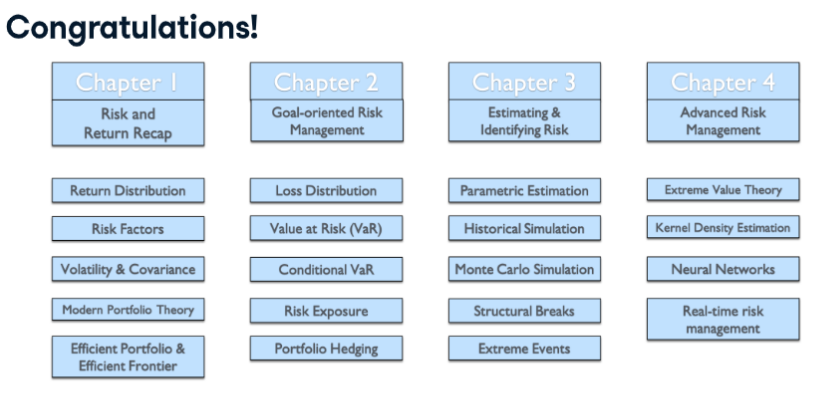

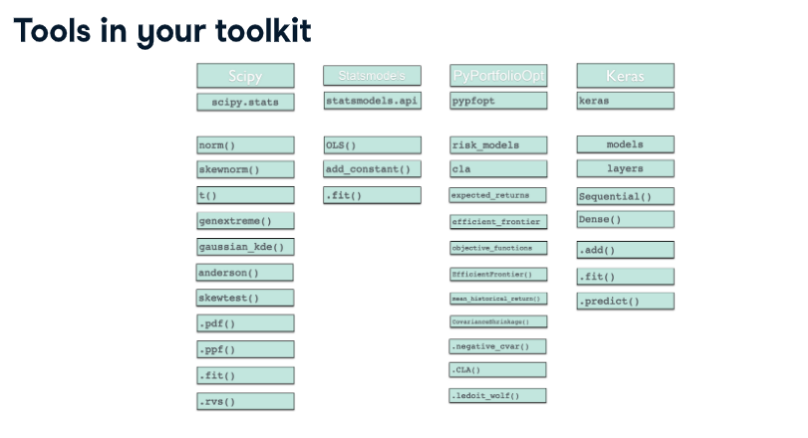

+ https://www.kaggle.com/code/ahmedemadeldin/python-for-trading-portfolio-optimization/notebook

+ https://blog.quantinsti.com/historical-market-data-python-api/

+ https://rstudio-pubs-static.s3.amazonaws.com/699978_1ea351cdd4ca493b84e9474a8d8dc545.html

In [ ]:
!pip install --upgrade pandas-datareader
!pip install yfinance
!pip install PyPortfolioOpt

In [3]:
import yfinance as yf
# from yahoofinancials import YahooFinancials
from pandas_datareader import data as pdr
#import mplfinance as mpf
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn  as sns
from plotly import express as px
import datetime as dt
import os
# -----------------------------------------
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000
#-------------------------------------------

In [4]:
tickers = ['C', 'MS', 'GS', 'JPM'] 
startdate = '2005-01-01'
enddate = '2010-12-30'

In [5]:
ohlc = yf.download(tickers, startdate, enddate)
portfolio = ohlc["Adj Close"]
portfolio.tail()    

[*********************100%***********************]  4 of 4 completed


,C,GS,JPM,MS
Date,,,,
2010-12-22,38.76,138.35,30.14,21.44
2010-12-23,38.35,136.72,30.08,21.44
2010-12-27,39.09,138.54,30.50,21.52
2010-12-28,39.17,138.02,30.46,21.64
2010-12-29,39.09,136.74,30.28,21.34


In [6]:
portfolio = portfolio.rename(columns={
                          'C': 'Citibank', 
                        'GS':  'Goldman Sachs', 
                        'JPM': 'J.P. Morgan',
                        'MS': 'Morgan Stanley'})

In [7]:
portfolio.head()

,Citibank,Goldman Sachs,J.P. Morgan,Morgan Stanley
Date,,,,
2005-01-03,330.53,81.08,23.91,32.52
2005-01-04,327.73,80.55,23.66,32.17
2005-01-05,331.83,80.19,23.71,31.99
2005-01-06,335.05,81.29,23.85,32.74
2005-01-07,333.14,80.95,23.66,32.61


####**1. Bienvenue!**

+ Salutations et bienvenue à Gestion quantitative des risques en Python. 

+ Je m’appelle Jamsheed Shorish et je serai votre hôte pendant que nous apprendrons à comprendre et à gérer le risque : **l’impact de l’incertitude sur le rendement des placements**.

####**2. À propos de moi**

+ Je suis un économiste computationnel, spécialisé dans l’évaluation des actifs, les technologies financières de pointe (ou « fintech ») et les applications des techniques informatiques à l’économie et à la finance. 

+ Je suis professeur agrégé honoraire à l’Université nationale australienne et co-instructeur de l’analyse économique de l’économie numérique. 

+ Je suis également PDG et fondateur de Shorish Research, qui se concentre sur les applications commerciales informatiques.

####**3. Qu’est-ce que la gestion quantitative des risques?**

+ **La gestion quantitative des risques est l’étude de l’incertitude quantifiable**. 

+ **L’incertitude existe parce que les résultats futurs sont inconnus, et ces résultats peuvent avoir une incidence sur les décisions que nous prenons aujourd’hui**. 

+ **La gestion des risques est la science de l’atténuation de l’impact des résultats indésirables**. 

+ Nous quantifions l’incertitude en mesurant le risque. 

+ **La mesure du risque permet d’identifier les facteurs qui peuvent créer des résultats négatifs à l’avenir**. 

+ C’est comme identifier les principales causes d’incendie lors de la création d’une assurance incendie: 
  + nous utilisons des éléments tels que les causes historiques d’incendie, 
  
  + ainsi que les caractéristiques des maisons sujettes aux incendies, afin d’obtenir la meilleure assurance possible. 
  
+ Dans ce cours, nous quantifierons les facteurs qui affectent le risque des portefeuilles financiers.

####**4. La gestion des risques et la crise financière mondiale**

+ Nous nous concentrerons sur une période tumultueuse de l’histoire de l’humanité: **la « Grande Récession » de 2007-2010, lorsque des milliards de dollars de croissance et de richesse ont été perdus en 3 ans**. 

+ Une grande partie de cette catastrophe a été la crise financière mondiale de 2007-2009. 

+ Il s’agissait d’une période de changements à grande échelle dans la valeur fondamentale des actifs, entraînant une incertitude et une forte volatilité des rendements des actifs. 

+ La gestion des risques était cruciale pour sauver (ou, dans certains cas, ne pas sauver) les banques et les entreprises privées.

####**5. Récapitulatif rapide : portefeuilles financiers**

+ Avant d’explorer plus en détail la crise financière mondiale, récapitulons d’abord notre compréhension des risques et des rendements des portefeuilles financiers. 

+ **Un portefeuille financier est un ensemble d’actifs dont les rendements futurs sont incertains**. 

+ Les exemples incluent les actions, les obligations et les avoirs en devises, ou « forex ». 

+ D’autres actifs plus complexes comprennent les options d’achat d’actions, dont nous parlerons plus loin au chapitre 2. 

+ Comme nous l’avons mentionné, le défi de la gestion des risques consiste à quantifier les risques. 

+ Pour les portefeuilles financiers, nous quantifions le risque afin de pouvoir élaborer des stratégies de placement optimales qui maximisent le rendement d’un portefeuille, sous réserve d’un niveau de risque que nous pouvons tolérer (connu sous le nom d'« appétit pour le risque »).

####**6. Quantifier le rendement**

+ ***Rappelons que le rendement d’un portefeuille est la somme pondérée des rendements des actifs d’un portefeuille***. 

+ Nous pouvons facilement trouver ce rendement en plaçant nos données de prix d’actifs dans un DataFrame Pandas, telles que 'prices', puis en utilisant la méthode **'pct_change()'** du DataFrame pour calculer le rendement. 

+ Le rendement du portefeuille est le produit ponctuel des pondérations et des rendements du portefeuille.

####**7. Quantifier le risque**

+ Nous quantifions le risque en fonction de la volatilité du rendement d’un portefeuille. 

+ Une fois que nous avons la liste des rendements des actifs d’un portefeuille, nous pouvons calculer la volatilité. 

+ Cela se fait généralement en trouvant d’abord la matrice de covariance de tous les actifs et en annualisant en multipliant par le nombre de jours de bourse (ici 252).

####**8. Quantifier le risque**

+ Rappelons que la diagonale de la matrice de covariance est la variance de l’actif individuel,

####**9. Quantifier le risque**
+ tandis que les éléments hors diagonale sont les covariances entre les actifs.

####**10. Risque du portefeuille**

+ Pour trouver le risque du portefeuille, ses pondérations doivent être identifiées. La variance du portefeuille est une fonction quadratique des pondérations étant donné la matrice de covariance, qui peut être calculée en Python à l’aide de l’opérateur « At ». 

+ La variance est ensuite généralement transformée en écart-type, ce qui entraîne la volatilité du portefeuille. 

+ La variance et l’écart-type sont utilisés comme mesures de la volatilité.

####**11. Séries chronologiques sur la volatilité**

+ Il peut être utile d’observer comment la volatilité du portefeuille évolue au fil du temps. 

+ Nous pouvons créer une « fenêtre » d’une période de temps fixe, telle qu’une semaine ou un mois, en utilisant la méthode de série « rolling() ». 

+ Prendre l’écart-type et annualiser les résultats dans une série chronologique de volatilité qui peut être analysée et tracée, pour identifier les tendances ou les événements extrêmes possibles. 

+ Cette question sera examinée plus en détail au chapitre 4.

####**12. Entraînons-nous!**

+ Dans les exercices pratiques, vous vous familiariserez à nouveau avec ces définitions du risque et du rendement, avant que nous les utilisions dans les chapitres suivants pour vous engager activement dans la gestion des risques. Allons-y!

####**Qu'est-ce que la gestion quantitative du risque ?**

+ **Gestion quantitative du risque : Etude de l'incertitude quantifiable**

+ **Incertitude** :
  + Les résultats futurs sont inconnus
  + Les résultats ont un impact sur les décisions de planification

+ **Gestion du risque** : atténuer (réduire les effets) des résultats négatifs.

+ **Incertitude quantifiable** : identifier les facteurs de mesure du risque.

  + Exemple : Assurance incendie.

+ Quels sont les facteurs qui rendent le risque plus probable ? Ce cours se concentre sur le risque associé au portefeuille financier.


####**La gestion des risques et la crise financière mondiale GreatRecession(2007-2010)**
+ Perte de croissance mondiale : plus de 2 billions de dollars
+ États-Unis : près de 10 000 milliards de dollars de perte de richesse pour les ménages
Les bourses américaines ont perdu près de 8000 milliards de dollars en valeur.

####**Crise financière mondiale (2007-2009)**
+ Changements à grande échelle de la valeur des actifs fondamentaux
+ Incertitude massive quant aux rendements futurs
+ Volatilité élevée des rendements des actifs
+ La gestion du risque est essentielle pour éviter l'échec de l'entreprise

####**Récapitulatif rapide : les portefeuilles financiers**
+ Portefeuille financier: 
  + Collection d'actifs dont les rendements futurs sont incertains
  + Actions
  + Obligations
  + Titres en devises ("forex")
  + Options sur actions

+ **Défi** : quantifier le risque et gérer l'incertitude
+ Prendre des décisions d'investissement optimales
Maximiser le rendement du portefeuille, en fonction de l'appétit pour le risque

####**Quantifier le rendement**
+ **Rendement du portefeuille** : somme pondérée des rendements des actifs individuels
Bibliothèque d'analyse de données Pandas
+ Prix des cadres de données
  + Méthode .pct_change()
  + .dot() méthode de retour

####**Quantification du risque**
+ Volatilité du portefeuille=risque
+ Calculer la matrice de volatilité-vacovariance
+ Utiliser la méthode DataFrame.cov(): des rendements et annualiser

####**Quantifier le risque**
+ Volatilité du portefeuille = risque
+ Calculer la matrice de volatilité-vacovariance
Utilisation de la méthode DataFrame de
rendements et annualiser
+ La diagonale de la covariance est la variance des actifs individuels

####**Quantification du risque**

+ Volatilité du portefeuille = risque
+ Calculer la matrice de la volatilité et de la covariance
+ Utiliser.cov(): Méthode des cadres de données pour les rendements et l'annualisation
La diagonale de la covariance est la variance des actifs individuels
+ Les hors-diagonales de la covariance sont les covariances entre les actifs

####**Le risque du portefeuille** 

+ **Dépend de la pondération des actifs dans le portefeuille**
+ Portfolio variance $σ^2_{p}$ is
  $σ^2_{p} =w^T⋅Cov_{p}⋅w$
+ La multiplication matricielle peut être calculée en utilisant l'opérateur **@** dans Python.
+ L'écart-type est généralement utilisé à la place de la variance

####**Série chronologique de volatilité**

+ Permet de calculer la volatilité d'un portefeuille dans le temps

+ Utilisez une **"fenêtre"** pour calculer la volatilité sur une période de temps donnée (par exemple, une semaine, un "mois" de 30 jours).

+ **Series.rolling()**: crée une fenêtre

+ Observer la tendance de la volatilité et les éventuels événements extrêmes





####**Rendements du portefeuille pendant la crise**


+ ***La première étape de la quantification des effets de l'incertitude sur un portefeuille financier consiste à examiner le rendement du portefeuille. Vous examinerez un portefeuille de quatre actions de banques d'investissement, qui ont été à la fois instigatrices et victimes de la crise financière mondiale.***

+ **Les banques sont Citibank, Goldman Sachs, J.P. Morgan et Morgan Stanley. Les cours de clôture des actions pour la période 2005 - 2010 sont dans le portefeuille DataFrame disponible. Vous l'utiliserez pour examiner les changements de prix spectaculaires au plus profond de la crise, 2008 - 2009. Vous verrez également à quel point les rendements de portefeuille résultants étaient volatils, en supposant un portefeuille à pondération égale avec des pondérations stockées dans la liste des pondérations.**

+ *Dans cet exercice et dans tous les exercices futurs, numpy, pandas et matplotlib.pyplot sont disponibles respectivement en tant que np, pd et plt.*

####**Instructions**
+ Créez un sous-ensemble de la série chronologique DataFrame du portefeuille pour la période 2008-2009 à l'aide de .loc[], et placez-le dans asset_prices.
+ Tracez les prix des actifs pendant cette période.
+ N'oubliez pas que vous pouvez examiner le portefeuille DataFrame directement dans la console.
+ Calculez asset_returns en utilisant .pct_change() sur asset_prices.
+ Calculez les rendements_du_portefeuille en trouvant le produit scalaire des rendements_des_actifs et des pondérations.
+ Tracez les rendements du portefeuille et examinez la volatilité résultante du portefeuille.

In [33]:
import matplotlib.pyplot as plt

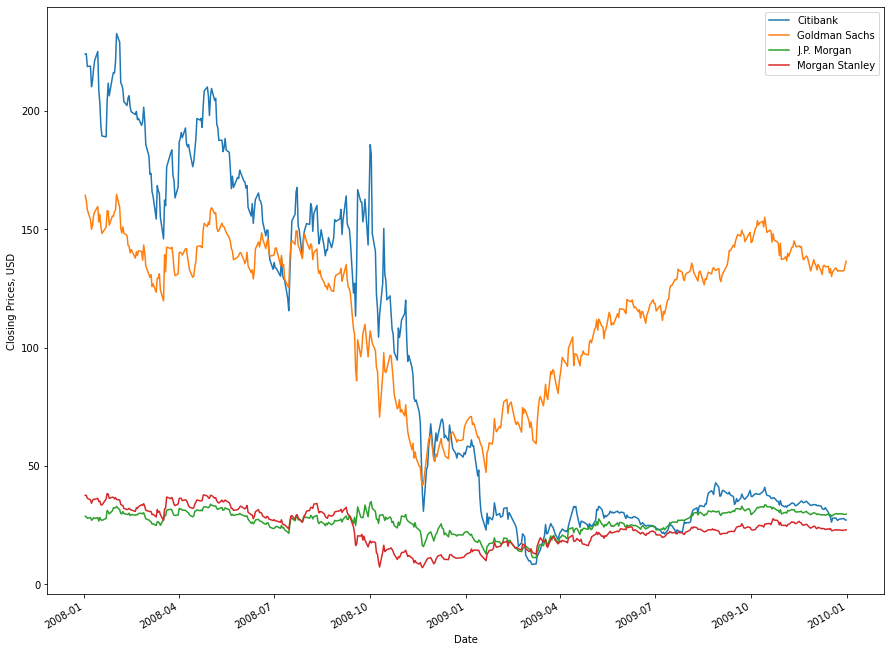

In [34]:
# Select portfolio asset prices for the middle of the crisis, 2008-2009
asset_prices = portfolio.loc['2008-01-01':'2009-12-31']

# Plot portfolio's asset prices during this time
asset_prices.plot(figsize = (15,12)).set_ylabel("Closing Prices, USD")
plt.show()

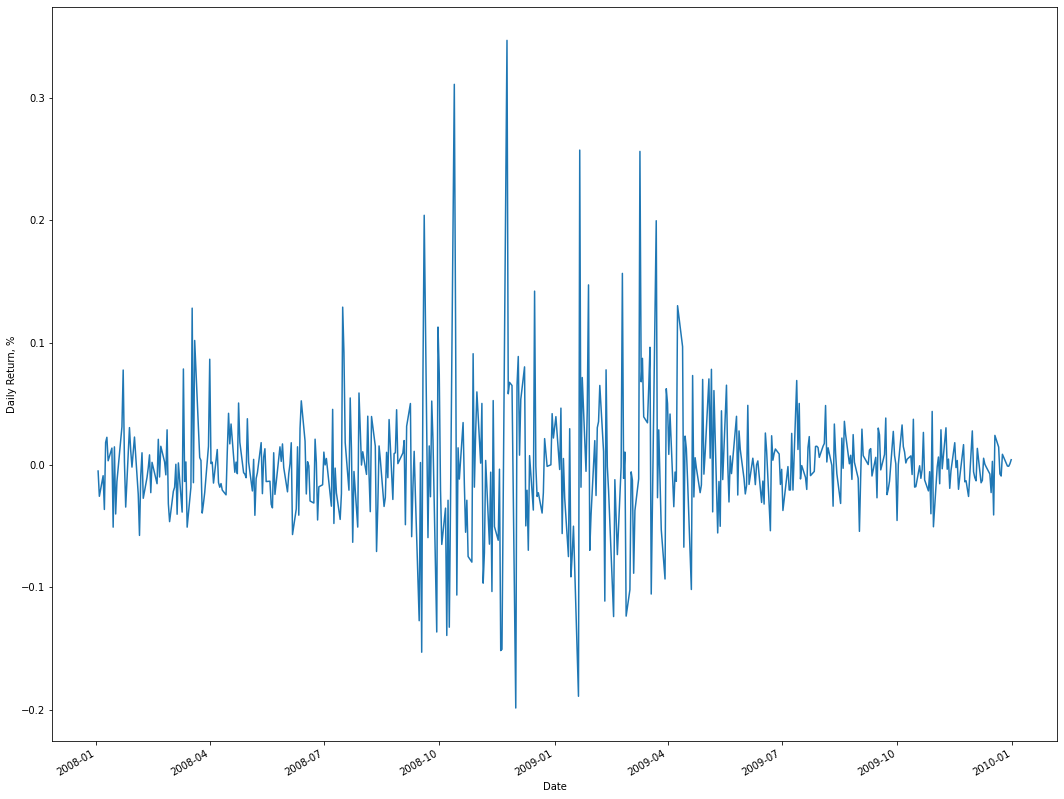

In [35]:
# Compute the portfolio's daily returns
weights =[0.25, 0.25, 0.25, 0.25]
asset_returns = asset_prices.pct_change()
portfolio_returns = asset_returns.dot(weights)

# Plot portfolio returns
portfolio_returns.plot(figsize = (18,15)).set_ylabel("Daily Return, %")
plt.show()

***Bon travail! Le graphique des prix des actifs montre comment la crise financière mondiale a créé une perte de confiance dans les banques d'investissement à partir de septembre 2008. Un événement en septembre a précipité cette baisse, et vous l'examinerez sous peu. La « pointe » des rendements des portefeuilles indique à quel point les rendements des actifs sont devenus incertains et volatils. Vous quantifierez cette volatilité à l'aide du même ensemble de données dans l'exercice suivant.***

###**EXERCICES**

####**Covariance des actifs et volatilité du portefeuille**

+ ***Maintenant que vous avez examiné le rendement du portefeuille des banques d'investissement, il est temps d'évaluer le degré de risque du portefeuille en utilisant la matrice de covariance pour déterminer la volatilité du portefeuille.***

+ **Vous allez d'abord calculer la covariance entre les rendements des actifs et identifier laquelle des banques a eu la volatilité la plus élevée pendant la période de crise de 2008-2009.**

+ ***Ensuite, étant donné les pondérations d'un portefeuille équipondéré, vous trouverez la volatilité annualisée du portefeuille pour cette période en utilisant portfolio_returns.***

+ *Enfin, vous utiliserez une fenêtre de 30 jours pour créer une série chronologique de la volatilité et la visualiserez avec un graphique.*

####**Instructions**
+ Calculez la matrice de covariance des rendements d'actifs du portefeuille à l'aide de la méthode .cov() et annualisez en multipliant la covariance par le nombre de jours de négociation (252).

+ Calculez portfolio_variance en utilisant l'opérateur de matrice @ pour multiplier ensemble la transposition des poids, la matrice de covariance et les poids non transposés. Ceci est utilisé pour trouver et afficher le portfolio_volatility.

+ Calculez la fenêtre glissante de 30 jours return_windowed à l'aide de la méthode .rolling() de portfolio_returns.

+ Calculez la volatilité des séries à l'aide de la méthode .std() de return_windowed, en multipliant par le .sqrt() du nombre de jours de bourse (252).

In [36]:
# Generate the covariance matrix from portfolio asset's returns
covariance = asset_returns.cov()

# Annualize the covariance using 252 trading days per year
covariance = covariance * 252

# Display the covariance matrix
display(covariance)

,Citibank,Goldman Sachs,J.P. Morgan,Morgan Stanley
Citibank,1.48,0.57,0.73,0.82
Goldman Sachs,0.57,0.50,0.43,0.66
J.P. Morgan,0.73,0.43,0.69,0.56
Morgan Stanley,0.82,0.66,0.56,1.30


In [37]:
# Compute and display portfolio volatility for 2008 - 2009
portfolio_variance = np.transpose(weights) @ covariance @ weights
portfolio_volatility = np.sqrt(portfolio_variance)
display(portfolio_volatility)

0.8477474213591661

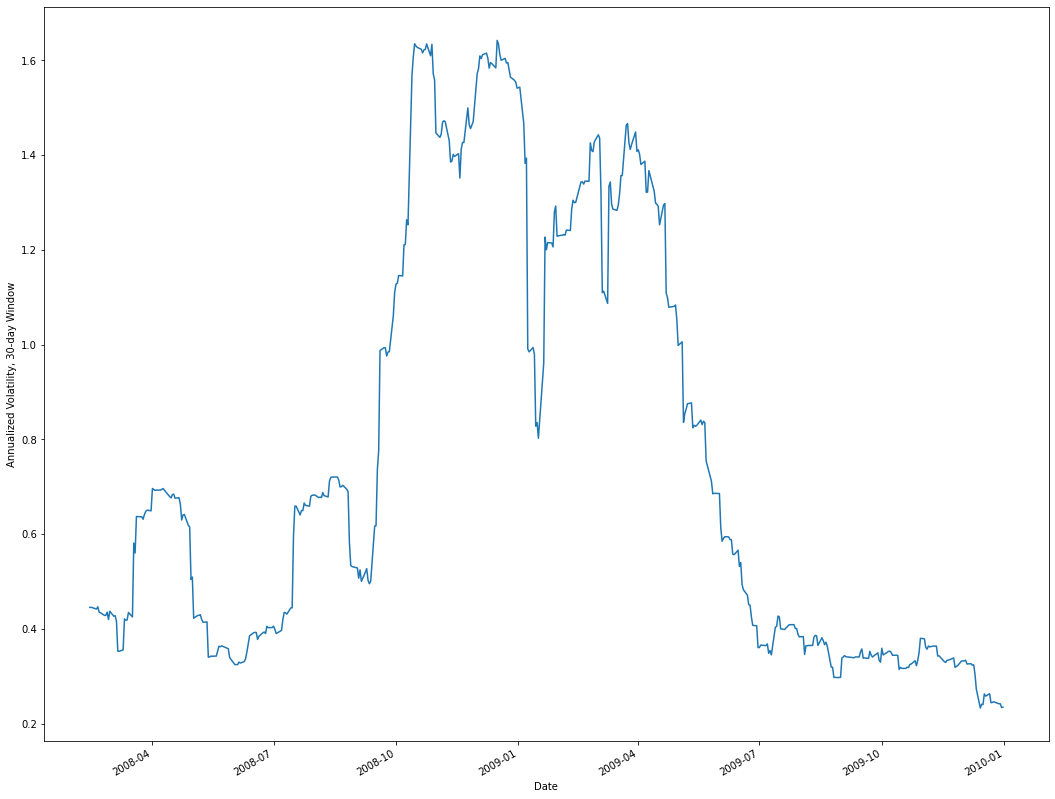

In [38]:
# Calculate the 30-day rolling window of portfolio returns
returns_windowed = portfolio_returns.rolling(30)

# Compute the annualized volatility series
volatility_series = returns_windowed.std()*np.sqrt(252)

# Plot the portfolio volatility
volatility_series.plot(figsize = (18,15)).set_ylabel("Annualized Volatility, 30-day Window")
plt.show()

####**Question**
+ ***Quel actif de portefeuille a la volatilité annualisée la plus élevée sur la période 2008 - 2009 ?***

####**Des réponses possibles**

+ Morgan Stanley

+ Goldman Sachs

+ ***Citibank***

+ JP Morgan

***Excellent! Citibank a affiché la volatilité la plus élevée pendant la période de crise, Morgan Stanley n'étant pas loin derrière. Le diagramme de volatilité montre qu'un portefeuille équipondéré des quatre banques a démontré une augmentation significative de la volatilité à partir de fin septembre 2008, soit à peu près au moment où la 4e plus grande banque d'investissement au monde, Lehman Brothers, a fait faillite. Sa faillite était en grande partie due à une mauvaise gestion des risques associés à ses avoirs en titres adossés à des créances hypothécaires.***

###**Facteurs de risque et crise financière**

####**1. Facteurs de risque et crise financière**

+ ***Dans la leçon précédente, nous avons examiné comment quantifier le rendement et le risque d’un portefeuille. Ensuite, nous examinerons les facteurs de risque du portefeuille pendant la crise financière mondiale.***

####**2. Facteurs de risque**

+ ***La quantification du risque implique la volatilité, une mesure de la dispersion des rendements du portefeuille autour d’une attente de ce que seront les rendements, en prenant le rendement moyen de l’échantillon comme attente.*** 

+ **Mais quelles variables ou quels événements affecteront l’attente et la dispersion des rendements?**

+ **Ces variables ou événements sont connus sous le nom de facteurs de risque d’un portefeuille.**

####**3. Exposition au risque**

+ ***L’exposition au risque d’un portefeuille est la perte possible du portefeuille due à la volatilité des rendements.*** 

+ Considérez l’exposition au risque comme l’impact négatif potentiel d’un avenir incertain. 

+ **Par exemple, vous pouvez assurer votre maison contre les inondations, mais vous devez payer vous-même un montant de perte initial. C’est ce qu’on appelle une franchise***. 

+ **Si le reste des dommages causés par une inondation est entièrement couvert par une assurance, votre franchise correspond à votre exposition au risque.**

+ **Construire une maison dans une zone où les inondations augmentent fréquemment la volatilité des dommages causés par les inondations, ce qui augmente votre franchise en raison de l’exposition accrue au risque.**

###**4. Risque systématique**

+ Nous pouvons classer l’exposition au risque en fonction des facteurs de risque. 

+ ***Certains facteurs de risque affectent tous les actifs du portefeuille de la même manière. C’est ce qu’on appelle le risque systématique.*** 

+ **S’il est basé sur un agrégat de marché, on parle de risque de marché.** 

+ Pensez à être dans un avion lorsque l’un des moteurs de l’avion tombe en panne. 

+ Cette défaillance affecte tout le monde dans l’avion, et est donc un exemple de risque systématique. 

+ Le niveau des prix d’une économie est un facteur de risque systématique pour un portefeuille obligataire, car une inflation plus élevée se traduit par un rendement plus faible. 

+ Le taux d’intérêt dans une économie est également un facteur de risque systématique, car il modifie le coût d’opportunité de l’investissement dans les obligations et les actions. 

+ Un boom économique ou une récession affecte les actifs de manière systématique, entraînant des indices de marché larges tels que le S&P 500 ou le Dow Jones Industrial Average à la hausse ou à la baisse.

####**5. Risque idiosyncratique**

+ **En revanche, les facteurs de risque idiosyncrasiques (ou individuels) sont spécifiques à un actif ou à une classe d’actifs en particulier.** 

+ Pour rappeler notre analogie avec l’avion, ne pas attacher sa ceinture de sécurité lors de fortes turbulences est un exemple du risque idiosyncratique d’un passager. 

+ **Pour un portefeuille obligataire, le risque de défaut de l’émetteur d’obligations est un risque idiosyncratique.**

+ **Les caractéristiques propres à la société émettrice d’un actif, telles que la taille ou le ratio de comptabilité sur marché, contribuent également au risque idiosyncratique, tout comme les chocs spécifiques à une classe d’actifs ou à un secteur.**

####**6. Modèles factoriels**


+ **Les modèles factoriels évaluent l’impact du risque systématique et/ou idiosyncratique sur les rendements**. 

+ **Un modèle factoriel utilise une régression statistique, souvent les moindres carrés ordinaires (ou MCO), pour faire régresser les rendements (ou la volatilité des rendements) sur les facteurs de risque**

+ **Les modèles factoriels tels que le modèle Fama-Français utilisent une combinaison de risque de marché et de risque idiosyncratique, ce dernier étant la taille de l’entreprise (capitalisation boursière) et la valeur de l’entreprise (ratio comptable/marché).**

####**7. Facteur de risque de crise : titres adossés à des créances hypothécaires**

+ La crise financière mondiale n’a pas eu de cause unique. 

+ Mais nous savons ex post qu’il y a eu une mauvaise gestion des risques au sein des banques d’investissement fortement endettées. 

+ C’est parce qu’ils ont utilisé comme garantie de prêt leurs avoirs en titres adossés à des créances hypothécaires (ou MBS). 

+ **Les MBS sont une classe d’actifs où chaque actif détient des parties de nombreuses hypothèques différentes.** 

+ **Pendant la crise, ces actifs ont été mal évalués parce que le risque de défaut était fortement corrélé entre les propriétaires.** 

+ **Cela a considérablement sous-estimé le nombre de personnes qui auraient de la difficulté à rembourser leur prêt hypothécaire en même temps.** 

+ **Le défaut de paiement hypothécaire élevé a détruit la valeur de la garantie.** 

+ **Nous pouvons modéliser les MBS comme facteur de risque en utilisant le pourcentage de prêts hypothécaires ayant au moins 90 jours de retard dans le remboursement, le taux de défaillance de 90 jours. La figure montre à quel point les taux de délinquance ont augmenté de façon spectaculaire pendant la crise.**

####**8. Modèle de facteur de crise**

+ Notre modèle factoriel est alors une régression des rendements de notre portefeuille de banques d’investissement par rapport au taux de défaillance des prêts hypothécaires américains. 

+ **Nous pouvons utiliser la bibliothèque python statsmodels pour exécuter la régression, en créant un objet 'OLS()' least squares et en l’ajustant aux données avec la méthode 'fit()'. Les résultats sont affichés à l’aide de la méthode 'summary()'.**

####**9. Résultats de la régression .summary()**

+ **Bien qu’un sommaire de régression renvoie beaucoup d’informations, pour nos besoins, c’est la signification statistique du coefficient de régression pour les défauts de paiement hypothécaire qui nous préoccupe le plus.** 

+ Dans cet exemple, la ligne en rouge indique la valeur du coefficient de 0 virgule 2256 et sa valeur statistique t de 2 points-275. 

+ Le nombre encadré est le niveau de signification - nous voulons généralement que ce soit 0 point 05 ou moins, pour montrer qu’il y a au moins 95% de confiance que le coefficient est statistiquement différent de zéro.

####**10. Entraînons-nous!**
+ Dans les exercices suivants, vous examinerez les défauts de paiement hypothécaire en tant que facteur de risque pour notre portefeuille de placements. Bonne chance!

###**EXERCICES**

####**Amorce de rééchantillonnage de fréquence**

+ ***Les modèles de facteurs de risque reposent souvent sur des données de fréquences différentes. Un exemple typique est l'utilisation de données macroéconomiques trimestrielles, telles que les prix, les taux de chômage, etc., avec des données financières, qui sont souvent quotidiennes (voire intra-journalières). Pour utiliser les deux sources de données dans le même modèle, les données de fréquence élevée doivent être rééchantillonnées pour correspondre aux données de fréquence inférieure.***

+ **Les objets DataFrame et Series Pandas ont une méthode intégrée .resample() qui spécifie la fréquence inférieure. Cette méthode est enchaînée avec une méthode pour créer la statistique de fréquence inférieure, telle que .mean() pour la moyenne des données dans la nouvelle période de fréquence, ou .min() pour le minimum des données.**

+ *Dans cet exercice, vous vous exercerez à convertir les données de rendements quotidiens en fréquence hebdomadaire et trimestrielle.*

####**Instructions**
+ Convertissez les rendements en rendements moyens de fréquence trimestriels_q à l'aide des méthodes .resample() et .mean().
+ Examinez l'en-tête de return_q, en notant que la méthode .resample() s'occupe de l'index de date pour vous.
+ Convertissez maintenant les retours en retours minimum de fréquence hebdomadaire_w, en utilisant la méthode .min().
+ Examinez l'en-tête de return_w.

In [39]:
# Convert daily returns to quarterly average returns
returns_q = portfolio_returns.resample('Q').mean()

# Examine the beginning of the quarterly series
print(returns_q.head())

Date
2008-03-31   -0.00
2008-06-30   -0.00
2008-09-30    0.00
2008-12-31   -0.00
2009-03-31    0.00
Freq: Q-DEC, dtype: float64


In [40]:
# Now convert daily returns to weekly minimum returns
returns_w = portfolio_returns.resample('W').min()

# Examine the beginning of the weekly series
print(returns_w.head())

Date
2008-01-06   -0.03
2008-01-13   -0.04
2008-01-20   -0.05
2008-01-27   -0.03
2008-02-03   -0.00
Freq: W-SUN, dtype: float64


***Vous avez le coup de main ! Le rééchantillonnage est un outil souvent négligé mais extrêmement important pour l'analyse des séries chronologiques et des facteurs de risque, et nous l'utiliserons dans l'exercice suivant.***

####**Visualisation de la corrélation des facteurs de risque**

+ ***Les banques d'investissement ont massivement investi dans des titres adossés à des créances hypothécaires (MBS) avant et pendant la crise financière. Cela fait des MBS un facteur de risque probable pour le portefeuille des banques d'investissement. Vous évaluerez cela à l'aide de diagrammes de dispersion entre les rendements du portefeuille et une mesure de risque MBS, le taux de délinquance hypothécaire à 90 jours mort_del.***

+ **mort_del n'est disponible que sous forme de données trimestrielles. Ainsi, portfolio_returns doit d'abord être transformé de fréquence quotidienne en fréquence trimestrielle à l'aide de la méthode DataFrame .resample().**

+ *Votre espace de travail contient à la fois portfolio_returns pour un portefeuille équipondéré et la variable de taux de délinquance mort_del. Pour les nuages de points, plot_average et plot_min sont des axes de tracé dans votre espace de travail - vous y ajouterez vos nuages de points à l'aide de la méthode .scatter() .*

####**Instructions**

+ Transformez les données quotidiennes de portfolio_returns en données trimestrielles moyennes à l'aide des méthodes .resample() et .mean().
+ Ajoutez un nuage de points entre mort_del et portfolio_q_average à plot_average. Existe-t-il une forte corrélation ?
+ Créez maintenant des données trimestrielles minimales en utilisant .min() au lieu de .mean().
+ Ajoutez un nuage de points entre mort_del et portfolio_q_min à plot_min.

In [ ]:
help(pd.DataFrame)

In [41]:
Date = ['2005-03-31','2005-06-30','2005-09-30', '2005-12-31', '2006-03-31',
        '2006-06-30', '2006-09-30', '2006-12-31', '2007-03-31','2007-06-30',
        '2007-09-30','2007-12-31','2008-03-31','2008-06-30','2008-09-30',
        '2008-12-31','2009-03-31','2009-06-30','2009-09-30','2009-12-31',
        '2010-03-31','2010-06-30','2010-09-30', '2010-12-31']

Mortgage_Delinquency_Rate = [
    0.015, 0.016, 0.016, 0.016, 0.016, 0.017, 0.019, 0.021, 0.023,
    0.027, 0.031, 0.037, 0.044, 0.053, 0.066, 0.080, 0.086, 0.095,
    0.103, 0.115, 0.111, 0.106, 0.104, 0.103]

port_q_mean = [-3.667e-04, -3.655e-04, 6.155e-04, 1.323e-03, 1.384e-03,
    8.366e-05, 1.654e-03, 1.717e-03, -1.995e-04, 5.089e-04, -1.446e-03,
   -2.300e-03, -2.337e-03, -2.166e-03, 9.432e-04, -3.480e-03, 2.415e-03,
    4.946e-03, 4.516e-03, -1.940e-03, 1.330e-03, -2.688e-03, 1.088e-03, 
    2.328e-03]

port_q_min = [-0.022, -0.023, -0.015, -0.014, -0.029, -0.035,
   -0.019, -0.025, -0.053, -0.024, -0.054, -0.060, -0.058,
   -0.057, -0.153, -0.199, -0.189, -0.102, -0.054, -0.051, 
   -0.051, -0.071, -0.03, -0.028]

vol_q_mean = [0.008, 0.010, 0.007, 0.008, 0.008, 0.011, 0.011,
 0.008, 0.011, 0.011, 0.019, 0.024, 0.028, 0.030, 0.041, 0.094,
  0.080, 0.054, 0.023, 0.020, 0.017, 0.021, 0.017, 0.016]

In [42]:
mort_del = pd.DataFrame( Mortgage_Delinquency_Rate, 
                        index = Date,
                        columns = ['Mortgage Delinquency Rate'])

In [43]:
port_q_mean =  pd.DataFrame(port_q_mean, 
                        index = Date,
                         columns = ['port q mean'])

In [44]:
port_q_min =  pd.DataFrame(port_q_min, 
                        index = Date,
                         columns = ['port q min'])

In [45]:
vol_q_mean =  pd.DataFrame(vol_q_mean, 
                        index = Date,
                         columns = ['vol q mean'])

In [ ]:
port_q_mean.head()

,port q mean
2005-03-31,-0.00
2005-06-30,-0.00
2005-09-30,0.00
2005-12-31,0.00
2006-03-31,0.00


In [ ]:
mort_del.head()

,Mortgage Delinquency Rate
2005-03-31,0.01
2005-06-30,0.02
2005-09-30,0.02
2005-12-31,0.02
2006-03-31,0.02


In [46]:
# Transform the daily portfolio_returns into quarterly average returns
portfolio_q_average = portfolio_returns.resample('Q').mean().dropna()

In [ ]:
help(plt.scatter)

In [30]:
# Create a scatterplot between delinquency and quarterly average returns
#plt.scatter(mort_del, portfolio_q_average)

In [47]:
# Transform daily portfolio_returns returns into quarterly minimum returns
portfolio_q_min = portfolio_returns.resample('Q').min().dropna()

In [ ]:
# Create a scatterplot between delinquency and quarterly minimum returns
plt.scatter(mort_del, portfolio_q_min)
plt.show()

***Bien joué. Votre évaluation initiale indique qu'il y a peu de corrélation entre les rendements moyens et les impayés hypothécaires, mais une corrélation négative plus forte existe entre les rendements _minimum_ et les impayés. Dans les exercices suivants, vous quantifierez cela à l'aide de la régression des moindres carrés.***

In [48]:
import statsmodels.api as sm

In [49]:
# Add a constant to the regression
mort_del = sm.add_constant(mort_del)

# Create the regression factor model and fit it to the data
results = sm.OLS(port_q_mean, mort_del).fit()

# Print a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            port q mean   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                    0.4609
Date:                Fri, 03 Mar 2023   Prob (F-statistic):              0.504
Time:                        16:12:49   Log-Likelihood:                 113.88
No. Observations:                  24   AIC:                            -223.8
Df Residuals:                      22   BIC:                            -221.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [50]:
# Add a constant to the regression
mort_del = sm.add_constant(mort_del)

# Create the regression factor model and fit it to the data
results = sm.OLS(port_q_min, mort_del).fit()

# Print a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             port q min   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     4.669
Date:                Fri, 03 Mar 2023   Prob (F-statistic):             0.0419
Time:                        16:12:52   Log-Likelihood:                 39.869
No. Observations:                  24   AIC:                            -75.74
Df Residuals:                      22   BIC:                            -73.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [51]:
# Add a constant to the regression
mort_del = sm.add_constant(mort_del)

# Create the regression factor model and fit it to the data
results = sm.OLS(vol_q_mean, mort_del).fit()

# Print a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             vol q mean   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     5.260
Date:                Fri, 03 Mar 2023   Prob (F-statistic):             0.0317
Time:                        16:12:55   Log-Likelihood:                 60.058
No. Observations:                  24   AIC:                            -116.1
Df Residuals:                      22   BIC:                            -113.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

***Bon! Comme le montrent les régressions, les impayés hypothécaires agissent comme un facteur de risque systématique pour les rendements trimestriels minimums et la volatilité moyenne des rendements, mais _pas_ pour les rendements trimestriels moyens. La qualité de l'ajustement R au carré n'est pas élevée dans tous les cas, mais un modèle avec plus de facteurs générerait probablement une plus grande puissance explicative.***

###**Théorie moderne du portefeuille**

####**1. Théorie moderne du portefeuille**

+ ***Maintenant que nous comprenons les facteurs de risque, nous pouvons mieux comprendre la relation entre le risque et le rendement.***

####**2. Le compromis risque-rendement**

+ ***Il est logique que plus notre appétit pour le risque est grand, plus notre rendement futur attendu devrait être élevé. Après tout, nous nous attendons à obtenir quelque chose de plus en assumant plus de risques! Mais nous ne pouvons généralement pas garantir un retour : nous ne pouvons parler que d’une attente. Une mesure du rendement attendu souvent utilisée est le rendement historique moyen (moyen) au fil du temps. Il s’agit d’une approximation des rendements futurs.***

####**3. Appétit pour le risque des investisseurs**

+ Imaginez que nous menions une enquête, demandant aux investisseurs quel doit être leur rendement minimum attendu, pour qu’ils assument un certain niveau de risque. 

+ Leur réponse est un « point de données » du profil de risque d’un investisseur. 

+ Poser la même question plusieurs fois, avec un niveau de risque différent à chaque fois, crée une liste de points (risque, rendement minimum attendu). 

+ Ces points nous donnent des informations sur « l’appétit pour le risque » de l’investisseur.

####**4. Choix des pondérations de portefeuille**

+ Au lieu de répondre à un sondage, un investisseur peut obtenir une paire (risque, rendement) pour un portefeuille en ajustant les pondérations du portefeuille. 

+ C’est notre premier pas vers la gestion des risques! Un investisseur veut le rendement attendu le plus élevé pour un niveau de risque donné. 

+ Alternativement, nous pourrions varier les pondérations pour trouver le plus petit niveau de risque pour un rendement attendu donné. 

+ Dans les deux cas, nous effectuons une gestion des risques : 
  + la modification de la pondération du portefeuille modifie l’exposition au risque d’un investisseur pour obtenir une combinaison (risque, rendement) qui respecte l’appétit pour le risque de l’investisseur.

####**5. Théorie moderne du portefeuille**

+ Un portefeuille dont les pondérations offrent le rendement attendu le plus élevé pour un niveau de risque donné est appelé « portefeuille efficient ».

+  Cette façon mathématique de quantifier le compromis risque-rendement est appelée « théorie moderne du portefeuille », créée par le lauréat du prix Nobel H M Markowitz au début des années 1950. 

+ Le portefeuille efficace est la solution à un problème d’optimisation, qui sélectionne les pondérations du portefeuille pour maximiser le rendement attendu du portefeuille, en fonction d’un niveau de risque particulier donné par la volatilité du portefeuille.

####**6. La frontière efficace**
+ Tout comme dans notre exemple d’appétit pour le risque, nous pouvons calculer le portefeuille efficace sur un large éventail de niveaux de risque. 

+ Cela nous donnera à nouveau un ensemble de paires (risque, rendement), et celles-ci peuvent être tracées pour créer la « frontière efficace ». 

+ Nous pouvons utiliser la bibliothèque PyPortfolioOpt pour calculer la frontière efficace. 

+ La méthode standard consiste à créer un objet EfficientFrontier. 

+ Mais cela ne trouve qu’un seul portefeuille optimal et non toute la frontière. 

+ Au lieu de cela, nous utiliserons un algorithme de ligne contrainte, ou CLA, qui peut générer la frontière efficace. Nous avons besoin à la fois de la matrice de covariance et de notre approximation du rendement attendu, le rendement historique moyen.

####**7. Portefeuille des banques d’investissement 2005 - 2010**

+ Nous pouvons utiliser PyPortfolioOpt sur notre portefeuille de banques d’investissement pour trouver et visualiser la frontière efficiente pour la période 2005 - 2010. 

+ Pour ce faire, nous calculons d’abord le rendement attendu à l’aide de données historiques sur les prix des actifs. 

+ Ensuite, nous dérivons une estimation efficace de la matrice de covariance, en utilisant l’objet CovarianceShrinkage. 

+ Cela améliore la covariance de l’échantillon en « réduisant » les erreurs extrêmes qui peuvent être causées par l’échantillonnage. 

+ Nous utilisons ici la méthode populaire de Ledoit-Wolf pour calculer la matrice de covariance efficace. À l’aide de ceux-ci, nous créons l’objet CLA. 

+ Rappelez-vous, cet objet nous permet de tracer toute la frontière efficace. 

+ Ensuite, nous trouvons le portefeuille de variance minimale en utilisant la méthode .min_volatility(), qui sera discutée sous peu, et enfin la frontière efficace avec la méthode .efficient_frontier(). 

+ Cela fournit, en plus des pondérations du portefeuille, des valeurs de risque et de rendement dans les variables « vol » et « ret », respectivement.

####**8. Visualiser la frontière efficace**
+ Nous pouvons créer une représentation visuelle de la frontière efficiente en traçant les paires de portefeuilles efficaces qui en résultent.

####**9. Visualiser la frontière efficace**
+ Notez que dans le tracé de la frontière efficiente, un portefeuille se distingue comme ayant la plus faible volatilité possible: 
  + il s’agit du portefeuille à variance minimale et est souvent utilisé comme référence pour évaluer l’appétit pour le risque d’un investisseur.

####**10. Visualiser la frontière efficace**
+ Un investisseur peut souhaiter assumer plus de risques (volatilité plus élevée), ce qui entraîne un rendement attendu plus élevé. 

+ Ils se déplacent le long de la frontière efficiente jusqu’à ce qu’ils trouvent un portefeuille efficace qui correspond à leur appétit pour le risque.

####**11. Entraînons-nous!**
+ Dans les exercices à suivre, vous vous entraînerez à utiliser PyPortfolioOpt et à diviser la période 2005-2010 en périodes avant, pendant et après la crise financière, en examinant la frontière efficiente pour chaque période. Bonne chance!

###**EXERCICES***

####**Pratique avec PyPortfolioOpt : retours**

+ La théorie moderne du portefeuille est la pierre angulaire de la gestion des risques de portefeuille, car la frontière efficiente est une méthode standard d'évaluation à la fois de l'appétit pour le risque des investisseurs et des compromis risque-rendement du marché. 

+ Dans cet exercice, vous allez développer des outils puissants pour explorer la frontière efficace d'un portefeuille, à l'aide de la bibliothèque Python PyPortfolioOpt pypfopt.

+ Pour calculer la frontière efficiente, les rendements attendus et la matrice de covariance du portefeuille sont nécessaires.

+ *Après quelques exercices de chargement des données de prix des banques d'investissement, vous utiliserez la méthode mean_historical_return de pypfopt.expected_returns pour calculer et visualiser les rendements moyens annualisés de chaque banque à partir des prix des actifs quotidiens. L'exercice suivant couvrira ensuite la matrice de covariance.*

####**Instructions**
+ Chargez les données de portefeuille portfolio.csv dans les prix à l'aide de la méthode .read_csv().


+ Convertissez la colonne 'Date' dans les prix au format datetime et faites-en l'index en utilisant la méthode .set_index() des prix.

+ Importez mean_historical_return depuis le module pypfopt.expected_returns.
+ Calculez et tracez le rendement historique moyen annualisé (moyen) à l'aide des prix du portefeuille et de la méthode return_historical_mean.

In [ ]:
!pip install PyPortfolioOpt

In [52]:
prices = portfolio.copy()

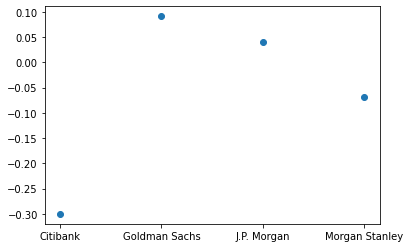

In [53]:
# Import the mean_historical_return method
from pypfopt.expected_returns import mean_historical_return

# Compute the annualized average historical return
mean_returns = mean_historical_return(prices, frequency = 252)

# Plot the annualized average historical return
plt.plot(mean_returns, linestyle = 'None', marker = 'o')
plt.show()

***Génial! Le rendement historique moyen est généralement disponible en tant qu'approximation des rendements attendus, mais n'est pas toujours précis : une estimation plus approfondie des rendements attendus nécessite une hypothèse sur la _distribution_ du rendement, dont nous discuterons dans le contexte des distributions des pertes plus tard dans le cours.***

####**S'entraîner avec PyPortfolioOpt : covariance**

+ ***L'optimisation du portefeuille repose sur une estimation impartiale et efficace de la covariance des actifs. Bien que la covariance de l'échantillon soit impartiale, elle n'est pas efficace - les événements extrêmes ont tendance à être surpondérés.***

+ **Une approche pour atténuer ce problème consiste à utiliser le «rétrécissement de la covariance», où les erreurs importantes sont réduites («rétrécies») pour améliorer l'efficacité. Dans cet exercice, vous utiliserez l'objet CovarianceShrinkage de pypfopt.risk_models pour transformer la covariance de l'échantillon en une estimation efficace. La méthode de réduction des erreurs de manuel, .ledoit_wolf(), est une méthode de cet objet.**

+ *Les prix des actifs sont disponibles dans votre espace de travail. Notez que bien que l'objet CovarianceShrinkage accepte les prix comme entrée, il calcule en fait la matrice de covariance des rendements des actifs, pas les prix.*

####**Consignes** 
+ Importez l'objet CovarianceShrinkage à partir du module pypfopt.risk_models.
+ Créez la variable d'instance CovarianceShrinkage cs, la matrice de covariance des rendements.

+ Calculez la covariance d'échantillon annualisée sample_cov à partir des prix à l'aide de la méthode .cov() DataFrame.

+ Calculez la matrice de covariance efficace annualisée e_cov en utilisant cs et sa méthode .ledoit_wolf(), et comparez-la à sample_cov.

In [54]:
# Import the CovarianceShrinkage object
from pypfopt.risk_models import CovarianceShrinkage

# Create the CovarianceShrinkage instance variable
cs = CovarianceShrinkage(prices)

In [55]:
# Compute the sample covariance matrix of returns
sample_cov = prices.pct_change().cov() * 252

# Compute the efficient covariance matrix of returns
e_cov = cs.ledoit_wolf()

# Display both the sample covariance_matrix and the efficient e_cov estimate
print("Sample Covariance Matrix\n", sample_cov, "\n")

Sample Covariance Matrix
                 Citibank  Goldman Sachs  J.P. Morgan  Morgan Stanley
Citibank            0.54           0.22         0.27            0.31
Goldman Sachs       0.22           0.22         0.17            0.26
J.P. Morgan         0.27           0.17         0.26            0.22
Morgan Stanley      0.31           0.26         0.22            0.49 



In [56]:
print("Efficient Covariance Matrix\n", e_cov, "\n")

Efficient Covariance Matrix
                 Citibank  Goldman Sachs  J.P. Morgan  Morgan Stanley
Citibank            0.53           0.21         0.26            0.29
Goldman Sachs       0.21           0.23         0.16            0.25
J.P. Morgan         0.26           0.16         0.27            0.21
Morgan Stanley      0.29           0.25         0.21            0.48 



***Excellent. Bien que les différences entre la covariance de l'échantillon et la covariance efficiente (découverte par la réduction des erreurs) puissent sembler faibles, elles ont un impact considérable sur l'estimation des pondérations optimales du portefeuille et sur la génération de la frontière efficiente. Les praticiens utilisent généralement une certaine forme de covariance efficace pour la théorie moderne du portefeuille.***

####**Briser la crise financière**

+ ***Dans la vidéo, vous avez vu la frontière efficiente du portefeuille des banques d'investissement sur toute la période 2005 - 2010, qui comprend la période avant, pendant et après la crise financière mondiale.***

+ **Ici, vous décomposerez cette période en trois sous-périodes, ou époques : 2005-2006 (avant), 2007-2008 (pendant) et 2009-2010 (après). Pour chaque période, vous allez calculer la matrice de covariance efficace et les comparer les unes aux autres.***

+ *Les prix du portefeuille pour 2005 - 2010 sont disponibles dans votre espace de travail, tout comme l'objet CovarianceShrinkage de PyPortfolioOpt.*

####**Instructions**
+ Créez un dictionnaire des époques : ses clés sont les sous-périodes et ses valeurs sont les dictionnaires des dates de "début" et de "fin".
+ Pour chacune des clés de sous-période dans les époques, définissez sub_price sur la plage de prix pour cette sous-période.
+ Utilisez sub_price et l'objet CovarianceShrinkage pour trouver une matrice de covariance efficace pour chaque sous-période.
+ Imprimez et comparez les matrices de covariance efficaces résultantes pour les trois sous-périodes.

In [57]:
# Create a dictionary of time periods (or 'epochs')
epochs = { 'before' : {'start': '1-1-2005', 'end': '31-12-2006'},
           'during' : {'start': '1-1-2007', 'end': '31-12-2008'},
           'after'  : {'start': '1-1-2009', 'end': '31-12-2010'}
         }

# Compute the efficient covariance for each epoch
e_cov = {}
for x in epochs.keys():
  sub_price = prices.loc[epochs[x]['start']:epochs[x]['end']]
  e_cov[x] = CovarianceShrinkage(sub_price).ledoit_wolf()

# Display the efficient covariance matrices for all epochs
display("Efficient Covariance Matrices\n", e_cov)

'Efficient Covariance Matrices\n'

{'before':                 Citibank  Goldman Sachs  J.P. Morgan  Morgan Stanley
 Citibank            0.02           0.01         0.01            0.01
 Goldman Sachs       0.01           0.04         0.02            0.03
 J.P. Morgan         0.01           0.02         0.02            0.02
 Morgan Stanley      0.01           0.03         0.02            0.04,
 'during':                 Citibank  Goldman Sachs  J.P. Morgan  Morgan Stanley
 Citibank            0.71           0.32         0.37            0.47
 Goldman Sachs       0.32           0.41         0.22            0.44
 J.P. Morgan         0.37           0.22         0.42            0.30
 Morgan Stanley      0.47           0.44         0.30            0.98,
 'after':                 Citibank  Goldman Sachs  J.P. Morgan  Morgan Stanley
 Citibank            0.84           0.25         0.36            0.35
 Goldman Sachs       0.25           0.25         0.22            0.23
 J.P. Morgan         0.36           0.22         0.38      

***Génial! La décomposition de la période 2005 - 2010 en sous-périodes montre comment le risque du portefeuille a augmenté pendant la crise, ce qui a modifié l'arbitrage rendement/risque après la crise. Pour référence future, notez également que bien que nous ayons utilisé une boucle dans cet exercice, une compréhension de dictionnaire aurait également pu être utilisée pour créer la matrice de covariance efficace.***

####**La frontière efficiente et la crise financière**

+ ***Auparavant, vous avez examiné la matrice de covariance du portefeuille de la banque d'investissement avant, pendant et après la crise financière. Vous allez maintenant visualiser les changements qui ont eu lieu dans la frontière efficiente, montrant comment la crise a créé un risque de base beaucoup plus élevé pour un rendement donné.***

+ **À l'aide de l'objet Critical Line Algorithm (CLA) de la bibliothèque PyPortfolioOpt pypfopt, vous allez dériver et visualiser la frontière efficace pendant la période de crise, et l'ajouter à un nuage de points affichant déjà les frontières efficaces avant et après la crise.**

+ *Les rendements attendus return_during et la matrice de covariance efficace ecov_during sont disponibles, tout comme l'objet CLA de pypfopt. (N'oubliez pas que les tracés DataCamp peuvent être étendus à leur propre fenêtre, ce qui peut améliorer la lisibilité.)*

####**Instructions**
+ Créez l'objet efficient_portfolio_during de l'algorithme de ligne critique (CLA), en utilisant les rendements attendus et la covariance efficace des rendements.
+ Imprimer le portefeuille de variance minimale de efficient_portfolio_during.
+ Calculez la frontière efficiente de efficient_portfolio_during.
+ Ajoutez les résultats de la frontière efficiente aux diagrammes de dispersion déjà affichés des frontières efficientes d'avant et d'après la crise.

In [58]:
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import EfficientFrontier
from pypfopt import objective_functions
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from pypfopt import HRPOpt
from pypfopt import CLA
from pypfopt import black_litterman
from pypfopt import BlackLittermanModel
from pypfopt import plotting

In [ ]:
help(pd.DataFrame)

In [59]:
values_1 = [[0.969, 0.410, 0.282], 
            [0.410, 0.416, 0.212], 
            [0.282, 0.212, 0.429]]
values_2 = [-0.557, -0.352, -0.190]
ecov_during = pd.DataFrame(
  values_1,
  columns = ['Morgan Stanley' , 'Goldman Sachs', 'J.P. Morgan'],
  index = ['Morgan Stanley' , 'Goldman Sachs', 'J.P. Morgan'])
returns_during = pd.DataFrame(
    values_2,
    index = ['Morgan Stanley' , 'Goldman Sachs', 'J.P. Morgan'])

OrderedDict([(0, 0.0), (1, 0.5154394299287411), (2, 0.4845605700712589)])


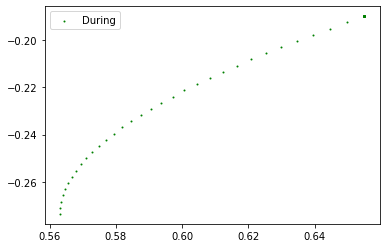

In [60]:
# Initialize the Crtical Line Algorithm object
efficient_portfolio_during = CLA(returns_during, ecov_during)

# Find the minimum volatility portfolio weights and display them
print(efficient_portfolio_during.min_volatility())

# Compute the efficient frontier
(ret, vol, weights) = efficient_portfolio_during.efficient_frontier()

# Add the frontier to the plot showing the 'before' and 'after' frontiers
plt.scatter(vol, ret, s = 4, c = 'g', marker = '.', label = 'During')
plt.legend()
plt.show()

###**Mesure du risque**

####**1. Mesure du risque**

+ ***Nous avons examiné comment la frontière efficiente nous permet de faire un compromis entre risque et rendement. Mais comment mesurer le risque? Ici, nous allons estimer combien un portefeuille risque de perdre, en utilisant les statistiques Valeur à risque et Valeur conditionnelle à risque.***

####**2. La répartition des pertes**

+ Supposons qu’un investisseur européen détienne un portefeuille de devises détenant 100 dollars américains. 

+ Le portefeuille de l’investisseur l’expose au taux de change Euro pour Dollar, puisque l’investisseur valorise finalement le rendement du portefeuille en Euros. 

+ Si la valeur de départ du portefeuille est de 100 euros, le taux de change est de 1 euro par dollar. 

+ Mais en général, la valeur du portefeuille fluctue, car le taux de change « r » est aléatoire. 

+ La perte sera la différence entre la valeur initiale du portefeuille de 100 euros et la nouvelle valeur de « r » fois 100. 

+ ***Une répartition des pertes nous indique les pertes potentielles futures d’un portefeuille en raison de la nature aléatoire de ses facteurs de risque, lorsque les avoirs sont fixes sur un horizon temporel.***

####**3. Perte maximale**

+ **Pour les institutions financières, une limite supérieure des pertes est cruciale**. 

+ **Parce que les facteurs de risque sont aléatoires, il n’est généralement pas possible de lier les pertes avec 100% de certitude**. 

+ **Au lieu de cela, nous recherchons la probabilité que les pertes restent plafonnées par une limite supérieure**. 

+ **Cette probabilité s’appelle le niveau de confiance. Le niveau de confiance nous permet d’exprimer des questions sur la perte maximale du point de vue de la probabilité, telles que « Quelle est la perte maximale qui se produirait 95% du temps? ». Dans cette question, le niveau de confiance est de 95 %.**

####**4. Valeur à risque (VaR)**

+ **La statistique de la valeur à risque, ou « VaR », mesure la perte maximale du portefeuille pour un niveau de confiance donné.** 

+ **La VaR est généralement exprimée pour des niveaux de confiance de 95 %, 99 % ou 99 virgule 5 %**. 

+ Dans notre exemple de portefeuille, si le taux de change euro-dollar reste supérieur à 40 centimes d’euro par rapport au dollar 95% du temps, la valeur minimale du portefeuille est de 40 euros et la perte maximale est donc de 60 euros. Ainsi, la VaR de 95% est de 60 euros.

####**5. Valeur conditionnelle à risque (CVaR)**

+ **La statistique conditionnelle de la valeur à risque, ou CVaR, demande quelle sera la perte prévue à condition que la perte soit supérieure à la VaR**. 

+ **CVaR est la valeur attendue de la perte sur la queue de la distribution des pertes**. 

+ **Notez que CVaR est parfois exprimé en utilisant le niveau de confiance, 95%, et parfois avec le niveau de signification, qui est 100% - le niveau de confiance, ou dans ce cas 5%**. 

+ Nous utiliserons la première convention dans ce cours. 

+ Dans la figure, nous voyons la distribution des pertes en rouge, la VaR de 95% sous forme de ligne bleue (ici égale à environ 1 point 64) et la queue de la distribution dépassant la VaR sous forme de zone bleue ombragée. 

+ **La valeur attendue de la queue est le CVaR, qui est la perte attendue dans les pires 5% des résultats.** 

+ **Le calcul du CVaR nécessite la distribution des pertes, la perte maximale possible (qui peut être infinie) et la perte minimale possible (qui est la VaR).** 

+ Dans notre exemple de change, le CVaR de 95% serait la perte attendue lorsque le portefeuille a déjà perdu 60 euros, c’est-à-dire lorsque la valeur du portefeuille est inférieure à 40 euros.

####**6. Calcul de la VaR**

+ **Pour calculer la VaR, spécifiez d’abord le niveau de confiance.** 

+ **Créez ensuite un objet Pandas Series à partir des observations, considérées ici comme des pertes de portefeuille (cela peut également être dérivé d’une distribution de probabilité)**. 

+ **Ensuite, calculez le quantile de la distribution des pertes correspondant au niveau de confiance. Nous pouvons utiliser la méthode 'quantile()' attachée à l’objet Series**. 

+ **Le quantile calculé est la VaR à ce niveau de confiance. Si nous savons que les pertes sont distribuées selon une distribution statistique comme la distribution normale, nous pouvons également utiliser la fonction 'ppf()', ou fonction de point de pourcentage, pour trouver la VaR, comme nous le ferons bientôt.**

####**7. Dérivation du CVaR**

+ **Pour calculer le CVaR, spécifiez d’abord le niveau de confiance. Spécifiez ensuite l’échantillon de répartition des pertes. Ici, au lieu d’un ensemble général d’observations, nous utiliserons comme exemple les pertes de portefeuille d’un échantillon aléatoire d’une distribution normale en utilisant l’objet « norme » de « statistiques de scipy ».** 

+ **Ensuite, nous calculons la VaR à ce niveau de confiance, en utilisant la méthode 'ppf()' de l’objet 'norm'**. 

+ **Nous aurions également pu utiliser la méthode quantile sur les « pertes », si nous le souhaitions, mais la fonction de point de pourcentage est très utile lorsque la distribution est connue**. 

+ **La VaR est utilisée comme limite inférieure pour trouver la valeur attendue de la perte de queue. Si les pertes sont normalement distribuées, la méthode 'expect()' attachée à l’objet 'norm' calculera le CVaR**. 

+ **Si les pertes ne sont pas Normalement distribuées, la valeur attendue est calculée à l’aide de l’intégrale indiquée précédemment, dans la définition du CVaR.**

####**8. Visualisation de la VaR**

+ Nous visualisons la VaR en traçant la distribution des pertes et en montrant où se trouve la valeur quantile, avec une ligne verticale. 

+ Ici, nous traçons un histogramme de 1000 dessins à partir d’une distribution normale, pour représenter la distribution des pertes.

####**9. Visualisation de la VaR**
+ Une ligne verticale est tracée aux valeurs quantiles pour 95%,

####**10. Visualisation de la VaR**
+ 99%

####**11. Visualisation de la VaR**
+ et 99 et 1/2 %. Remarquez comment la ligne verticale se déplace de plus en plus vers la droite, montrant comment la VaR augmente à mesure que le niveau de confiance augmente.

####**12. Entraînons-nous!**
+ Maintenant, c’est votre tour! Testez vos connaissances sur la VaR et le CVaR en créant et en traçant une répartition des pertes, en calculant des statistiques et en les ajoutant à votre graphique de répartition des pertes.

###**EXERCICES**

####**VaR pour la distribution normale**

+ Pour s'habituer à la mesure de la Value at Risk (VaR), il est utile de l'appliquer à une distribution connue. 

+ **La distribution normale (ou gaussienne) est particulièrement attrayante car elle 1) a une forme analytiquement simple et 2) représente une grande variété de phénomènes empiriques. Pour cet exercice, vous supposerez que la perte d'un portefeuille est normalement distribuée, c'est-à-dire que plus la valeur tirée de la distribution est élevée, plus la perte est élevée.**

+ *Vous apprendrez à appliquer à la fois la fonction ppf () de scipy.stats.norm et la fonction quantile () de numpy pour trouver la VaR aux niveaux de confiance de 95% et 99%, respectivement, pour une distribution normale standard. Vous allez également visualiser la VaR sous forme de seuil sur un diagramme de distribution normale.*

####**Instructions**
+ Utilisez la fonction de point de pourcentage .ppf() de norm pour trouver la mesure VaR au niveau de confiance de 95 %.
+ Trouvez maintenant la mesure de VaR à 99 % à l'aide de la fonction quantile() de Numpy appliquée à 100 000 tirages normaux aléatoires.
+ Comparez les mesures de VaR à 95 % et à 99 % à l'aide d'un relevé imprimé.
+ Tracez la distribution normale et ajoutez une ligne indiquant la VaR à 95 %.

In [61]:
import scipy.stats as stats
from scipy.stats import norm

95% VaR:  1.6448536269514722 ; 99% VaR:  2.332800724671231


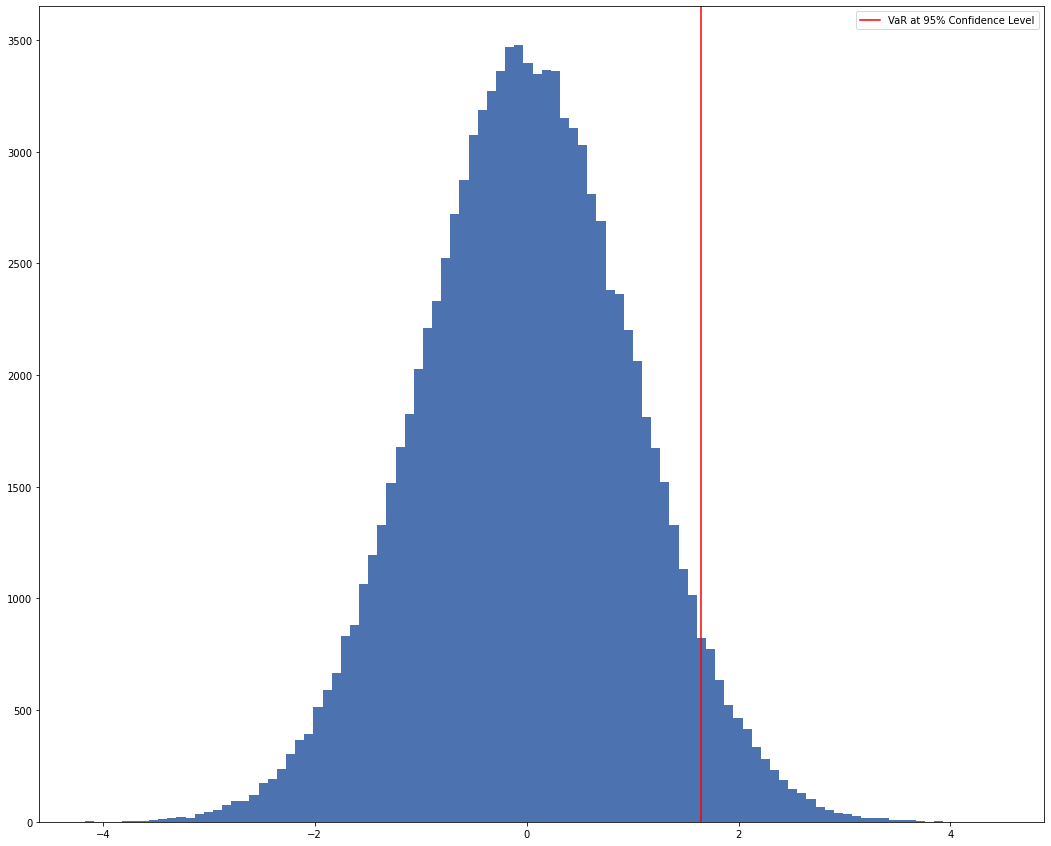

In [62]:
# Create the VaR measure at the 95% confidence level using norm.ppf()
VaR_95 = norm.ppf(0.95)

# Create the VaR measure at the 99% confidence level using numpy.quantile()
draws = norm.rvs(size = 100000)
VaR_99 = np.quantile(draws, 0.99)

# Compare the 95% and 99% VaR
print("95% VaR: ", VaR_95, "; 99% VaR: ", VaR_99)

# Plot the normal distribution histogram and 95% VaR measure
plt.figure(figsize=(18,15))
plt.hist(draws, bins = 100)
plt.axvline(x = VaR_95, c='r', label = "VaR at 95% Confidence Level")
plt.legend(); plt.show()

***Super! Comme le montre votre graphique, la VaR à 95 % est d'environ 1,65, ce qui correspond à la perte maximale qui devrait se produire 95 % du temps. Vous avez également utilisé à la fois la fonction de densité cumulée inverse (la fonction de point de pourcentage) et la fonction quantile pour trouver la VaR.***

####**Comparer CVaR et VaR**

+ ***La valeur à risque conditionnelle (CVaR), ou déficit attendu (ES), demande quelle sera la perte moyenne, à condition que les pertes dépassent un certain seuil à un certain niveau de confiance. Il utilise la VaR comme point de départ, mais contient plus d'informations car il prend en compte la queue de la distribution des pertes.**

+ **Vous allez d'abord calculer la VaR à 95 % pour une distribution normale des pertes de portefeuille, avec la même moyenne et le même écart type que les pertes de portefeuille de la banque d'investissement 2005-2010. Vous utiliserez ensuite la VaR pour calculer la CVaR à 95 % et tracerez les deux par rapport à la distribution normale.**

+ *Les portfolio_losses sont disponibles dans votre espace de travail, ainsi que la norme Distribution normale de scipy.stats.*

####**Instructions**
+ Calculez la moyenne et l'écart type de portfolio_losses et attribuez-les respectivement à pm et ps.
+ Trouvez la VaR à 95 % à l'aide de la méthode .ppf() de la norme - cela prend les arguments loc pour la moyenne et l'échelle pour l'écart type.
+ Utilisez la méthode .expect() de la VaR à 95 % et de la norme pour trouver le tail_loss et utilisez-la pour calculer la CVaR au même niveau de confiance.
+ Ajoutez des lignes verticales montrant la VaR (en rouge) et la CVaR (en vert) à un histogramme de la distribution normale.

In [63]:
portfolio_losses = pd.Series(portfolio_returns)

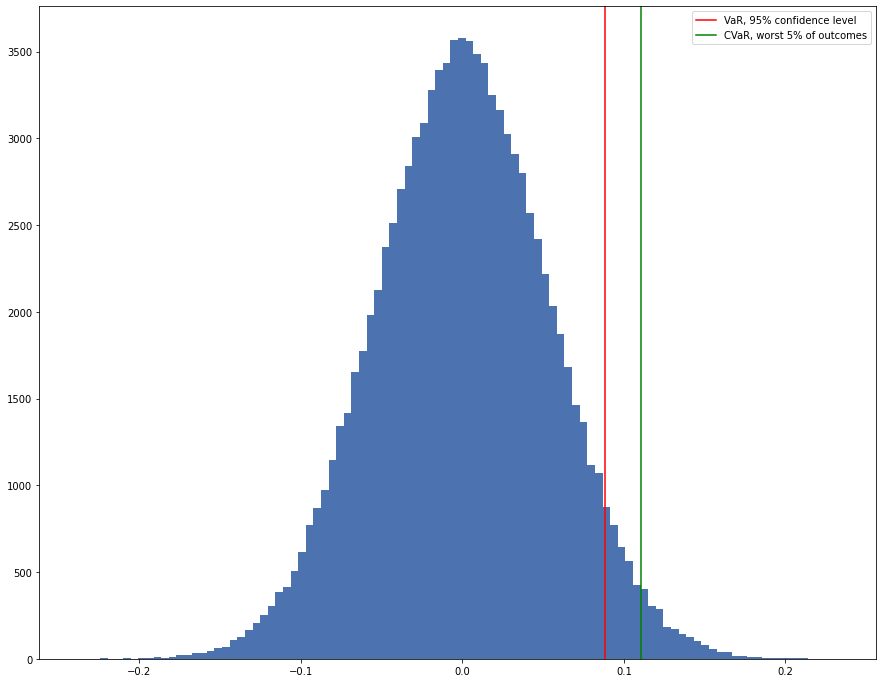

In [64]:
# Compute the mean and standard deviation of the portfolio losses
pm = portfolio_losses.mean()
ps = portfolio_losses.std()

# Compute the 95% VaR using the .ppf()
VaR_95 = norm.ppf(0.95, loc = pm, scale = ps)
# Compute the expected tail loss and the CVaR in the worst 5% of cases
tail_loss = norm.expect(lambda x: x, loc = pm, scale = ps, lb = VaR_95)
CVaR_95 = (1 / (1 - 0.95)) * tail_loss

# Plot the normal distribution histogram and add lines for the VaR and CVaR
plt.figure(figsize = (15,12))
plt.hist(norm.rvs(size = 100000, loc = pm, scale = ps), bins = 100)
plt.axvline(x = VaR_95, c='r', label = "VaR, 95% confidence level")
plt.axvline(x = CVaR_95, c='g', label = "CVaR, worst 5% of outcomes")
plt.legend(); plt.show()

***Bon travail! La CVaR est une mesure de risque plus riche que la VaR, mais peut être plus difficile à calculer lorsque la distribution des pertes (ou des rendements) est inconnue ou est plus compliquée qu'une distribution normale. Néanmoins, les deux mesures sont utilisées dans la gestion des risques pour identifier les « signes de danger » lorsque les pertes de portefeuille approchent le seuil de VaR ou de CVaR.***

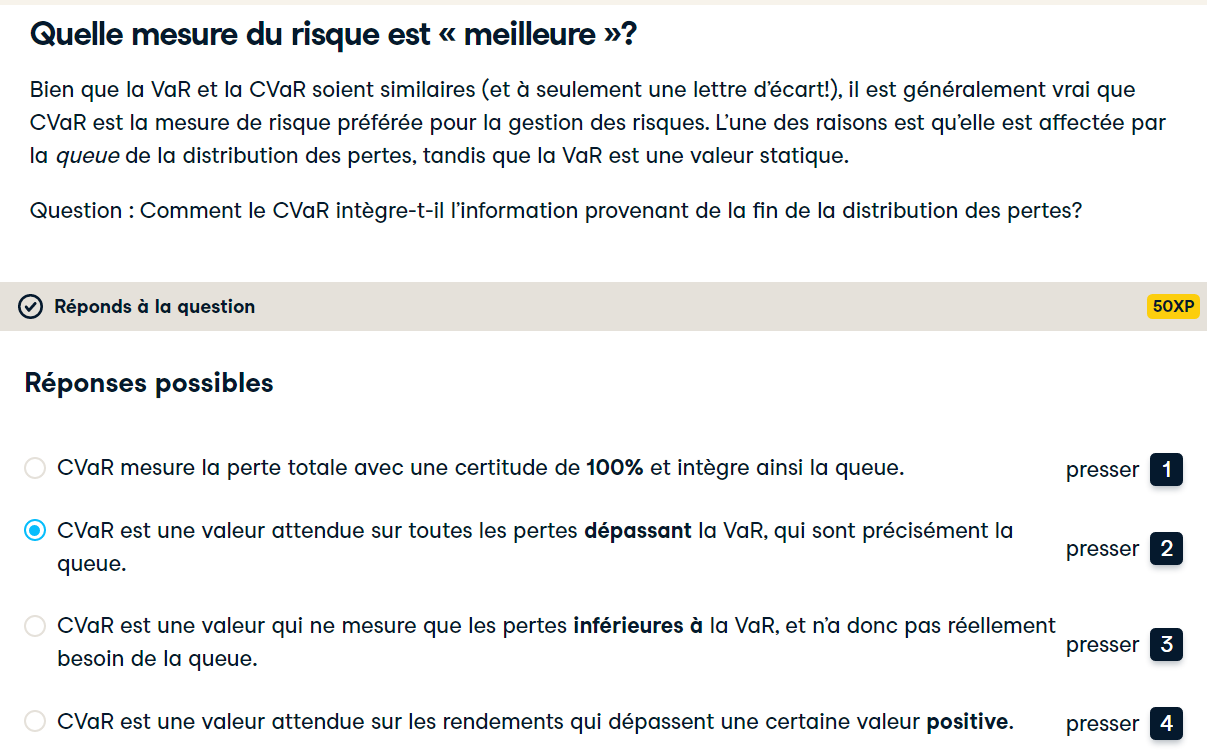

***Oui! La forme et la masse de la queue de la distribution contribuent à la valeur attendue, et donc le CVaR utilise bien les informations de queue. (Il faut aussi la VaR, donc c’est toujours une statistique importante!)***

###**Exposition au risque et perte**

####**1. Exposition au risque et perte**
+ Maintenant que nous avons vu comment mesurer le risque à l’aide de la VaR et du CVaR, nous pouvons les appliquer pour comprendre l’exposition au risque d’un portefeuille. 

+ Nous présenterons également une autre distribution statistique couramment utilisée pour vous aider!

####**2. Une analogie de vacances**

+ Disons que vous planifiez des vacances et que vous devez réserver votre hôtel.

+  L’hôtel vous offre deux options de paiement, celui où vous payez à l’avance à un taux inférieur, mais sans aucune chance de remboursement; et celui où vous payez un tarif plus élevé après l’arrivée, mais vous pouvez annuler la réservation et payer 20% du montant total à titre de frais.

####**3. Choisir entre les options**
+ La façon dont vous décidez entre les options de paiement dépend de quelques facteurs clés. 

+ Tout d’abord, il est possible que quelque chose perturbe vos vacances, comme une maladie, du mauvais temps ou d’autres « chocs » négatifs, vous obligeant à annuler votre voyage. 

+ C’est la probabilité de perte. Deuxièmement, il y a le montant que vous perdrez s’il y a une annulation, qui peut être un montant fixe (comme un investissement) ou une perte conditionnelle, comme la VaR ou le CVaR. 

+ Troisièmement, vous aurez votre propre idée du montant que vous paieriez pour éviter un choc négatif. 

+ C’est votre tolérance au risque.

####**4. Exposition au risque et VaR**

+ L’exposition au risque est le produit de la probabilité qu’un événement cause une perte, multipliée par le montant d’une perte si elle devait se produire. 

+ Le montant de la perte est souvent la VaR, car c’est le montant minimum « en danger » d’être perdu au niveau de confiance de la VaR. 

+ Supposons que la probabilité d’annuler vos vacances pour cause de maladie soit de 10%. Disons également que le coût de l’hôtel non remboursable est de 500 €. 

+ La VaR de 90% est le montant qui risque d’être perdu. Notez que le niveau de confiance de 90 % est dérivé de 100 % moins la probabilité réelle de perte dans notre exemple, qui est de 10 %. 

+ Ici, la VaR de 90% est de 500 €. Le coût de l’hôtel partiellement remboursable est de 550 €. Le montant de la VaR correspond aux frais d’annulation totalisant 110 €.

####**5. Calcul de l’exposition au risque**

+ Votre exposition au risque dans le cas non remboursable est de 10% de 500 €, soit 50 €. 

+ Dans le cas partiellement remboursable, votre exposition au risque est de 10% de 110 €, soit 11 €. La différence est de 50 € moins 11 €, soit 39 €. 

+ Comment choisissez-vous entre les deux options? 

+ La dernière variable est la différence de prix de l’hôtel, qui est de 550 € moins 500 €, soit 50 €. 

+ C’est plus que la différence d’exposition au risque, qui est de 39 €. 

+ Les deux options de l’hôtel vous interrogent donc sur votre tolérance au risque : 
  + vaut-il la peine de payer 50 € de plus pour éviter une plus grande exposition au risque de 39 € ?

####**6. Tolérance au risque et appétit pour le risque**


+ Vous êtes probablement neutre en matière de risque si vous préférez l’option non remboursable à l’option partiellement remboursable. 

+ Étant donné que la différence de 39 € est inférieure au paiement de 50 € pour éviter une plus grande exposition au risque, la neutralité du risque implique que vous choisirez l’option non remboursable. 

+ Vous êtes probablement peu enclin à prendre des risques si vous préférez l’option partiellement remboursable. Vous payez les 50 € pour éviter le risque de perdre 39 €, car l’incertitude coûte cher. 

+ Cette mesure du coût exprime la préférence pour le risque. La préférence pour le risque de l’entreprise est généralement appelée « appétit pour le risque », tandis que pour les investisseurs individuels, elle est souvent appelée « tolérance au risque ».

####**7. Distribution des pertes - discrète**


+ Comme nous l’avons vu, l’exposition au risque a besoin de la probabilité de perte pour être définie. 

+ Dans cet exemple simple, nous avons supposé que le risque était binaire : vous êtes parti ou non en vacances en raison d’une maladie.

####**8. Répartition des pertes - continue**

+ **En général, les pertes sont supposées prendre n’importe quelle valeur, ce qui conduit à une distribution continue des pertes. Jusqu’à présent, nous nous sommes concentrés sur la distribution normale parce qu’elle est généralement bonne pour les grands échantillons et qu’elle est facile à utiliser sur le plan informatique.**

####**9. Répartition des pertes - continue**
+ **Pour les petits échantillons, d’autres distributions peuvent être meilleures, telles que la distribution t de Student. Cette distribution est largement utilisée dans l’analyse de portefeuille.**

####**10. Introduction : Distribution t de l’élève**

+ **Aussi appelée distribution « T » majuscule, la distribution « t » de l’étudiant a des queues plus grosses que la distribution normale, ce qui se produit souvent avec les rendements et les pertes du portefeuille. À mesure que la taille de l’échantillon augmente, la distribution T converge vers la distribution normale.**

####**11. Distribution T en Python**

+ **Nous pouvons calculer des mesures telles que la VaR et la CVaR avec la distribution T, tout comme nous l’avons fait avec la distribution normale. Après avoir importé la distribution à partir de 'scipy stats', nous adaptons la distribution aux données.**

####**12. Distribution T en Python**
+ **Lorsque la distribution est ajustée, la fonction de point de pourcentage peut être utilisée pour calculer la VaR.**

####**13. Degrés de liberté**
+ **Une caractéristique particulière de la distribution T est son degré de liberté. Le nombre de degrés de liberté est le nombre d’observations indépendantes. Le nombre de degrés de liberté affecte la forme de la distribution T. Il peut être explicitement défini avec le paramètre 'df', ou estimé à l’aide de la méthode 'fit()' de la distribution 'scipy stats t'.**

####**14. Entraînons-nous!**
+ Dans les exercices suivants, vous travaillerez avec la distribution t de l’élève et en déduirez des mesures d’exposition au risque, en ajoutant une autre méthode couramment utilisée à votre boîte à outils.

###**EXERCICES**


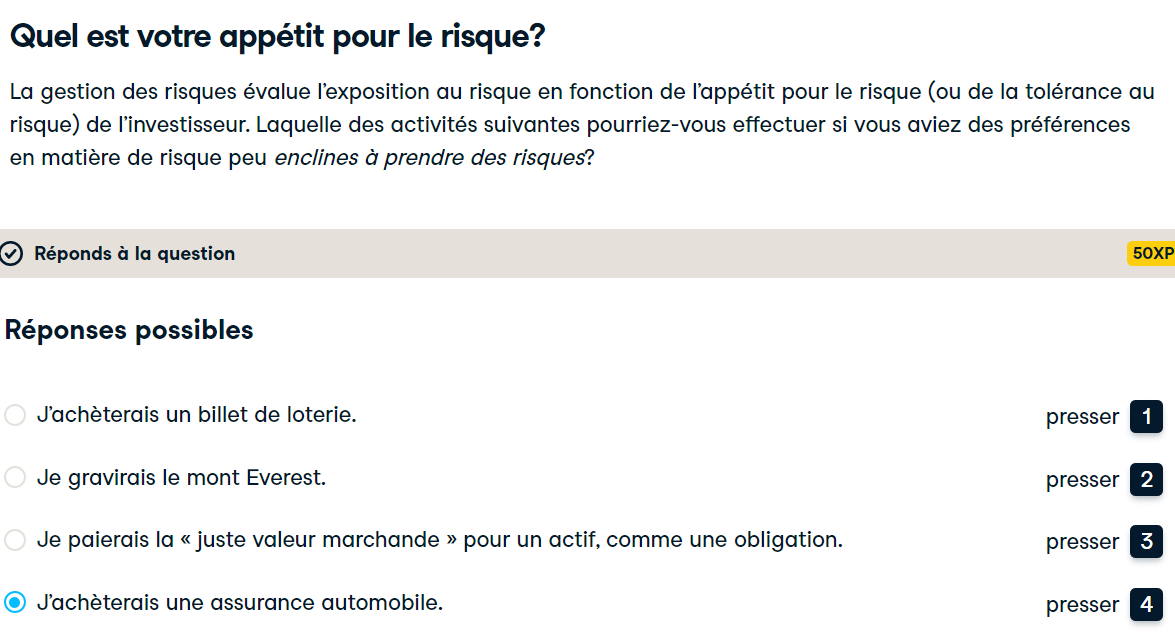**

***C’est bien ça! L’assurance est un moyen de payer une valeur fixe pour éviter un résultat incertain, qui est un comportement d’aversion au risque.***

####**VaR et exposition au risque**

+ ***Auparavant, vous calculiez la VaR et la CVaR lorsque les pertes étaient normalement distribuées. Vous trouverez ici la VaR en utilisant une autre distribution de perte courante, la distribution t de Student (ou T) contenue dans scipy.stats.***

+ **Vous allez calculer un tableau de mesures de VaR à 99 % à partir de la distribution T (avec 30 - 1 = 29 degrés de liberté), en utilisant des fenêtres glissantes de 30 jours à partir des pertes du portefeuille des banques d'investissement.**

+ ***Vous trouverez d'abord la moyenne et l'écart type de chaque fenêtre, en créant une liste de rolling_parameters. Vous les utiliserez pour calculer le tableau de mesures VaR à 99 %.***

+ *Ensuite, vous utiliserez ce tableau pour tracer l'exposition au risque d'un portefeuille d'une valeur initiale de 100 000 $. Rappelez-vous que l'exposition au risque est la probabilité de perte (c'est-à-dire 1 %) multipliée par le montant de la perte (c'est la perte donnée par la VaR à 99 %).*

####**Instructions**
+ Importez la distribution t de Student à partir de scipy.stats.
+ Calculez les vecteurs sigma moyens mu et écart type de la fenêtre de 30 jours à partir des pertes, et placez-les dans rolling_parameters.
+ Calculez un tableau Numpy de 99 % de mesures VaR VaR_99 à l'aide de t.ppf(), à partir d'une liste de distributions T utilisant les éléments de rolling_parameters.
+ Calculez et visualisez l'exposition au risque associée au tableau VaR_99.

In [65]:
losses = - portfolio_returns

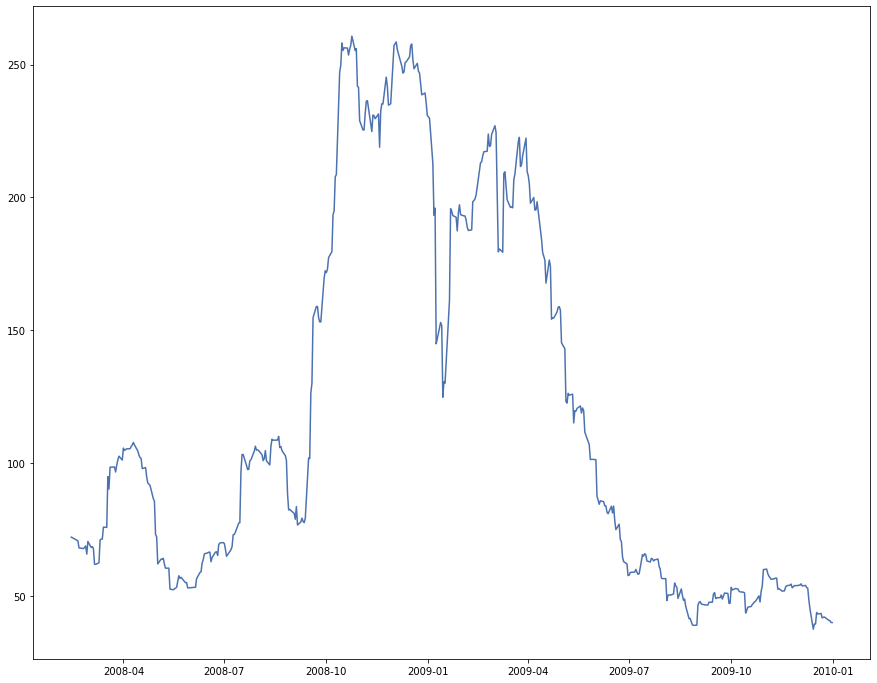

In [66]:
# Import the Student's t-distribution
from scipy.stats import t

# Create rolling window parameter list
mu = losses.rolling(30).mean()
sigma = losses.rolling(30).std()
rolling_parameters = [(29, mu[i], s) for i,s in enumerate(sigma)]

# Compute the 99% VaR array using the rolling window parameters
VaR_99 = np.array( [ t.ppf(0.99, *params) 
                    for params in rolling_parameters ] )

# Plot the minimum risk exposure over the 2005-2010 time period
plt.figure(figsize=(15,12))
plt.plot(losses.index, 0.01 * VaR_99 * 100000)
plt.show()

***Remarquable! Le niveau de confiance étant fixé à 99 %, nous avons maintenu la probabilité de perte à 1 %. Cela signifie que l'exposition au risque n'est qu'une mesure VaR rééchelonnée de la perte maximale du portefeuille 99 % du temps. Vous pouvez voir à quel point l'exposition au risque était plus importante au cœur de la crise en 2009.***

####**CVaR et exposition au risque**
+ Rappelons que la CVaR est la valeur attendue de la perte compte tenu d'un seuil de perte minimum. 

+ Ainsi, la CVaR est déjà sous la forme d'une exposition au risque - c'est la somme (ou l'intégrale) de la probabilité de perte dans la queue de distribution multipliée par le montant de la perte.

+ Pour dériver la CVaR de 99 %, vous allez d'abord ajuster une distribution T aux données de portefeuille de crises_pertes disponibles de 2008 à 2009, en utilisant la méthode t.fit(). Cela renvoie les paramètres de distribution T p utilisés pour trouver la VaR avec la méthode .ppf().

+ Ensuite, vous calculerez la VaR à 99 %, puisqu'elle est utilisée pour trouver la CVaR.

+ ***Enfin, vous calculerez la mesure CVaR à 99 % à l'aide de la méthode t.expect(), qui est la même que celle que vous avez utilisée pour calculer la CVaR pour la distribution normale dans un exercice précédent.***

+ *La distribution t de scipy.stats est également disponible.*

####**Instructions**
+ Trouvez les paramètres de distribution p en utilisant la méthode .fit() appliquée aux crises_losses.
+ Calculez la VaR_99 à l'aide des paramètres ajustés p et de la fonction du point de pourcentage de t.
+ Calculez CVaR_99 en utilisant la méthode t.expect() et les paramètres ajustés p, et affichez le résultat.

In [67]:
crisis_losses = ~np.isfinite(losses)

In [68]:
from scipy.stats import t
import numpy as np

In [69]:
# Fit the Student's t distribution to crisis losses
p = t.fit(crisis_losses)

In [70]:
# Compute the VaR_99 for the fitted distribution
VaR_99 = t.ppf(0.99, *p)

# Use the fitted parameters and VaR_99 to compute CVaR_99
tail_loss = t.expect( lambda y: y, args = (p[0],), loc = p[1], scale = p[2], lb = VaR_99 )
CVaR_99 = (1 / (1 - 0.99)) * tail_loss
print(CVaR_99)

1.5309756013373346e-20


***Super! La distribution t de Student est largement utilisée lorsque la distribution normale est trop restrictive pour les pertes de portefeuille, mais permet toujours la convergence vers la normale lorsque la taille de l'échantillon devient très grande.***

###**Gestion des risques à l’aide de la VaR et de la CVaR**


####**1. Gestion des risques à l’aide de la VaR et de la CVaR**

+ ***Maintenant que nous pouvons mesurer combien un portefeuille risque de perdre, nous pouvons atténuer ce risque de la même manière que le portefeuille efficace. Voyons comment cela fonctionne dans la pratique!***

####**2. Gestion des risques via la théorie moderne du portefeuille**


+ Dans le chapitre 1, nous avons présenté le portefeuille efficient, dérivé de la recherche de pondérations de portefeuille optimales qui maximisent le rendement attendu du portefeuille compte tenu d’un niveau de risque particulier. 

+ En effectuant cette procédure encore et encore pour différents niveaux de risque, nous avons créé la frontière efficace. 

+ Trouver le portefeuille efficace et la frontière a été effectué à l’aide de la théorie moderne du portefeuille, notre premier outil de gestion du risque de portefeuille.

####**3. Intégration de la valeur à risque dans le TPM**

+ **La théorie moderne du portefeuille est également appelée optimisation de portefeuille à variance moyenne parce qu’elle demande le rendement attendu le plus élevé, compte tenu de notre niveau de risque exprimé sous forme de varianc**e. 

+ **Le rendement attendu est la fonction objective du problème d’optimisation**. 

+ **En revanche, les mesures du risque VaR et CVaR portent sur le montant que nous prévoyons perdre et pas seulement sur un niveau de risque particulier**. 

+ **Nous pouvons adapter la théorie moderne du portefeuille pour optimiser les distributions de pertes.**

####**4. Un nouvel objectif : minimiser les CVaR**

+ Pour ce faire, nous modifions la fonction objective du problème d’optimisation : 
  + **c’est-à-dire qu’au lieu de rechercher les pondérations de portefeuille qui maximisent le rendement attendu du portefeuille, nous recherchons les pondérations de portefeuille qui minimisent la perte conditionnelle attendue à un certain niveau de confiance**. 
  + **En d’autres termes, nous minimisons le CVaR**. 
  
+ **Par exemple, en cas de perte de VaR avec un niveau de confiance de 95 %, nous optimiserions les pondérations du portefeuille pour trouver le CVaR minimisé, conditionnel à la VaR.** 

+ **C’est-à-dire que nous trouverions le portefeuille qui a la perte attendue la plus faible dans les pires résultats de 5%, c’est-à-dire au niveau de confiance de 95% VaR.**

####**5. Le problème de la gestion des risques**


+ Ce problème d’optimisation sélectionne les pondérations optimales du portefeuille 'w-star' pour minimiser le CVaR, étant donné un niveau de confiance 'alpha'. 

+ **Rappelez-vous qu’ici 'x' est la perte du portefeuille, et dépend des pondérations 'w'. La perte est le négatif des rendements, et sa distribution 'f(x)' est calculée à partir d’une estimation numérique (nous verrons comment le faire au chapitre 3)**. 

+ **Comme toujours, les pondérations du portefeuille doivent se résumer à un. Nous pouvons utiliser PyPortfolioOpt pour effectuer cette minimisation en sélectionnant CVaR comme nouvelle fonction d’objectif**.

####**6. Minimisation des CVaR à l’aide de PyPortfolioOpt**


+ Pour minimiser le CVaR, nous créons d’abord un objet 'EfficientCVaR'. 

+ Nous ne répercutons que les rendements des actifs, car nous ne maximiserons pas le rendement attendu. 

+ Ensuite, nous utilisons la méthode 'min_cvar()' d’EfficientCVaR pour trouver le portefeuille CVaR minimisé.

####**7. Gestion de la variance moyenne par rapport à la gestion des risques CVaR**

+ Nous pouvons comparer le portefeuille CVaR minimum à la solution de variance moyenne de volatilité minimale pour le portefeuille de banques d’investissement 2005 - 2010. 

+ Nous calculons les pondérations minimales de volatilité du portefeuille de la manière habituelle, en créant une instance EfficientFrontier et en utilisant la méthode de la « volatilité minimale ». 

+ Comme nous le voyons, le portefeuille à variance minimale conseille de ne détenir que Goldman Sachs et JP Morgan, afin de minimiser la volatilité sur la période.

####**8. Gestion de la variance moyenne par rapport à la gestion des risques CVaR**


+ **En revanche, le portefeuille minimisant le CVaR est créé à l’aide de l’objet 'EfficientCVaR' et de sa méthode 'min_cvar()', comme décrit précédemment**. 

+ **Le résultat est un portefeuille lourd en Goldman Sachs et J P Morgan**. 

+ Cela crée plus de volatilité que le portefeuille de variance moyenne de volatilité minimale, mais avec l’avantage que les pires cas de perte de 5% sont minimisés.

####**9. Entraînons-nous!**
+ La gestion des risques à l’aide de la minimisation de la valeur conditionnelle à risque est une étape importante. 

+ Maintenant, vous pouvez appliquer cette technique à la crise financière mondiale!

###**EXERCICES**

####**VaR d'une distribution ajustée**

+ ***Minimiser la CVaR nécessite de calculer la VaR à un niveau de confiance, disons 95 %. Auparavant, vous dériviez la VaR sous forme de quantile à partir d'une distribution normale (ou gaussienne), mais la minimisation de la CVaR nécessite plus généralement de calculer le quantile à partir d'une distribution qui correspond le mieux aux données.***

+ **Dans cet exercice, une distribution ajustée des pertes est fournie, qui correspond aux pertes d'un portefeuille de banque d'investissement équipondéré de 2005 à 2010. Vous allez d'abord tracer cette distribution en utilisant sa méthode .evaluate() (les distributions ajustées seront traitées plus en détail au chapitre 4).**

+ **Ensuite, vous utiliserez la méthode .resample() de l'objet ajusté pour tirer un échantillon aléatoire de 100 000 observations à partir de la distribution ajustée.**

+ *Enfin, l'utilisation de np.quantile() sur l'échantillon aléatoire calculera alors la VaR à 95 %.*

####**Instructions**

+ Tracez la distribution ajustée des pertes. Remarquez comment la distribution ajustée est différente d'une distribution normale.
+ Créez un échantillon de 100 000 points de tirages aléatoires à partir de la distribution ajustée à l'aide de la méthode ajustée .resample().
+ Utilisez np.quantile() pour trouver la VaR à 95 % à partir de l'échantillon aléatoire et affichez le résultat.

In [61]:
from scipy.stats import t

In [ ]:
# Visualize the fitted distribution with a plot
x = np.linspace(-0.25,0.25,1000)
plt.plot(x,fitted.evaluate(x))
plt.show()

In [ ]:
# Create a random sample of 100,000 observations from the fitted distribution
sample = fitted.resample(100000)

# Compute and display the 95% VaR from the random sample
VaR_95 = np.quantile(sample, 0.95)
print(VaR_95)

####**Minimiser la CVaR**
+ ***Cet exercice vous permettra de vous entraîner avec les outils de PyPortfolioOpt pour la minimisation de la CVaR en tant qu'objectif de gestion des risques.***

+ **Vous allez charger le module pypfopt.efficient_frontier et récupérer la classe EfficientCVaR, en créant une instance de la classe en utilisant les actifs de la banque d'investissement sur la période 2005 - 2010.**

+ ***Vous utiliserez ensuite la méthode min_cvar() de l'instance pour trouver les pondérations de portefeuille optimales qui minimisent la CVaR.***

+ *Les rendements des actifs du portefeuille sont dans le vecteur des rendements - cet exercice utilise également un dictionnaire de noms pour mapper les pondérations du portefeuille aux noms des banques.*

####**Instructions**

+ Importez la classe EfficientCVaR à partir de pypfopt.efficient_frontier.
+ Créez l'instance de classe EfficientCVaR ec à l'aide de retours ; notez que vous n'avez pas besoin de expect_returns, car la fonction objectif est différente de l'optimisation moyenne-variance.
+ Trouvez et affichez le portefeuille optimal à l'aide de la méthode .min_cvar() d'ec.

In [71]:
# Select portfolio asset prices for the middle of the crisis, 2005-2010
returns = asset_returns.dropna()

In [72]:
# Import the EfficientCVaR class
from pypfopt.efficient_frontier import EfficientCVaR

# Create the efficient frontier for CVaR minimization
ec = EfficientCVaR(None, returns)

# Find the cVaR-minimizing portfolio weights at the default 95% confidence level
optimal_weights = ec.min_cvar()

In [73]:
names = {0: 'Citibank', 1: 'Morgan Stanley', 2: 'Goldman Sachs', 3: 'J.P. Morgan'}

In [74]:
# Map the values in optimal_weights to the bank names
optimal_weights = { names[i] : optimal_weights[i] for i in optimal_weights}

# Display the optimal weights
print(optimal_weights)

{'Citibank': 1.29e-14, 'Morgan Stanley': 0.7723180578766197, 'Goldman Sachs': 0.2276819421233646, 'J.P. Morgan': 3.3e-15}


***Super! Le portefeuille minimisant la CVaR sur la période 2005-2010 est essentiellement pondéré pour Goldman Sachs et J.P. Morgan. Dans ce qui suit, nous verrons si cette conclusion reste valable pour les périodes avant, pendant et après la crise.***

####**La gestion du risque CVaR et la crise**

+ ***Dans cet exercice, vous dériverez le portefeuille minimisant la CVaR à 95 % pour 2005-2006, 2007-2008 et 2009-2010. Ce sont les périodes (ou « époques ») avant, pendant et après la crise.***

+ **Pour vous aider, les retours d'actifs dans return_dict sont disponibles sous forme de dictionnaire Python, avec les clés d'époque « avant », « pendant » et « après ».**

+ ***Les portefeuilles à volatilité minimale sont également enregistrés dans un dictionnaire appelé min_vol_dict, avec les mêmes clés - assurez-vous de les vérifier dans la console.***

+ *Après avoir dérivé les portefeuilles minimisant la CVaR de chaque époque, vous les comparerez aux portefeuilles min_vol_dict. Cela montrera comment la gestion active des risques contre les pertes conditionnelles modifie les pondérations du portefeuille.*

+ *La classe EfficientCVaR est disponible.*

####**Instructions**
+ Tout d'abord, initialisez un dictionnaire Python de portefeuille efficace ec_dict. Attribuez ensuite, pour chaque clé d'époque mentionnée ci-dessus, un objet EfficientCVaR à ec_dict, en utilisant le dictionnaire de retours_dict disponible des matrices de retour.

+ Calculez maintenant l'opt_wts_dict minimisant la CVaR au niveau de confiance par défaut de 95 % pour chaque époque, et comparez-le aux portefeuilles min_vol_dict.

In [75]:
# Create a dictionary of time periods (or 'epochs')
epochs = { 'before' : {'start': '1-1-2005', 'end': '31-12-2006'},
           'during' : {'start': '1-1-2007', 'end': '31-12-2008'},
           'after'  : {'start': '1-1-2009', 'end': '31-12-2010'}
         }

# Compute the efficient covariance for each epoch
returns_dict = {}
for x in epochs.keys():
  sub_price = prices.loc[epochs[x]['start']:epochs[x]['end']]
  returns_dict[x] = CovarianceShrinkage(sub_price).ledoit_wolf()

# Display the efficient covariance matrices for all epochs
display("Efficient Covariance Matrices\n", returns_dict)

'Efficient Covariance Matrices\n'

{'before':                 Citibank  Goldman Sachs  J.P. Morgan  Morgan Stanley
 Citibank            0.02           0.01         0.01            0.01
 Goldman Sachs       0.01           0.04         0.02            0.03
 J.P. Morgan         0.01           0.02         0.02            0.02
 Morgan Stanley      0.01           0.03         0.02            0.04,
 'during':                 Citibank  Goldman Sachs  J.P. Morgan  Morgan Stanley
 Citibank            0.71           0.32         0.37            0.47
 Goldman Sachs       0.32           0.41         0.22            0.44
 J.P. Morgan         0.37           0.22         0.42            0.30
 Morgan Stanley      0.47           0.44         0.30            0.98,
 'after':                 Citibank  Goldman Sachs  J.P. Morgan  Morgan Stanley
 Citibank            0.84           0.25         0.36            0.35
 Goldman Sachs       0.25           0.25         0.22            0.23
 J.P. Morgan         0.36           0.22         0.38      

In [76]:
# Initialize the efficient portfolio dictionary
ec_dict = {}

# For each epoch, assign an efficient frontier cvar instance to ec
for x in ['before', 'during', 'after']: 
    ec_dict[x] = EfficientCVaR(None, returns_dict[x])

In [77]:
# Initialize the dictionary of optimal weights
opt_wts_dict = {}
names = {0: 'Citibank', 1: 'Morgan Stanley', 2: 'Goldman Sachs', 3: 'J.P. Morgan'}
# Find and display the CVaR-minimizing portfolio weights at the default 95% confidence level
for x in ['before', 'during', 'after']:
    opt_wts_dict[x] = ec_dict[x].min_cvar()
    # map bank names to optimal weights
    opt_wts_dict[x] = {names[i] : opt_wts_dict[x][i] for i in opt_wts_dict[x]}

In [78]:
# Compare the CVaR-minimizing weights to the minimum volatility weights for the 'before' epoch
print("CVaR:\n", pd.DataFrame.from_dict(opt_wts_dict), "\n")

CVaR:
                 before  during  after
Citibank          0.67    0.77   1.00
Morgan Stanley    0.04    0.00   0.00
Goldman Sachs     0.24    0.00   0.00
J.P. Morgan       0.05    0.23   0.00 



In [79]:
min_vol_dict = {'before': {'Citibank': 0.657653371196737,
  'Morgan Stanley': 0.0480059867221236,
  'Goldman Sachs': 0.0403774713630865,
  'J.P. Morgan': 0.253963170718053},
 'during': {'Citibank': 0.0,
  'Morgan Stanley': 0.0,
  'Goldman Sachs': 0.5179899476599342,
  'J.P. Morgan': 0.4820100523400658},
 'after': {'Citibank': 0.0,
  'Morgan Stanley': 0.0343318420598168,
  'Goldman Sachs': 0.8630043657391508,
  'J.P. Morgan': 0.1026637922010324}}

In [80]:
print("Min Vol:\n", pd.DataFrame.from_dict(min_vol_dict), "\n")

Min Vol:
                 before  during  after
Citibank          0.66    0.00   0.00
Morgan Stanley    0.05    0.00   0.03
Goldman Sachs     0.04    0.52   0.86
J.P. Morgan       0.25    0.48   0.10 



####**Question**
+ ***Comparez le portefeuille opt_wts_dict minimisant la CVaR avec le portefeuille de variance minimale min_vol_dict pour chaque époque (rappelez-vous que chaque variable est un dictionnaire). Quel actif serait détenu à la fois dans le portefeuille minimisant la CVaR et dans le portefeuille à variance minimale pour chaque époque de la crise ?***

####**Des réponses possibles**

+ Citibank

+ Morgan Stanley

+ ***Goldman Sachs***

+ JP Morgan

***Correct! Goldman Sachs est détenu dans les portefeuilles à variance minimale et à minimisation de la CVaR pour toutes les époques de la crise.***

###**Couverture de portefeuille : compenser le risque**


####**1. Couverture de portefeuille : compenser le risque**

+ ***La mesure des risques à l’aide de la VaR et de la CVaR fait partie de la gestion des risques. Une autre partie consiste à utiliser des outils financiers pour compenser ou atténuer les risques. Nous examinerons l’un de ces outils, la couverture, dans cette vidéo.***

####**2. Stabilité du portefeuille**
+ **Une mesure du risque telle que la VaR ou le CVaR indique les pertes potentielles du portefeuille**. 

+ **Ces pertes peuvent encore se produire même après l’optimisation du portefeuille, en raison de la volatilité des facteurs de risque du portefeuille**. 

+ **Pour les grands investisseurs institutionnels, comme les caisses de retraite, la stabilité du portefeuille est une exigence clé, car les rendements du portefeuille paient le revenu des personnes qui ont pris leur retraite. Les fonds de pension américains détiennent environ 20 <> milliards de dollars, soit à peu près le montant de la production américaine en un an.**

####**3. Jours de pluie, jours ensoleillés**

+ Supposons que vous ayez investi dans les actions d’une entreprise qui vend des lunettes de soleil à des centres de villégiature du monde entier. 
+ Un facteur de risque pour le rendement des actions pourrait être la météo.

####**4. Jours de pluie, jours ensoleillés**
+ En particulier, lorsqu’il pleut, supposons que l’entreprise ait moins de valeur. 

+ Le prix de l’action baisse, et donc la valeur du portefeuille chute quand il pleut.

####**5. Jours de pluie, jours ensoleillés**
+ Ensuite, vous remarquez qu’une autre entreprise, celle qui fabrique des parapluies, a plus de valeur quand il pleut.

####**6. Jours de pluie, jours ensoleillés**
+ Investir dans cette entreprise pourrait réduire le risque pour votre investissement initial. 

+ Le risque de temps pluvieux serait atténué et l’impact global de la pluie sur le rendement de votre portefeuille serait réduit. 

+ La volatilité de la pluie en tant que facteur de risque pour les lunettes de soleil, en d’autres termes, est compensée par l’investissement dans les parapluies.

####**7. Couverture**
+ **L’utilisation d’un ou de plusieurs actifs pour compenser une position risquée est appelée couverture.** 

+ **La couverture est l’une des techniques les plus importantes pour les investisseurs institutionnels en matière de gestion des risques.** 

+ **En couvrant un portefeuille, un investisseur trouve un autre flux de rendement qui va dans la direction opposée au facteur de risque du portefeuille.** 

+ **Les portefeuilles de couverture sont utilisés dans les fonds de pension susmentionnés, mais aussi dans le trading de devises, le trading de contrats à terme et de produits dérivés et les fonds communs de placement. En 2019, le marché des hedge funds valait environ 3 virgule 6 billions de dollars.**

####**8. Instruments de couverture: options**

+ **La couverture est souvent effectuée à l’aide de produits dérivés pour compenser une position d’actif risquée**. 

+ **L’un des dérivés les plus fondamentaux est l’option européenne. Une option d’achat européenne donne à son détenteur le droit (mais non l’obligation) d’acheter une action à un prix fixe $X$ à un moment donné M**. 

+ Une option de vente européenne donne à son détenteur le droit (mais pas l’obligation) de vendre une action à un prix fixe $X$ à un moment donné $M$. 

+ **L’action est appelée le « sous-jacent » de l’option. Le prix de marché du sous-jacent est appelé le prix « spot » « $S$ ». Le prix fixe est appelé le prix d’exercice «$X$ » et le temps « $M$ » est l'«échéance ».**

####**9. Prix des options Black-Scholes**

+ **La valeur d’une option change lorsque le prix de l’actif sous-jacent change**. 

+ **Si ce changement va à l’encontre du changement de prix, alors un portefeuille avec l’actif peut être couvert**. 

+ Mais comment valoriser une option ? De nombreux facteurs, tels que l’efficacité du marché, l’action sous-jacente et le taux d’intérêt sans risque, jouent tous un rôle.

+ **Le moyen le plus populaire est peut-être la formule de tarification des options Black-Scholes, tirée des travaux fondateurs de Fisher Black et Myron Scholes en 1973**. 

+ **Pour calculer le prix de l’option Black-Scholes à un instant $t$ donné, le prix au comptant, le prix d’exercice, le délai jusqu’à l’échéance, le taux d’intérêt sans risque et la volatilité sont tous nécessaires.**

      Black, F. et M. Scholes (1973). « The Pricing of Options and Corporate Liabilities », Journal of Political Economy vol 81 no. 3, pp. 637-654. {{3}}


####**10. Hypothèses de la formule de Black-Scholes**

+ **La formule de tarification des options Black-Scholes repose sur plusieurs hypothèses sur le fonctionnement des marchés et sur l’évolution du cours des actions sous-jacentes**. 

+ **Bien que nous n’entrerons pas dans les détails mathématiques, il est important de savoir que la formule de tarification suppose que les marchés fonctionnent bien, que le cours de l’action suit une distribution statistique particulière et qu’il existe des opportunités d’investissement sûres (telles que les dépôts bancaires)***. 

+ **Vous pouvez obtenir plus d’informations sur la formule de tarification des options Black-Scholes en essayant une calculatrice en ligne ou en examinant le code source de la fonction 'black_scholes' (qui est liée dans les exercices).**

####**11. Calcul de la valeur de l’option Black-Scholes**

+ **our calculer la valeur des options, une fonction pré-générée 'black_scholes' est disponible**. 

+ **Tout d’abord, fixez les prix au comptant et d’exercice requis, le délai jusqu’à l’échéance (en fractions d’année), le taux d’intérêt sans risque, la volatilité et le type d’option. La formule de tarification donnera alors la valeur de l’option.**

####**12. Couverture d’une position boursière avec une option**

+ ***Un portefeuille composé d’une seule action peut être couvert en détenant une option de vente européenne avec la même action sous-jacente. La valeur d’une option de vente augmente lorsque le prix d’une action baisse. En effet, le détenteur de l’option peut vendre au prix d’exercice au lieu de subir la baisse du prix. La modification de la valeur de l’option est appelée « delta » de l’option. C’est la dérivée de la valeur de l’option V par rapport au prix au comptant S. En détenant un montant de l’option égal à un sur le delta, les variations du prix de l’action sous-jacente peuvent être compensées. La neutralité delta se produit lorsque la variation totale de la valeur du portefeuille à partir d’une variation du prix de l’actif du portefeuille est nulle. La fonction 'bs_delta' est utilisée pour calculer le delta et il y a un lien vers celui-ci dans les exercices.***

####**13. Entraînons-nous!**
+ **Dans les exercices qui suivent, vous vous entraînerez à utiliser la formule de tarification des options Black-Scholes et à créer un portefeuille couvert neutre en delta contenant des actions IBM. Bonne chance!**



####**Tarification des options Black-Scholes**
+ ***Les options sont les dérivés les plus largement utilisés dans le monde pour aider à gérer le risque de prix des actifs. Dans cet exercice, vous évaluerez une option d'achat européenne sur les actions d'IBM à l'aide de la formule d'évaluation des options Black-Scholes. Les données IBM_returns ont été chargées dans votre espace de travail.***

+ **Vous allez d'abord calculer le sigma de volatilité d'IBM_returns, en tant qu'écart type annualisé.**

+ *Ensuite, vous utiliserez la fonction black_scholes(), créée pour cet exercice et les suivants, pour évaluer les options pour deux niveaux de volatilité différents : sigma et deux fois sigma.*

+ ***Le prix d'exercice K, c'est-à-dire le prix qu'un investisseur a le droit (mais pas l'obligation) d'acheter IBM, est de 80. Le taux d'intérêt sans risque r est de 2 % et le prix du marché au comptant S est de 90.***

+*Vous pouvez trouver le code source de la fonction black_scholes() ici.*

####**Instructions**

+ Calculez la volatilité d'IBM_returns comme sigma de l'écart type annualisé (vous avez annualisé la volatilité au chapitre 1).
+ Calculez la valeur du prix de l'option d'achat européenne Black-Scholes à l'aide de la fonction black_scholes() fournie, lorsque la volatilité est sigma.
+ Trouvez ensuite la valeur du prix de l'option Black-Scholes lorsque la volatilité est plutôt de 2 * sigma.
+ Affichez value_s et value_2s pour examiner comment le prix de l'option change avec une augmentation de la volatilité.

In [81]:
# The Black-Scholes option pricing formula for European options
# Adapted from: Black, F., & Scholes, M. (1973). 
#The Pricing of Options and Corporate Liabilities. 
#Journal of Political Economy, 81(3), 637-654, www.jstor.org/stable/1831029.
# MIT License
# Copyright (c) 2019 Jamsheed Shorish

# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this file "black_scholes.py" (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:
# 
# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.
# 
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.

import numpy as np
from scipy.stats import norm


# Auxiliary function for d_one risk-adjusted probability
def d11(S, X, T, r, sigma):
    """This is an auxiliary function and is not intended to be called externally."""
    return (np.log(S/X) + (r + 0.5 * sigma**2)*T) / (sigma * np.sqrt(T))

# Auxiliary function for d_two risk-adjusted probability    
def d21(d1, T, sigma):
    """This is an auxiliary function and is not intended to be called externally."""
    return d1 - sigma * np.sqrt(T)

# Definition of the Black-Scholes delta function    
def bs_delta(S, X, T, r, sigma, option_type):
    """Compute the delta of the Black-Scholes option pricing formula.
    
    Arguments:
    S           -- the current spot price of the underlying stock
    X           -- the option strike price
    T           -- the time until maturity (in fractions of a year)
    r           -- the risk-free interest rate 
    sigma       -- the returns volatility of the underlying stock
    option_type -- the option type, either 'call' or 'put'
    
    Returns: a numpy.float_ representing the delta value
    Exceptions raised: ValueError if option_type is not 'call' or 'put'
    """
    if option_type == 'call':
        return norm.cdf(d11(S, X, T, r, sigma))
    elif option_type == 'put':
        return norm.cdf(-d11(S, X, T, r, sigma))
    else:
        # Raise an error if the option_type is neither a call nor a put
        raise ValueError("Option type is either 'call' or 'put'.")

# Definition of the Black-Scholes European option pricing formula    
def black_scholes(S, X, T, r, sigma, option_type):
    """Price a European option using the Black-Scholes option pricing formula.
    
    Arguments:
    S           -- the current spot price of the underlying stock
    X           -- the option strike price
    T           -- the time until maturity (in fractions of a year)
    r           -- the risk-free interest rate 
    sigma       -- the returns volatility of the underlying stock
    option_type -- the option type, either 'call' or 'put'
    
    Returns: a numpy.float_ representing the option value
    Exceptions raised: ValueError if option_type is not 'call' or 'put'
    """
    d_one = d11(S, X, T, r, sigma)
    d_two = d21(d_one, T, sigma)
    if option_type == 'call':
        return S * norm.cdf(d_one) - np.exp(-r * T) * X * norm.cdf(d_two)
    elif option_type == 'put':
        return -(S * norm.cdf(-d_one) - np.exp(-r * T) * X * norm.cdf(-d_two))
    else:
        # Raise an error if the option_type is neither a call nor a put
        raise ValueError("Option type is either 'call' or 'put'.")

In [82]:
import yfinance as yf
     

tickers = ["IBM"]
     

ohlc = yf.download(tickers, period="max")
IBM = ohlc["Close"]
IBM.tail()

[*********************100%***********************]  1 of 1 completed


Date
2023-02-27   130.49
2023-02-28   129.30
2023-03-01   128.19
2023-03-02   128.93
2023-03-03   129.22
Name: Close, dtype: float64

In [83]:
IBM_returns = IBM.pct_change().dropna()

In [84]:
# Compute the volatility as the annualized standard deviation of IBM returns
sigma = np.sqrt(252) * IBM_returns.std()

# Compute the Black-Scholes option price for this volatility
value_s = black_scholes(S = 90, X = 80, T = 0.5, r = 0.02, 
                        sigma = sigma, option_type = "call")

# Compute the Black-Scholes option price for twice the volatility
value_2s = black_scholes(S = 90, X = 80, T = 0.5, r = 0.02, 
                         sigma = 2 * sigma, option_type = "call")

# Display and compare both values
print("Option value for sigma: ", value_s, "\n", 
      "Option value for 2 * sigma: ", value_2s)

Option value for sigma:  12.895885008833787 
 Option value for 2 * sigma:  18.15454090677259


***Bon travail. Comme indiqué, la valeur de l'option d'achat _augmente_ avec une augmentation de la volatilité ! En effet, une option ne doit être exercée que lorsqu'elle est rentable, ce qui signifie qu'une plus grande volatilité augmente les chances de profit. Dans le prochain exercice, vous examinerez comment la rentabilité d'une option change avec le prix de l'action sous-jacente au fil du temps.***

In [85]:
# Select the first 100 observations of IBM data
IBM_spot = IBM[:100]

# Initialize the European put option values array
option_values = np.zeros(IBM_spot.size)

# Iterate through IBM's spot price and compute the option values
for i,S in enumerate(IBM_spot.values):
    option_values[i] = black_scholes(S = S, X = 140, T = 0.5, r = 0.02,
                        sigma = sigma, option_type = "put")

<Figure size 1080x864 with 0 Axes>

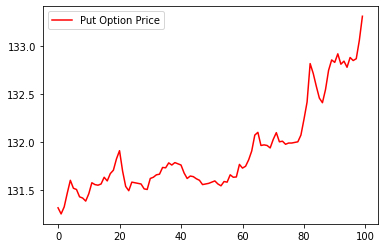

In [86]:
# Display the option values array
plt.figure(figsize= (15,12))
fig, ax = plt.subplots()
ax.plot(option_values, color = "red", label = "Put Option Price")
plt.legend(loc = "upper left")
plt.show()

***Exactement! Comme vous pouvez le voir, la valeur de l'option augmente chaque fois que le prix d'IBM baisse (et vice-versa). Cela montre qu'une option est un bon candidat pour couvrir les variations du cours de l'action IBM.***

####**Utilisation des options de couverture**
+ ***Supposons que vous ayez un portefeuille d'investissement avec un actif, IBM. Vous couvrirez le risque du portefeuille en utilisant une couverture delta avec une option de vente européenne sur IBM.***

+ **Tout d'abord, évaluez l'option de vente européenne à l'aide de la formule de tarification des options Black-Scholes, avec un prix d'exercice $X$ de 80 et une échéance $T$ de 1/2 par an. Le taux d'intérêt sans risque est de 2% et le spot S est initialement de 70.**

+ *Créez ensuite une couverture delta en calculant le delta de l'option avec la fonction bs_delta() et utilisez-la pour vous protéger contre une variation du cours de l'action à 69,5. Le résultat est un portefeuille delta neutre à la fois de l'option et de l'action.*

+ ***Les deux fonctions black_scholes() et bs_delta() sont disponibles dans votre espace de travail.***

+ *Vous pouvez trouver le code source des fonctions black_scholes() et bs_delta() ici.*

####**Instructions**

+ Calculer le prix d'une option de vente européenne au prix spot 70.
+ Trouvez le delta de l'option à l'aide de la fonction bs_delta() fournie au prix au comptant 70.
+ Calculez le value_change de l'option lorsque le prix au comptant tombe à 69,5.
+ Montrez que la somme de la variation du prix au comptant et de la variation de valeur pondérée par 1/delta est (proche de) zéro.

In [87]:
# Compute the annualized standard deviation of `IBM` returns
sigma = np.sqrt(252) * IBM_returns.std()

# Compute the Black-Scholes value at IBM spot price 70
value = black_scholes(S = 70, X = 80, T = 0.5, r = 0.02, 
                      sigma = sigma, option_type = "put")
# Find the delta of the option at IBM spot price 70
delta = bs_delta(S = 70, X = 80, T = 0.5, r = 0.02, 
                 sigma = sigma, option_type = "put")

# Find the option value change when the price of IBM falls to 69.5
value_change = black_scholes(S = 69.5, X = 80, T = 0.5, r = 0.02, 
                             sigma = sigma, option_type = "put") - value

print( (69.5 - 70) + (1/delta) * value_change )

0.004551924607734903


***Excellent! La variation de prix d'IBM a été compensée à l'aide de l'option delta. Vous avez couvert le risque comme le font les gestionnaires de risques institutionnels, c'est-à-dire la façon dont les caisses de retraite conservent leur valeur. Des trucs importants !***

###**Estimation paramétrique**

####**1. Estimation paramétrique**

+ ***Nous pouvons maintenant gérer le risque de portefeuille à l’aide des mesures de risque VaR et CVaR et de la théorie moderne du portefeuille. Ensuite, nous apprendrons comment estimer les mesures de risque en ajustant les distributions aux données.***

####**2. Une catégorie de distributions**

+ **En général, nous ne connaissons pas la forme exacte de la répartition des pertes possibles.** 

+ **Mais nous pouvons trouver pratique de travailler avec une classe de distributions qui décrit le mieux la distribution des pertes**. 

+ **Chaque membre d’une classe est fonction de la perte '$x$' et possède un ensemble de paramètres, que nous appelons '$\theta$'.** 

+ **Par exemple, une distribution normale est une classe de distributions, chacune avec une moyenne et un écart-type différents. Ce sont les paramètres de la distribution.** 

+ **Trouver les « meilleures » valeurs de paramètres en fonction des données du portefeuille est appelé estimation paramétrique. Une fois que les valeurs optimales du paramètre 'thêta étoile' sont trouvées, la distribution des pertes peut être décrite dans la classe de distributions.**

####**3. Montage d’une distribution**

+ Ce type d’ajustement implique généralement d’essayer de plier la forme de la classe afin qu’elle minimise une certaine mesure de l’erreur. 

+ Par exemple, la méthode 'fit()' de la distribution normale de Scipy le fait en sélectionnant la meilleure moyenne et le meilleur écart-type pour la minimisation des erreurs. 

+ Cela permet de comparer visuellement la distribution ajustée et un histogramme des données. Cela nous permet également d’utiliser l’inférence statistique pour mesurer la qualité de l’ajustement.

####**4. Qualité de l’ajustement**
+ Considérez cet histogramme des pertes de portefeuille. Nous aimerions voir comment différentes estimations paramétriques correspondent à ces données. 
+ Il s’agit d’un test de visualisation de la « qualité de l’ajustement », utilisant l’histogramme comme représentation « de référence ».

####**5. Qualité de l’ajustement**
+ Nous pouvons utiliser la bibliothèque Python 'scipy stats' pour créer un objet de distribution normale, 'norm', puis ajuster les données avec la méthode 'fit()'. 

+ Dans notre exemple, nous voyons que bien que la moyenne des données semble être estimée de près, la forme globale de la distribution normale est trop « large » et pas assez « haute ».

####**6. Qualité de l’ajustement**
+ Essayons maintenant la distribution $t$ de l’étudiant. Comme vous pouvez le voir, la distribution $t$ correspond mieux aux données, étant à la fois « plus grande » et « plus étroite ». 

+ Cela signifie que les degrés de liberté de la distribution $T$, qui est le nombre d’observations indépendantes, sont estimés faibles. 

+ Bien que la distribution $T$ offre un bon ajustement, les données ne sont toujours pas tout à fait correctes. 

+ En particulier, l’histogramme n’est pas symétrique : il est un peu déséquilibré. Nous y reviendrons dans un instant.

####**7. Test d’Anderson-Darling**
+ Parfois, une visualisation donnera l’impression qu’une distribution est un bon ajustement. 

+ Comment pouvons-nous rendre cela précis? 

+ Le test d’Anderson-Darling est utilisé pour voir dans quelle mesure une distribution s’adapte aux données. 

+ L’hypothèse nulle est que les données sont distribuées normalement. 

+ Ceci est rejeté si la statistique de test revient plus grande qu’une ou plusieurs valeurs critiques (tout comme un test t de l’OLS). 

+ En Python, nous utilisons le test en l’important d’abord à partir de 'scipy stats'. 

+ Ensuite, nous calculons la statistique de test sur les données de perte réelles. 

+ Le test renvoie la statistique ainsi que les valeurs critiques et les niveaux de signification associés. 

+ Dans cet exemple, la statistique de test de 11 points 04 est beaucoup plus grande que la valeur critique du niveau de confiance à 99 % de 1 point 081, ce qui indique que la distribution normale n’est pas un bon ajustement.

####**8. Asymétrie**
+ Vous souvenez-vous du déséquilibre des données de notre histogramme? L’asymétrie est le degré auquel les données sont distribuées de manière non symétrique. 

+ Classes de distribution symétrique, telles que la distribution normale,

####**9. Asymétrie**
+ ou la distribution T, ne peut pas expliquer l’asymétrie de l’asymétrie

####**10. Asymétrie**
+ La distribution normale asymétrique est une généralisation de la distribution normale et peut être asymétrique. 

+ Ceci est très utile pour les données de portefeuille, où (comme nous l’avons vu) les pertes et les gains peuvent ne pas être distribués symétriquement. 

+ La distribution Skewed Normal est disponible dans 'scipy stats' en tant qu’objet 'skewnorm'.

####**11. Tests d’asymétrie**
+ Nous pouvons tester l’asymétrie dans les données en voyant à quel point les données sont loin d’être symétriques. 

+ En Python, nous testons l’asymétrie en utilisant 'skewtest' de 'scipy stats'. 

+ L’hypothèse nulle est qu’il n’y a pas d’asymétrie indiquant qu’une distribution symétrique est appropriée. 

+ Après l’importation du test, il est appliqué aux données de perte. 

+ Les résultats indiquent à la fois la valeur statistique du test et son niveau de signification. 

+ Dans notre exemple, une statistique de test de moins 7 points 78 a un niveau de confiance de plus de 99 points 9%, ce qui montre que les données présentent une asymétrie statistiquement significative.

+ Une estimation paramétrique utilisant une distribution normale asymétrique peut alors être appropriée.

####**12. Entraînons-nous!**
+ Testez vos connaissances en estimation paramétrique pour les distributions normales et normales asymétriques dans les exercices suivants. Bonne chance!

###**EXERCICES**

####**Estimation des paramètres : normale**

+ ***L'estimation des paramètres est la méthode la plus solide d'estimation de la VaR car elle suppose que la classe de distribution des pertes est connue. Les paramètres sont estimés pour ajuster les données à cette distribution, et une inférence statistique est ensuite faite.***

+ **Dans cet exercice, vous allez estimer la VaR à 95 % à partir d'une distribution normale ajustée aux données de la banque d'investissement de 2007 à 2009. Vous utiliserez la distribution de norme de scipy.stats, en supposant qu'il s'agit de la classe de distribution la plus appropriée.**

+ ***Une distribution normale est-elle un bon ajustement ? Vous allez tester cela avec le test scipy.stats.anderson Anderson-Darling. Si le résultat du test est statistiquement différent de zéro, cela indique que les données ne sont pas distribuées normalement. Vous en parlerez dans le prochain exercice.***

+ *Les pertes de portefeuille pour la période 2005 - 2010 sont disponibles.*

####**Instructions**

+ Importez norm et anderson depuis scipy.stats.
+ Ajustez les données de pertes à la distribution normale à l'aide de la méthode .fit(), en enregistrant les paramètres de distribution dans params.
+ Générez et affichez l'estimation de VaR à 95 % à partir de la distribution ajustée.
+ Testez l'hypothèse nulle d'une distribution normale sur les pertes à l'aide du test d'Anderson-Darling anderson().

In [88]:
weights =[0.25, 0.25, 0.25, 0.25]
asset_prices = portfolio.loc['2005-01-01':'2010-12-30']
asset_returns = asset_prices.pct_change()
portfolio_returns = asset_returns.dot(weights)

In [89]:
losses = ~np.isfinite(-portfolio_returns)

In [90]:
# Import the Normal distribution and skewness test from scipy.stats
from scipy.stats import norm, anderson

# Fit portfolio losses to the Normal distribution
params = norm.fit(losses)

# Compute the 95% VaR from the fitted distribution, using parameter estimates
VaR_95 = norm.ppf(0.95, *params)
print("VaR_95, Normal distribution: ", VaR_95)

# Test the data for Normality
print("Anderson-Darling test result: ", anderson(losses))

VaR_95, Normal distribution:  0.042991756719088274
Anderson-Darling test result:  AndersonResult(statistic=582.6294062660454, critical_values=array([0.574, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.0006626905235255136, scale=0.025742776142551396)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


***Bien joué. La valeur du test d'Anderson-Darling de 30,30 dépasse largement la valeur critique à 99 % de 1,086, ce qui indique que la distribution normale peut être un mauvais choix pour représenter les pertes de portefeuille.***

####**Estimation des paramètres : normale asymétrique**

+ ***Dans l'exercice précédent, vous avez constaté que l'ajustement d'une distribution normale aux données du portefeuille de la banque d'investissement de 2005 à 2010 entraînait un mauvais ajustement selon le test d'Anderson-Darling.***

+ **Vous testerez les données à l'aide de la fonction skewtest() de scipy.stats. Si le résultat du test est statistiquement différent de zéro, les données prennent en charge une distribution asymétrique.**

+ ***Vous allez maintenant estimer paramétriquement la VaR à 95 % d'un ajustement de la distribution des pertes à l'aide de la distribution normale asymétrique asymétrique de scipy.stats. Il s'agit d'une distribution plus générale que la normale et permet aux pertes d'être distribuées de manière non symétrique. On pourrait s'attendre à ce que les pertes soient faussées pendant la crise, lorsque les pertes de portefeuille étaient plus probables que les gains.***

+ *Les pertes de portefeuille pour la période 2007 - 2009 sont disponibles.*

####**Instructions**

+ Importez skewnorm et skewtest depuis scipy.stats.
+ Testez l'asymétrie des pertes de portefeuille à l'aide de skewtest. Le test indique une asymétrie si le résultat est statistiquement différent de zéro.
+ Ajustez les données de pertes à la distribution normale asymétrique à l'aide de la méthode .fit().
+ Générez et affichez l'estimation de VaR à 95 % à partir de la distribution ajustée.

In [91]:
# Import the skew-normal distribution and skewness test from scipy.stats
from scipy.stats import skewnorm, skewtest

# Test the data for skewness
print("Skewtest result: ", skewtest(losses))

# Fit the portfolio loss data to the skew-normal distribution
params = skewnorm.fit(losses)

# Compute the 95% VaR from the fitted distribution, using parameter estimates
VaR_95 = skewnorm.ppf(0.95, *params)
print("VaR_95 from skew-normal: ", VaR_95)

Skewtest result:  SkewtestResult(statistic=59.60933416679166, pvalue=0.0)
VaR_95 from skew-normal:  0.047467791625737624


***Bon. Notez que bien que l'estimation de la VaR pour la distribution normale de l'exercice précédent soit supérieure à l'estimation de la distribution normale asymétrique, les résultats d'Anderson-Darling et du test asymétrique montrent que les estimations de la distribution normale ne sont pas fiables. L'asymétrie est importante pour les distributions des pertes, et l'estimation des paramètres est un moyen de quantifier cette caractéristique importante de la crise financière.***

###**Simulation historique et Monte Carlo**

####**1. Simulation historique et Monte Carlo**
+ ***Nous allons maintenant examiner deux autres techniques d’estimation largement utilisées dans la gestion des risques.***

####**2. Simulation historique**
+ Il se peut que les pertes ne soient pas réparties selon une classe de distribution bien définie. 

+ La simulation historique est très générale. 

+ **La simulation historique utilise des données passées pour créer une simulation sur la perte future.** 

+ **Il ne fait aucune hypothèse sur la forme de la distribution des pertes**. 

+ **Si nous avons un vecteur de pertes qui remonte, disons, à 365 jours, alors nous créons un vecteur de 365 pertes simulées à partir d’aujourd’hui en utilisant les pertes passées comme si elles se produisaient aujourd’hui.**

####**3. Simulation historique en Python**

+ **Pour calculer la VaR historiquement simulée, nous commençons par la matrice des rendements historiques des actifs**. 

+ **Nous trouvons ensuite le rendement du portefeuille**. 

+ **Il est facile de convertir les rendements en pertes : les pertes ne sont que le négatif des rendements du portefeuille**. 

+ **Enfin, nous appliquons la fonction « quantique » de Numpy pour calculer la VaR au niveau de confiance souhaité**. 

+ **Bien qu’aucune hypothèse distributive ne soit faite, notez que nous supposons que les pertes de demain sont réparties exactement de la même manière que les pertes historiques, ce qui peut ne pas être vrai!**

####**4. Monte Carlo simulation**

+ **La généralité de la simulation historique est aussi sa faiblesse**. 

+ **Il n’est peut-être pas vrai que la répartition des pertes est stable dans le temps, en particulier en période de changements structurels (comme la crise financière)**. 

+ **La simulation Monte Carlo est une technique puissante qui combine des aspects de simulation paramétrique et historique**. 

+ **La simulation Monte Carlo commence par une classe de distribution particulière pour les pertes ou les facteurs de risque.** 

+ **Mais la simulation Monte Carlo utilise la distribution pour créer une série de tirages aléatoires**. 

+ **Ceux-ci simulent un chemin de pertes au fil du temps. Une fois que cela est fait pour un seul chemin, ou exécution, le processus est répété avec une nouvelle série de tirages aléatoires, pour créer un ensemble d’exécutions**. 

+ **Chaque exécution génère une perte simulée. L’estimation de la VaR est ensuite calculée comme un quantile sur ces pertes, de sorte que l’ensemble des séries est traité comme une distribution des pertes.**

####**5. Simulation Monte Carlo en Python**

+ **Calculons un exemple de valeur à risque en utilisant l’estimation de Monte Carlo, en supposant une distribution normale pour les pertes de portefeuille.** 

+ **Dans un premier temps, nous importons la distribution normale pour les pertes de notre portefeuille**. 

+ **Nous l’utiliserons pour nos tirages au sort. Ensuite, nous définissons le nombre de tirages aléatoires simulés dans chaque course de Monte Carlo, appelés « pas totaux »**. 

+ Dans notre exemple, nous calculons les pertes minute par minute pour trouver une mesure quotidienne de la VaR. 

+ Il y a 1 440 minutes dans une journée, donc nous avons 1 440 pas au total dans chaque course. 

+ Le nombre total d’essais devrait être suffisant pour former un quantile pour l’estimation de la VaR. 

+ En général, plus le nombre d’exécutions est élevé, mieux c’est. 

+ Un bon minimum est de 10 000 exécutions, comme ici, mais les simulations plus importantes se chiffrent en millions ! 

+ Enfin, nous trouvons la moyenne et l’écart-type des pertes réelles du portefeuille à utiliser dans la distribution normale. 

+ Nous pourrions également utiliser des valeurs estimées à partir d’une estimation paramétrique.

####**6. Simulation Monte Carlo en Python**
+ La deuxième étape consiste à initialiser le vecteur « perte quotidienne », qui permet de suivre les pertes cumulées au cours de la journée. 

+ Il doit être aussi long que le nombre d’exécutions, 'N'. 

+ **Ensuite, nous créons la boucle de simulation Monte Carlo. Pour chaque exécution, les pertes générées aléatoirement sur le minuscule intervalle un sur total_steps sont tirées**. 

+ **Remarquez comment la méthode 'standard rvs()' est utilisée pour tirer d’une distribution normale standard**. 

+ **Ceci est ensuite mis à l’échelle en utilisant 'sigma' et l’intervalle de temps, et enfin décalé en utilisant 'mu' et l’intervalle de temps. Il s’agit d’un moyen de transformer un tirage normal standard pour qu’il corresponde à la distribution des pertes.**

####**7. Simulation Monte Carlo en Python**
+ Une fois que nous avons le vecteur de perte pour l’exécution, nous calculons la perte quotidienne en additionnant toutes les pertes minute par minute. 

+ Cela nous donne une perte quotidienne simulée pour chaque course, soit au total 10 000 pertes quotidiennes simulées. 

+ **Enfin, l’ensemble du vecteur de 10 000 pertes quotidiennes simulées est traité comme des données réelles, et nous appliquons la méthode « quantile() » de Numpy, comme nous l’avons fait dans le passé, pour trouver l’estimation de 95% de la VaR Monte Carlo.**

####**8. Simulation des rendements des actifs**
+ **Une approche plus approfondie (et courante) consiste à simuler les rendements des actifs individuels d’un portefeuille, plutôt que seulement le rendement total du portefeuille**. 

+ **Cela permet un plus grand réalisme, car chaque facteur de risque peut contribuer à son propre parcours d’échantillonnage**. 

+ **En outre, les facteurs de risque peuvent être corrélés: la matrice de covariance peut être utilisée pour calculer les rendements des actifs dans la procédure de simulation**. 

+ **Dans les exercices, vous effectuerez cette technique de simulation Monte Carlo plus courante, en simulant le rendement de chaque actif de notre portefeuille de banques d’investissement.**

####**9. Entraînons-nous!**
+ **La simulation historique et la simulation de Monte Carlo font partie de la boîte à outils d’estimation des risques du gestionnaire de risques moderne, et vous travaillerez avec les deux dans les exercices suivants!**

####**Simulation historique**
+ ***La simulation historique de la VaR suppose que la distribution des pertes historiques est la même que la distribution des pertes futures. Nous testerons si cela est vrai pour notre portefeuille de banque d'investissement en comparant la VaR à 95 % de 2005 - 2006 à la VaR à 95 % de 2007 - 2009.***

+ **La liste asset_returns a été créée pour vous, qui contient les retours d'actifs pour chacune des deux périodes. Vous utiliserez cette liste pour créer portfolio_returns avec les pondérations disponibles, et l'utiliserez pour dériver les pertes de portefeuille.**

+ **Ensuite, vous utiliserez la fonction np.quantile() pour trouver la VaR à 95 % pour chaque période. Si les distributions des pertes sont les mêmes, l'estimation de la VaR à 95 % devrait être à peu près la même pour les deux périodes. Sinon, la distribution aurait pu changer à mesure que la crise financière mondiale s'est installée.**

####**Instructions**

+ Créez un tableau Numpy de portfolio_returns pour les deux périodes, à partir de la liste des asset_returns et des pondérations de portefeuille.
+ Générez le tableau des pertes à partir de portfolio_returns.
+ Calculez la simulation historique de la VaR à 95 % pour les deux périodes à l'aide de np.quantile().
+ Affichez la liste des estimations de VaR à 95 %.

In [ ]:
# Create portfolio returns for the two sub-periods using the list of asset returns
portfolio_returns = np.array([x.dot(weights) for x in asset_returns])

In [93]:
# Derive portfolio losses from portfolio returns
losses = - portfolio_returns

In [94]:
# Find the historical simulated VaR estimates
VaR_95 = [np.quantile(x, 0.95) for x in losses]

# Display the VaR estimates
print("VaR_95, 2005-2006: ", VaR_95[0], '; VaR_95, 2007-2009: ', VaR_95[1])

VaR_95, 2005-2006:  nan ; VaR_95, 2007-2009:  0.009003071702096854


***Super! Comme vous pouvez le voir, les estimations de VaR sont très différentes pour les deux périodes. Cela indique que sur l'ensemble de la période 2005-2009, la répartition des pertes n'était probablement pas stationnaire. La simulation historique, bien que très générale, doit être utilisée avec prudence lorsque les données ne proviennent pas d'une distribution stationnaire.***

####**Simulation de Monte-Carlo**
+ ***Vous pouvez utiliser la simulation Monte Carlo des actifs du portefeuille de la banque d'investissement 2005-2010 pour trouver la VaR de 95 %.***

+ **Les pertes d'actifs moyennes sont dans le tableau Numpy mu. La matrice de covariance efficace est e_cov (notez qu'ici nous utilisons la variance quotidienne et non annualisée comme dans les exercices précédents). Vous les utiliserez pour créer des exemples de trajectoires de pertes d'actifs sur une journée, afin de simuler la perte quotidienne du portefeuille.**

+ **L'utilisation de la matrice de covariance e_cov permet de corréler les trajectoires d'actifs, ce qui est une hypothèse réaliste.**

+ **La simulation total_steps est définie sur 1440, comme dans la vidéo. Le nombre d'exécutions $N$ est fixé à 10000.**

+ **Pour chaque exécution, vous calculerez les pertes cumulées, puis appliquerez la fonction np.quantile() pour trouver la VaR à 95 %.**

+ *Les pondérations du portefeuille et la distribution des normes de scipy.stats sont disponibles.*

####**Instructions**
+ Initialisez la matrice de pertes quotidiennes cumulées sur un jour : elle sera éventuellement utilisée pour résumer les pertes simulées minute par minute pour les 4 actifs.

+ Créez la boucle de simulation d'exécution de Monte Carlo et calculez les tirages aléatoires corrélés à partir de la norme de distribution normale, pour chaque exécution.

+ Calculez maintenant la série minute_losses simulée pour chaque exécution n et convertissez-la en daily_loss en additionnant les minutes_losses. (Notez que pour plus de simplicité, une nouvelle variable étapes égale à 1/total_steps a été introduite.)

+ Enfin, calculez les pertes de portefeuille simulées et trouvez la VaR à 95 % en tant que quantile de pertes.

In [95]:
# Initialize daily cumulative loss for the 4 assets, across N runs
N = 10000
total_steps = 1440
daily_loss = np.zeros((4 , N))

In [96]:
daily_loss

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [97]:
e_cov = np.array([[0.00209328, 0.00114596, 0.00081893, 0.0010135 ],
       [0.00114596, 0.00192715, 0.00097157, 0.00082012],
       [0.00081893, 0.00097157, 0.00089666, 0.00064216],
       [0.0010135 , 0.00082012, 0.00064216, 0.00107184]])

mu = np.array([[ 0.00048534],
       [-0.00042112],
       [-0.00074171],
       [-0.00056848]])

In [98]:
# Create the Monte Carlo simulations for N runs
for n in range(N):
    # Compute simulated path of length total_steps for correlated returns
    correlated_randomness = e_cov @ norm.rvs(size = (4,total_steps))
    # Adjust simulated path by total_steps and mean of portfolio losses
    steps = 1/total_steps
    minute_losses = mu * steps + correlated_randomness * np.sqrt(steps)
    daily_loss[:, n] = minute_losses.sum(axis=1)

In [99]:
# Generate the 95% VaR estimate
losses = weights @ daily_loss
print("Monte Carlo VaR_95 estimate: ", np.quantile(losses, 0.95))

Monte Carlo VaR_95 estimate:  0.0032886748188728


***Fantastique! Vous avez montré comment la simulation de Monte Carlo peut être utilisée pour créer toute une gamme de résultats possibles lorsque les distributions des facteurs de risque sous-jacents sont connues. Le degré de risque résultant de la distribution des pertes peut ensuite être évalué à l'aide de l'estimation de la VaR ou d'une estimation plus compliquée telle que la CVaR.***

####**Ruptures structurelles**

####**1. Ruptures structurelles**
+ ***Nous allons maintenant étudier comment les changements structurels affectent notre mesure et notre estimation du risque dans les données réelles.***

####**2. Risque et répartition**
+ **Jusqu’à présent, notre principal outil d’atténuation des risques est la théorie moderne du portefeuille, tandis que nos principaux outils de mesure sont la valeur à risque et la valeur conditionnelle à risque.** 

+ **Nous avons identifié le risque avec la dispersion ou la volatilité des facteurs de risque, ce qui nous a donné la variance statistique comme mesure quantitative.** 

+ **À son tour, cela établit un lien entre le risque et une distribution statistique sous-jacente que les facteurs de risque sont supposés suivre.**

####**3. Stationnarité**

+ **Cette connexion suppose également que la distribution sous-jacente est la même au cours de la période de collecte des données sur les facteurs de risque**. 

+ **En d’autres termes, la distribution des pertes (ou des rendements) est stationnaire. Mais comme nous l’avons vu au chapitre 1, la frontière efficiente était différente selon la partie de la période de crise financière mondiale étudiée**. 

+ **Il se peut donc que la répartition des pertes ne soit pas stationnaire. Cela pose un problème pour notre estimation du risque, car les trois procédures d’estimation dont nous avons discuté dans la dernière vidéo (historique, paramétrique et Monte-Carlo) supposent des distributions stationnaires.**

####**4. Ruptures structurelles**
+ **Si nous savions que la distribution changeait au fil du temps et que nous savions quand des changements de distribution se produisent, nous pourrions estimer nos mesures de risque uniquement pendant les sous-périodes où la distribution n’a pas changé.**

+ **En d’autres termes, les distributions ne seraient stationnaires qu’à l’intérieur de certaines sous-périodes des données.** 

+ **Nous devons d’abord savoir quand les données suggèrent qu’une distribution sous-jacente est en train de changer.**

+ **C’est ce qu’on appelle un « point de rupture structurelle » dans les données. Vous pouvez considérer une rupture structurelle comme un changement dans une « tendance ».**

####**5. Exemple : la croissance démographique de la Chine**

+ À titre d’exemple de rupture structurelle, examinons le taux de croissance démographique de la Chine de 1950 à 2019. 
+ On peut voir que la croissance est relativement linéaire sur cette période,

####**6. Exemple : la croissance démographique de la Chine**

+ **Mais vers 1990, le taux de croissance ralentit. Cela indique qu’il pourrait y avoir une rupture structurelle vers 1990.** 

+ **En d’autres termes, la répartition sous-jacente des gains nets de population (naissances moins décès) a changé, ce qui a entraîné une diminution des gains nets à partir de 1990.** 

+ **Certaines raisons d’un tel changement pourraient être des changements dans la politique gouvernementale, des changements dans le niveau de vie et d’autres facteurs aux niveaux micro et macro.**

####**7. Le test de Chow**
+ **Un examen visuel est utile pour identifier les ruptures structurelles**. 

+ **Mais il existe également de puissants outils statistiques qui peuvent être appliqués aux données.** 

+ **L’un des outils est le « test de Chow », qui demande si les données soutiennent une rupture structurelle à un point de rupture donné, pour un modèle de facteur de risque linéaire donné.**

+ **Son hypothèse nulle n’est pas une rupture structurelle**. 

+ Dans le test, trois régressions des moindres carrés ordinaires sont effectuées: 
  + **une pour toute la période** 
  + **et deux pour avant et après le point de rupture. La somme des résidus au carré est ensuite collectée et la statistique du test de Chow est créée.** 
  + **La statistique est distribuée sous la forme d’une statistique de distribution « $$ ».**

####**8. Le test Chow en Python**
+ **Utilisons le test de Chow pour voir s’il y a eu une rupture structurelle quelque part vers 1990 dans la croissance démographique de la Chine.** 
+ **Nous utiliserons un « modèle factoriel » très simple où la population logarithmique est régressée par rapport à l’année.** 
+ **Nous effectuons d’abord une régression des MCO sur la période 1950-2019, en régressant le logarithme naturel de la population par rapport à l’année et une interception.** + **Cela donne notre régression « de base », en supposant qu’il n’y a pas de rupture structurelle. La somme des résidus au carré de la régression est stockée.**

####**9. Le test Chow en Python**
+ **Ensuite, nous divisons la période en deux sous-périodes: 1950 - 1989 et 1990 - 2019, et effectuons des régressions pour chaque sous-période. Nous stockons ensuite la somme des résidus au carré pour les deux régressions.**

####**10. Le test Chow en Python**
+ **Enfin, nous calculons la statistique du test de Chow en utilisant la somme des trois résidus au carré et les degrés de liberté du test.** 

+ **La statistique du test de Chow doit être distribuée sous la forme d’une distribution « $F$ ».** 

+ **La distribution « $F$ » a deux degrés de liberté** : 
  + l**e premier (utilisé dans le numérateur) est le nombre de paramètres de régression, ici égal à 2 : le coefficient d’interception et de pente.** 
  +**Le second (utilisé dans le dénominateur) est le nombre total de points de données, 70, moins deux fois le premier degré de liberté, ou 70 moins 4, soit 6**. 
  + **La statistique de test calculée est statistiquement différente de zéro au niveau de confiance de 99 virgule à 9%. Nous pouvons rejeter l’hypothèse nulle selon laquelle il n’y a pas eu de rupture structurelle dans les données.**

####**11. Entraînons-nous!**
+ **Vous allez maintenant appliquer le test de Chow pour identifier une rupture structurelle possible dans les données du portefeuille des banques d’investissement pendant la crise financière mondiale.**

###**EXERCICES**

####**Rupture structurelle de crise : I**
+ ***Vous avez déjà vu dans les chapitres 1 et 2 que la crise financière mondiale a changé la perception des investisseurs concernant le risque de marché et a influencé les décisions des investisseurs sur les allocations de portefeuille pour gérer le risque.***

+ **Vous allez maintenant avoir la possibilité de déterminer si quelque chose de "structurel" a changé entre 2005 et 2010. Dans cet exercice, vous pouvez voir si les valeurs minimales trimestrielles du portefeuille et les séries chronologiques de volatilité du rendement moyen identifient ensemble une rupture structurelle.**

+ *Vous allez d'abord vérifier cela avec une simple visualisation des données. Tracez les rendements trimestriels minimums du portefeuille port_q_min et la volatilité moyenne des rendements vol_q_mean pour identifier une date à laquelle une rupture structurelle a pu se produire.*

####**Instructions**

+ Tracez les rendements trimestriels minimums du portefeuille.
+ Tracez la volatilité moyenne trimestrielle des rendements.
+ Identifiez une date à laquelle une rupture structurelle a pu se produire.

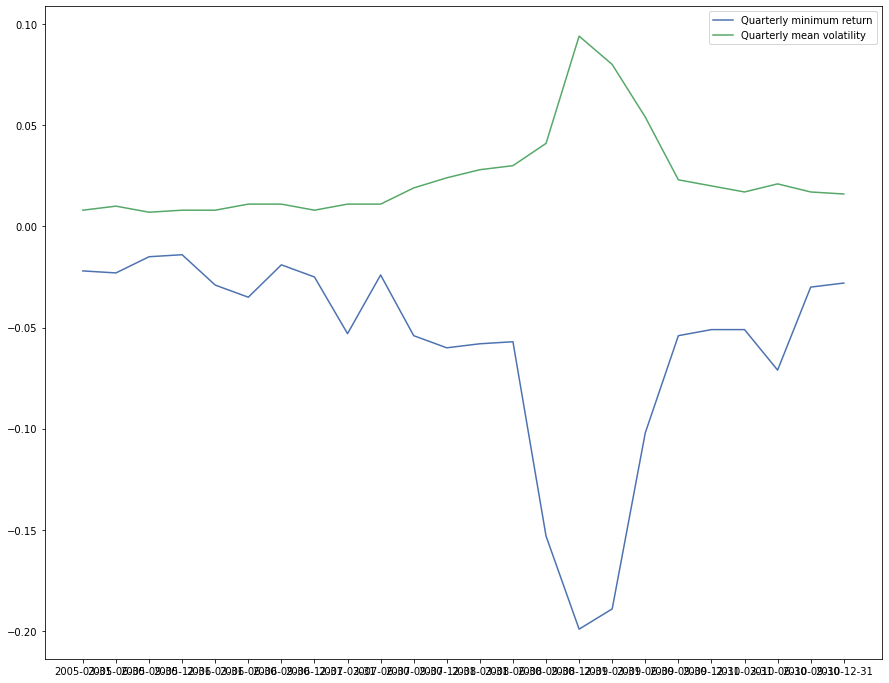

In [102]:
# Create a plot of quarterly minimum portfolio returns
plt.figure(figsize=(15,12))
plt.plot(port_q_min, label="Quarterly minimum return")

# Create a plot of quarterly mean volatility
plt.plot(vol_q_mean, label="Quarterly mean volatility")

# Create legend and plot
plt.legend()
plt.show()

***Comme vous pouvez le voir sur la visualisation, il semble y avoir un changement discret quelque part au cours de la première moitié de 2008, mais il n'est pas clair s'il s'agit simplement d'un « blip » temporaire ou de quelque chose de plus structurel. Nous allons maintenant procéder au test en créant la statistique de test de Chow.***

####**Rupture structurelle de crise : II**

+ ***La vidéo a identifié une rupture structurelle pour une relation simple entre la taille de la population et le temps passé en Chine. Dans cet exercice et le suivant, vous utiliserez la relation du modèle factoriel plus riche entre les rendements du portefeuille et les impayés hypothécaires du chapitre 1 pour tester une rupture structurelle vers 2008, en calculant la statistique du test de Chow pour le modèle factoriel.***

+ **Tout d'abord, après avoir importé l'API statsmodels, vous exécuterez une régression OLS pour 2005 - 2010, avec des rendements trimestriels minimaux port_q_min comme variable dépendante et des impayés hypothécaires mort_del comme variable indépendante (plus un terme d'interception).**

+ *Prenez note de la somme des résidus au carré ssr_total du résultat de la régression (cela sera fourni dans le prochain exercice pour aider à dériver la statistique du test de Chow).*

####**Instructions**

+ Importez l'API statsmodels.
+ Ajoutez un terme d'interception à la régression.
+ Utilisez OLS pour adapter port_q_min à mort_del.
+ Extrayez et affichez les résidus de la somme des carrés.

In [103]:
# Import the statsmodels API to be able to run regressions
import statsmodels.api as sm

# Add a constant to the regression
mort_del = sm.add_constant(mort_del)

# Regress quarterly minimum portfolio returns against mortgage delinquencies
result = sm.OLS(port_q_min, mort_del).fit()

# Retrieve the sum-of-squared residuals
ssr_total = result.ssr
print("Sum-of-squared residuals, 2005-2010: ", ssr_total)

Sum-of-squared residuals, 2005-2010:  0.05067905721246991


***Bien. Le total résiduel de la somme des carrés que vous avez trouvé ici sera transféré dans le prochain exercice, où il sera utilisé pour construire le test de Chow pour la période de crise !***

####**Rupture structurelle de crise : III**
+ ***Vous pouvez maintenant tout assembler pour effectuer le test de Chow.***

+ **Les données 2005 - 2010 ont été divisées en deux DataFrames disponibles, avant et après, en utilisant le 30 juin 2008 comme point de rupture structurel (identifié dans le premier exercice de cette série). Les colonnes des deux DataFrames sont respectivement mort_del et renvoie les données sur les impayés hypothécaires et renvoie les données.**

+ **Vous allez exécuter deux régressions OLS sur avant et après, en régressant la colonne de retours par rapport à la colonne mort_del dans chaque DataFrame, et dériver les résidus de la somme des carrés.**

+ *Ensuite, vous calculerez la statistique du test de Chow comme dans la vidéo, en utilisant ssr_total (fourni à partir du deuxième exercice) et les résidus dérivés. La valeur F critique à 99 % de confiance est d'environ 5,85. Quelle valeur trouvez-vous pour votre statistique de test ?*

####**Instructions**

+ Ajoutez un terme d'interception OLS à mort_del pour avant et après.
+ Ajustez une régression OLS de la colonne de retours par rapport à la colonne mort_del, pour avant et après.
+ Placez les résidus de la somme des carrés dans ssr_before et ssr_after, pour avant et après, respectivement.
+ Créez et affichez la statistique du test de Chow.

In [ ]:
help(pd.DataFrame)

In [104]:
Date = ["2005-03-31", "2005-06-30", "2005-09-30", "2005-12-31", "2006-03-31",    
"2006-06-30", "2006-09-30", "2006-12-31", "2007-03-31", "2007-06-30", 
"2007-09-30",  "2007-12-31", "2008-03-31", "2008-06-30"]  

In [105]:
before = pd.DataFrame(
  {"mort_del" : [0.015, 0.016, 0.016, 0.016, 0.016, 0.017, 
  0.019, 0.021, 0.023, 0.027, 0.031, 0.037, 0.044, 0.053],
   "returns": [-0.022, -0.023, -0.015, -0.014, -0.029, -0.035,
           -0.019, -0.025, -0.053, -0.024, -0.54, -0.60, -0.058, -0.057]},  
  index = Date, columns= ["mort_del","returns"])

In [106]:
Date = ["2008-09-30", "2008-12-31", "2009-03-31", "2009-06-30", "2009-09-30", "2009-12-31", "2010-03-31", "2010-06-30", "2010-09-30",    "2010-12-31"] 

after = pd.DataFrame({"mort_del" : [0.066, 0.080, 0.086, 0.095, 0.103, 0.115, 0.111, 0.106, 0.104, 0.103],
"returns" :[-0.153, -0.199, -0.189, -0.102, -0.054, -0.051, -0.051, -0.071, -0.034, -0.028]},  
  index = Date, columns = ['mort_del','returns'])

In [107]:
# Add intercept constants to each sub-period 'before' and 'after'
before_with_intercept = sm.add_constant(before['mort_del'])
after_with_intercept  = sm.add_constant(after['mort_del'])

# Fit OLS regressions to each sub-period
r_b = sm.OLS(before['returns'], before_with_intercept).fit()
r_a = sm.OLS(after['returns'], after_with_intercept).fit()

# Get sum-of-squared residuals for both regressions
ssr_before = r_b.ssr
ssr_after = r_a.ssr
# Compute and display the Chow test statistic
numerator = ((ssr_total - (ssr_before + ssr_after)) / 2)
denominator = ((ssr_before + ssr_after) / (24 - 4))
print("Chow test statistic: ", numerator / denominator)

Chow test statistic:  -8.856633745560648


###**Volatilité et valeurs extrêmes**

####**1. Volatilité et valeurs extrêmes**
+ ***Les ruptures structurelles de volatilité sont souvent un signe d’événements extrêmes, une autre considération importante dans le paysage de la gestion des risques.***

####**2. Hypothèses du test de Chow**
+ **Le test de Chow est un moyen très utile d’identifier si une rupture structurelle s’est produite ou non. Le test nécessite à la fois la connaissance de l’endroit où une rupture structurelle s’est produite et un modèle linéaire (tel que le modèle factoriel Fama-French dont nous avons parlé au chapitre 1).***

####**3. Indications de rupture structurelle**
+ **Il est souvent impossible d’identifier visuellement le moment exact d’une rupture structurelle, en raison du bruit dans les données**. 

+ **La tendance des données peut ne pas révéler de changement de distribution**. 

+ **Une façon d’y remédier est d’examiner si les périodes de changement structurel coïncident avec les périodes de volatilité accrue**. 

+ **Après tout, le changement s’accompagne souvent d’une plus grande incertitude quant à l’avenir, ce qui se traduit par une plus grande volatilité**. 

+ **L’examen de la volatilité permet également d’appliquer et de tester une classe plus riche de modèles de facteurs de risque, tels que les modèles de volatilité stochastique couramment utilisés dans l’évaluation des actifs.**

####**4. Volatilité des fenêtres roulantes**
+ **Nous pouvons voir si la volatilité n’est pas stationnaire en construisant une fenêtre mobile de pertes (ou de rendements) et en calculant la volatilité pour chaque fenêtre.** 

+ **Rappelez-vous que nous pouvons calculer une fenêtre roulante à partir d’objets Pandas DataFrame et Series en utilisant la méthode 'rolling()', trouver la volatilité de la fenêtre roulante, puis calculer des statistiques telles que la moyenne, le minimum ou le maximum, et autres.**

####**5. Volatilité des fenêtres roulantes**

+ **Le tracé de la série de volatilité résultante peut aider à identifier les dates où la volatilité semble changer de manière significative. Ceux-ci peuvent ensuite être utilisés avec le test de Chow pour voir si une ou plusieurs ruptures structurelles sont prises en charge par les données.**

#####**6. Volatilité des fenêtres roulantes**

+ **Il est parfois utile de visualiser les changements dans la volatilité, plutôt que la volatilité elle-même.** 

+ **Cela fournit, en plus des points de rupture structurels possibles, des informations utiles sur la façon dont la variance a changé au fil du temps**. 

+ **De tels changements peuvent souvent être modélisés comme une volatilité variant dans le temps**. 

+ **Les modèles linéaires peuvent être testés avec une variante du test de Chow si tel est le cas. En outre, permettre une volatilité variable dans le temps introduit des modèles plus riches tels que les modèles populaires d’hétéroscédasticité conditionnelle autorégressive ou ARCH, ainsi que les modèles de volatilité stochastique mentionnés précédemment.**

####**7. Valeurs extrêmes**
+ **Une deuxième méthode d’identification des ruptures structurelles utilise les mêmes concepts que la VaR et la CVaR**. 

+ **Rappelez-vous que la VaR trouve la perte maximale pour un niveau de confiance particulier. Le tracé de cette perte maximale peut indiquer un point où la tendance de la VaR change**. 

+ **S’il y a beaucoup de données, de sorte que le calcul du quantile pour la VaR au fil du temps est faisable, alors c’est une approche utile**. 

+ **Mais des ensembles de données plus petits peuvent ne pas fournir suffisamment d’informations pour visualiser la VaR au fil du temps**. 

+ **Comme alternative, nous pouvons examiner les moments dans le temps où les pertes dépassent simplement un certain seuil**. 

+ **Par exemple, une estimation de la VaR de 95 % signifie que, dans les données réelles, les pertes doivent dépasser l’estimation 5 % du temps**. 

+ **Si nous examinons les données précédentes et voyons à quelle fréquence les pertes dépassent l’estimation de la VaR, nous effectuons des tests a posteriori sur le seuil de la VaR. Le backtesting est un indicateur de performance important d’une estimation de risque mesurée telle que la VaR et le CVaR, et est largement utilisé dans la gestion des risques d’entreprise.**

####**8. Backtesting**
+ **Supposons que nous voulions comprendre le risque que les pertes quotidiennes dépassent 3%, ce qui est une estimation de la VaR de 95% que nous avons obtenue à partir d’une procédure d’estimation antérieure**. 

+ **Il s’agit d’un changement important dans la valeur relative du portefeuille en une seule journée, ce qui fait de ces pertes une « valeur extrême »** 

+ **En effectuant des tests rétrospectifs, nous nous attendons à ce qu’environ 5 % des pertes historiques dépassent notre estimation de la VaR**. 

+ **Plus maintenant, et nous avons une distribution sous-jacente dans le passé avec des queues de distribution plus larges que celles supposées lors du calcul de l’estimation de la VaR**. 

+ **Pas moins, et nous avons une distribution historique avec des queues plus étroites que celle utilisée pour l’estimation**. 

+ **Il est important de souligner que tout seuil de perte peut être utilisé pour le backtesting. En particulier, le CVaR est largement utilisé pour le backtesting car il prend explicitement en compte la queue de la distribution des pertes.**

####**9. Entraînons-nous!**
+ **Dans les exercices, vous utiliserez à la fois des visualisations de volatilité et de valeur extrême pour identifier les ruptures structurelles possibles pendant la crise financière mondiale.**

###**EXERCICES**

####**Volatilité et ruptures structurelles**
+ ***La visualisation des changements de volatilité permet de révéler d'éventuels points de rupture structurels dans les séries chronologiques. En identifiant quand la volatilité semble changer, un choix éclairé du point de rupture peut être fait qui peut, à son tour, être utilisé pour une analyse statistique plus approfondie (comme le test de Chow).***

+ **Vous examinerez deux visualisations de la volatilité du portefeuille de la banque d'investissement de 2008 à 2009, pour deux pondérations de portefeuille disponibles : weights_with_citi et weights_without_citi. Ceux-ci correspondent, respectivement, aux portefeuilles équipondérés avec et sans Citibank, qui ont présenté (comme vous l'avez vu au chapitre 1) la volatilité la plus élevée des quatre actifs sur la période.**

+ *Les prix du portefeuille pour 2008 - 2009 avec Citibank sont disponibles sous la formeprices_with_citi, et sans Citibank sous la formeprices_without_citi.*

####**Instructions**

+ Trouvez les séries de rendements pour les deux portefeuilles en utilisant weights_with_citi et weights_without_citi.
+ Calculez les écarts-types de la fenêtre mobile de 30 jours pour les deux portefeuilles.
+ Combinez les deux objets de la série Pandas en un seul objet DataFrame "vol".
+ Tracez le contenu de l'objet vol pour comparer les deux volatilités du portefeuille dans le temps.

In [113]:
prices_with_citi = portfolio.copy()
prices_without_citi = portfolio[['Goldman Sachs', 'J.P. Morgan', 'Morgan Stanley']]
weights_with_citi = [0.25, 0.25, 0.25, 0.25]
weights_without_citi = [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]

In [114]:
# Find the time series of returns with and without Citibank
ret_with_citi = prices_with_citi.pct_change().dot(weights_with_citi)
ret_without_citi = prices_without_citi.pct_change().dot(weights_without_citi)

# Find the average 30-day rolling window volatility as the standard deviation
vol_with_citi = ret_with_citi.rolling(30).std().dropna().rename("With Citi")
vol_without_citi = ret_without_citi.rolling(30).std().dropna().rename("Without Citi")

# Combine two volatilities into one Pandas DataFrame
vol = pd.concat([vol_with_citi, vol_without_citi], axis=1)

In [115]:
vol.head()

,With Citi,Without Citi
Date,,
2005-02-15,0.01,0.01
2005-02-16,0.01,0.01
2005-02-17,0.01,0.01
2005-02-18,0.01,0.01
2005-02-22,0.01,0.01


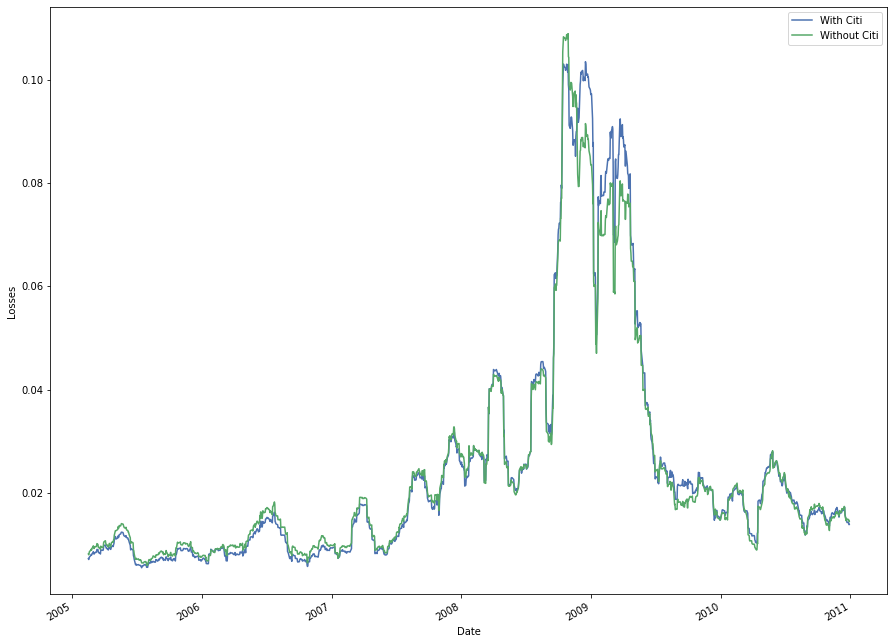

In [116]:
# Plot volatilities over time
vol.plot(figsize = (15,12)).set_ylabel("Losses")
plt.show()

***Bon travail. Les visualisations montrent que la volatilité de Citibank à elle seule n'était pas responsable de l'augmentation de la volatilité du portefeuille pendant la crise. Cela apporte un soutien supplémentaire à une rupture structurelle aux alentours de l'été/automne 2008.***

#####**Valeurs extrêmes et backtesting**
+ ***Les valeurs extrêmes sont celles qui dépassent un seuil et sont utilisées pour déterminer si les mesures de risque telles que la VaR reflètent avec précision le risque de perte.***

+ **Vous explorerez les valeurs extrêmes en calculant la VaR à 95 % du portefeuille équipondéré de la banque d'investissement pour 2009-2010 (rappelez-vous que cela équivaut à une simulation historique à partir de 2010), puis en procédant à un backtesting sur les données de 2007-2008.**

+ **Les pertes de portefeuille 2009-2010 sont disponibles dans estimate_data, à partir duquel vous calculerez l'estimation de la VaR à 95 %. Trouvez ensuite les valeurs extrêmes dépassant l'estimation de la VaR, à partir des pertes de portefeuille 2007-2008 dans les backtest_data disponibles.**

+ *Comparez la fréquence relative des valeurs extrêmes à la VaR à 95 %, et enfin visualisez les valeurs extrêmes avec un graphique à tiges.*

####**Instructions**

+ Calculez la VaR à 95 % sur estimate_data à l'aide de np.quantile().
+ Trouvez les extreme_values de backtest_data en utilisant VaR_95 comme seuil de perte.
+ Comparez la fréquence relative des extreme_values à l'estimation VaR_95. Sont-ils les mêmes?
+ Affichez un graphique à tiges de extreme_values, montrant comment les grands écarts se sont regroupés pendant la crise.

In [177]:
weights =[0.25, 0.25, 0.25, 0.25]
asset_prices_1 = portfolio.loc['2009-01-01':'2010-12-30']
asset_returns_1 = asset_prices_1.pct_change().dropna()
portfolio_returns_1 = asset_returns_1.dot(weights)

In [178]:
estimate_data = -portfolio_returns_1

In [ ]:
estimate_data

In [181]:
weights =[0.25, 0.25, 0.25, 0.25]
asset_prices_2 = portfolio.loc['2007-01-01':'2008-12-31']
asset_returns_2 = asset_prices_2.pct_change()
portfolio_returns_2 = asset_returns_2.dot(weights)

In [182]:
backtest_data = - portfolio_returns_2

In [183]:
# Compute the 95% VaR on 2009-2010 losses
VaR_95 = np.quantile(estimate_data, 0.95)

# Find backtest_data exceeding the 95% VaR
extreme_values = backtest_data[backtest_data > VaR_95]

# Compare the fraction of extreme values for 2007-2008 to the Var_95 estimate
print("VaR_95: ", VaR_95, "; Backtest: ", len(extreme_values) / len(backtest_data) )

VaR_95:  0.05009509412136501 ; Backtest:  0.06547619047619048


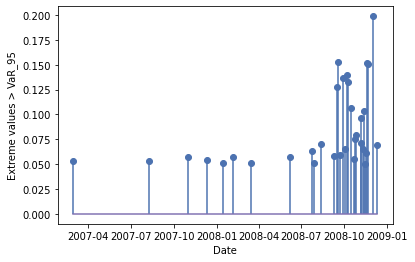

In [184]:
# Plot the extreme values and look for clustering
plt.stem(extreme_values.index, extreme_values, use_line_collection=True)
plt.ylabel("Extreme values > VaR_95"); plt.xlabel("Date")
plt.show()

###**Théorie des valeurs extrêmes**

####**1. Théorie des valeurs extrêmes**
+ ***Nous avons vu comment identifier les événements extrêmes dans les données. Nous allons maintenant montrer comment gérer le risque associé à ces événements improbables mais potentiellement importants.***

####**2. Valeurs extrêmes**
+ **Dans le chapitre précédent, nous avons vu que les pertes de portefeuille souffrent souvent de valeurs extrêmes, c’est-à-dire de pertes exceptionnellement importantes.** 

+ ***Celles-ci sont également appelées pertes « dans la queue » de la distribution sous-jacente, car elles se produisent relativement rarement**. 

+ **Ces « pertes extrêmes » sont très utiles, car si elles sont modélisées correctement, elles contiennent précisément le risque de perte que nous voulons gérer, c’est-à-dire les pertes dépassant une certaine valeur.**

####**3. Théorie des valeurs extrêmes**
+ **La théorie des valeurs extrêmes utilise des statistiques pour aider à comprendre la distribution des valeurs extrêmes. En d’autres termes, c’est un moyen d’aider à modéliser la queue de la distribution des pertes. Une façon de le faire est appelée l’approche « block maxima ».** 

####**4. Théorie des valeurs extrêmes**
+ **L’idée est de prendre des données sur une période de temps, diviser cette période en sous-périodes,**

####**5. Théorie des valeurs extrêmes**
+ appelés « blocs »,

####**6. Théorie des valeurs extrêmes**
+ **et regardez la perte maximale dans chaque bloc.** 

+ **Une autre approche, appelée « pic au-dessus du seuil » ou POT, fait de toutes les pertes au-dessus d’un niveau donné l’ensemble de données d’intérêt.** 

+ **Ceci est similaire à ce que nous avons fait avec les événements extrêmes dans le chapitre précédent. Pour ce chapitre, nous utiliserons l’approche des maxima de bloc.**

####**7. Distribution généralisée des valeurs extrêmes**
+ Divisons la période de crise financière mondiale 2007-2009 en semaines et calculons la perte maximale de chaque semaine. 

+ **Cela se fait facilement avec un objet Pandas DataFrame ou Series en utilisant les méthodes 'resample()' et 'max()'**. 

+ **Il s’agit d’un nouvel ensemble de données de valeurs extrêmes, ici appelé « maxima », et peut être approximé avec une nouvelle distribution**. 

+ **Cette distribution est la distribution généralisée des valeurs extrêmes, ou GEV**. 

+ **Nous pouvons adapter la distribution GEV à nos données « maxima » en utilisant la distribution « genextreme » de « scipy stats ». Après avoir importé la distribution, elle peut être ajustée comme d’habitude en utilisant la méthode 'fit()'.**

####**8. VaR et CVaR de la distribution GEV**

+ **L’utilisation du GEV pour calculer les estimations de la VaR et du CVaR se fait exactement de la même manière qu’avec une distribution normale**. 

+ **Par exemple, pour trouver la VaR à 99%, nous utilisons la fonction de point de pourcentage 'ppf()' et les paramètres ajustés que nous avons trouvés précédemment**. 

+ **Notez que cette approche trouve la perte maximale sur une période d’une semaine au niveau de confiance donné**. 

+ **Pour TROUVER le CVaR de 99%, rappelez-vous que CVaR est l’attente conditionnelle de la perte étant donné que l’estimation de la VaR est la perte minimale**. 

+ **Comme vous pouvez le voir, 'genextreme' a également une méthode 'expect()', qui est utilisée pour calculer le CVaR de la même manière que nous l’avons fait dans le passé pour la distribution Normal.**

####**9. Couverture des pertes**

+ **L’estimation de la VaR ou du CVaR sur des valeurs extrêmes est souvent utilisée dans les secteurs de la banque et de l’assurance pour couvrir les pertes, ce qui fait partie intégrante de la gestion des risques d’entreprise***. 

+ **C’est une exigence réglementaire que les banques conservent suffisamment de réserves (parfois appelées réserves obligatoires) pour couvrir les pertes sur une période donnée (disons, une semaine ou 10 jours) à un niveau de confiance particulier (disons, 99%)**. 

+ **Nous pouvons utiliser l’estimation de la VaR de la distribution GEV pour calculer la réserve requise, puisqu’il s’agit d’une perte maximale, pour une période donnée, à un niveau de confiance donné**.

####**10. Couverture des pertes**
+ À titre d’exemple, supposons que notre portefeuille de banques d’investissement vaut initialement un million de dollars. 

+ Nous aimerions connaître les réserves obligatoires à un niveau de confiance de 99 % et à un horizon d’une semaine. 

+ En utilisant l’estimation de la VaR que nous avons calculée précédemment, nous avons trouvé la perte maximale qui est estimée se produire 99% du temps au cours d’une semaine. 

+ En multipliant l’estimation de la VaR par la valeur de notre portefeuille, nous obtenons l’estimation des réserves nécessaires. 

+ Si nous supposons que l’estimation de la VaR est de 0 point 10, indiquant une perte maximale de 10%, alors le besoin de réserve est d’un million multiplié par 10%, soit 100 000 $. 

+ Notez qu’à mesure que la valeur du portefeuille change, l’exigence de réserves devra également changer. 

+ **La fréquence à laquelle l’obligation de réserves obligatoires change est indiquée par la réglementation légale.**

####**11. Entraînons-nous!**
+ **Vous pouvez tester vos connaissances de la théorie des valeurs extrêmes à la fois sur le portefeuille de la banque d’investissement et sur les mouvements d’un seul actif, de General Electric, pendant la crise financière. Bonne chance!**

###**EXERCICES**

####**Maximums de bloc**
+ ***Jusqu'à présent, vous avez travaillé avec un portefeuille de quatre banques d'investissement pour la période 2005 - 2010. Vous allez maintenant vous concentrer sur un seul actif, le titre de General Electric, pour la même période et appliquer la théorie des valeurs extrêmes à ses séries chronologiques.***

+ *Dans cet exercice, vous allez examiner la série chronologique des maximums de bloc pour les pertes de GE sur la période 2008 - 2009, en utilisant la méthode .resample() pour trois longueurs de bloc différentes : une semaine, un mois et un trimestre, en visualisant chaque série. dans un tracé à l'aide des objets de tracé axis_*.*

####**Consignes** 

+ 1)
  + Rééchantillonnez les pertes d'actifs de GE à la longueur du bloc hebdomadaire.
  + Tracez la série chronologique résultante des maxima de bloc.

+ 2)
  + Ensuite, rééchantillonnez les pertes d'actifs de GE à la longueur du bloc mensuel.
  + Tracez la série chronologique résultante des maxima de bloc.
+ 3)
  + Enfin, rééchantillonnez les pertes d'actifs de GE à la longueur du bloc trimestriel et tracez le résultat.

In [204]:
asset_prices = portfolio.loc['2008-01-01':'2009-12-31']
weights =[0.25, 0.25, 0.25, 0.25]
asset_returns = asset_prices.pct_change().dropna()
portfolio_returns = asset_returns.dot(weights)

In [205]:
losses = - portfolio_returns

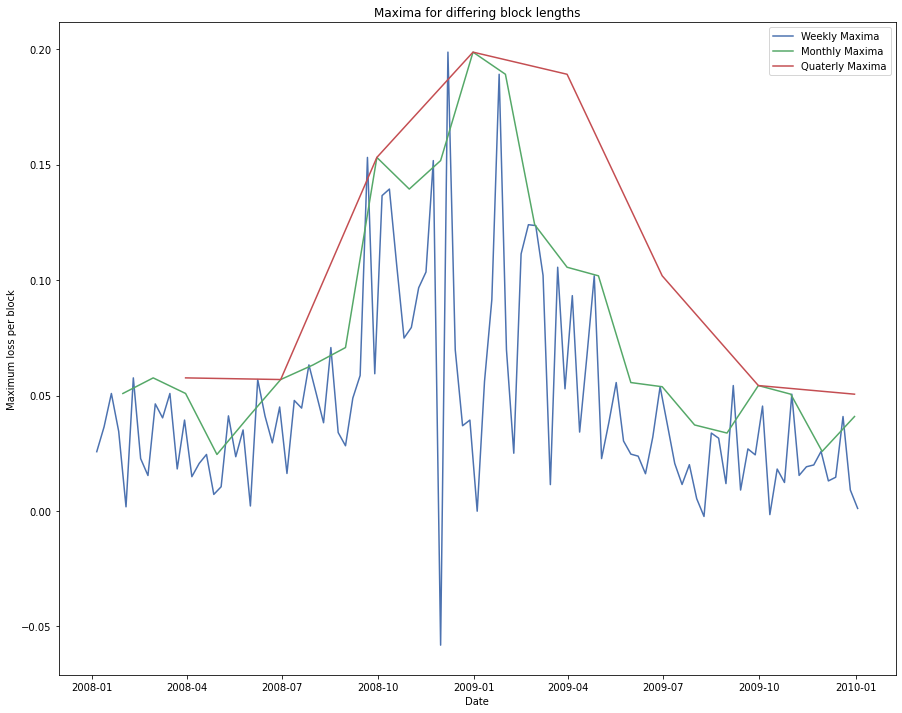

In [206]:
# Resample the data into weekly blocks
weekly_maxima = losses.resample("W").max()
# Resample the data into monthly blocks
monthly_maxima = losses.resample("M").max()
# Resample the data into quarterly blocks
quarterly_maxima = losses.resample('Q').max()

# Plot the resulting weekly maxima
plt.figure(figsize = (15,12))
plt.plot(weekly_maxima, label = "Weekly Maxima")
plt.plot(monthly_maxima, label = "Monthly Maxima")
plt.plot(quarterly_maxima, label = "Quaterly Maxima")
plt.xlabel('Date')
plt.ylabel('Maximum loss per block')
plt.title('Maxima for differing block lengths')
plt.legend()
#plt.figure("weekly/monthly/quarterly")
plt.show()

***Bien! Comme vous pouvez le constater, les pertes de GE ont été élevées et volatiles pendant la crise. Le fait de se concentrer sur les maxima de bloc fournit des informations sur la queue de la distribution des pertes, ce qui est essentiel pour la gestion des risques.***

####**Événements extrêmes pendant la crise**
+ ***Vous pouvez utiliser la distribution Generalized Extreme Value (GEV) pour examiner les valeurs extrêmes des pertes de General Electric (GE) pendant la crise financière de 2008 et 2009.***

+ **Cette période a coïncidé avec la crise de liquidité de GE et son éventuelle exigence d'un investissement d'urgence de 3 milliards de dollars de la part de Warren Buffet de Berkshire Hathaway pour éviter le défaut de paiement de ses obligations en papier commercial.**

+ *Les pertes de GE et les pertes hebdomadaires maximales hebdomadaires_max sont disponibles, tout comme la distribution GEV genextreme de scipy.stats.*

####**Instructions**
+ Tracez d'abord le journal des pertes quotidiennes de GE pour identifier visuellement les parties de la série chronologique qui montrent un regroupement de la volatilité.
+ Identifiez les dates qui ont subi des pertes de rendement supérieures à 10 % et ajoutez-les à votre tracé.

+ Ajustez les pertes hebdomadaires_max à une distribution GEV, en utilisant l'objet genextreme().
+ Tracez la fonction de densité de probabilité du GEV, .pdf(), par rapport à l'histogramme des pertes hebdomadaires_max ; l'axe des x va du minimum de week_max à son maximum.

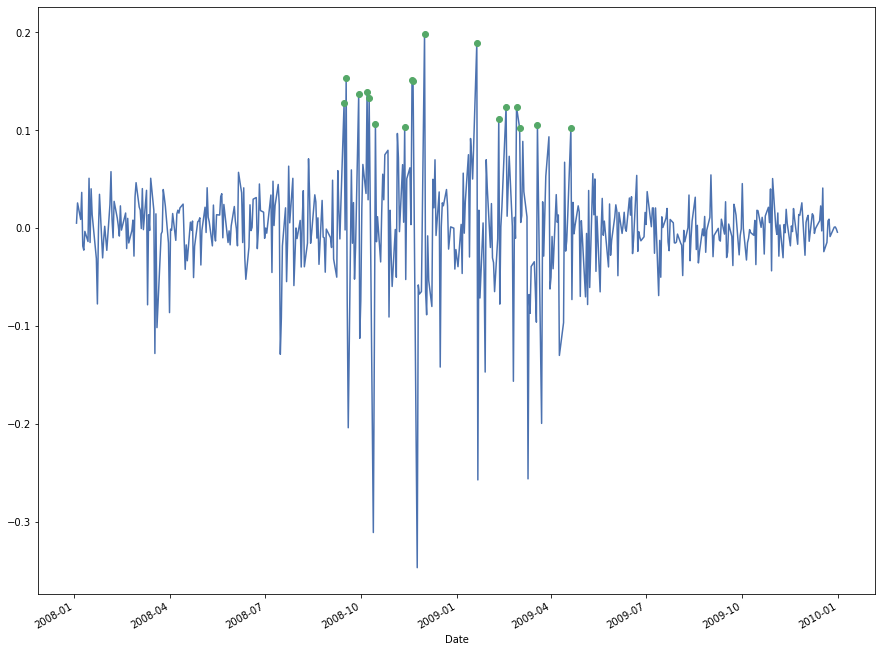

In [207]:
# Plot the log daily losses of GE over the period 2007-2009
losses.plot()

# Find all daily losses greater than 10%
extreme_losses = losses[losses > 0.10]

# Scatter plot the extreme losses
extreme_losses.plot(style='o',figsize = (15, 12))
plt.show()

In [208]:
from scipy.stats import genextreme as gev

In [209]:
# Fit extreme distribution to weekly maximum of losses
fitted = gev.fit(weekly_maxima)

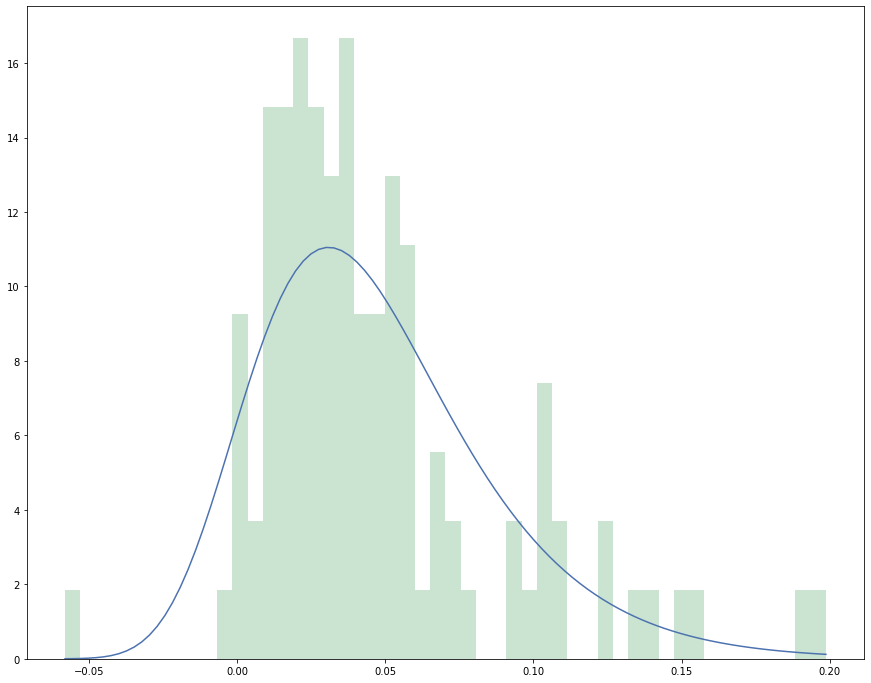

In [210]:
# Plot extreme distribution with weekly max losses historgram
x = np.linspace(min(weekly_maxima), max(weekly_maxima), 100)
plt.figure(figsize = (15,12))
plt.plot(x, gev.pdf(x, *fitted))
plt.hist(weekly_maxima, 50, density = True, alpha = 0.3)
plt.show()

***Toutes nos félicitations! Vous avez réussi à ajuster les données de retour à une distribution de valeur extrême pour la période de crise financière. GE survivrait à la crise, mais n'en resterait pas indemne.***

####**Estimation du risque GEV**
+ ***Supposons que vous déteniez 1 000 000 € d'actions GE au 1er janvier 2010. Vous souhaitez couvrir les pertes maximales attendues qui pourraient survenir au cours de la semaine prochaine, sur la base des données disponibles des deux années précédentes, 2008 - 2009. Vous supposez que les pertes hebdomadaires maximales pour GE sont distribuées selon une distribution de valeurs extrêmes généralisées (GEV).***

+ **Pour modéliser les pertes attendues, vous allez estimer la CVaR au niveau de confiance de 99 % pour la distribution GEV, et l'utiliser pour calculer le montant nécessaire en réserve pour couvrir la perte hebdomadaire maximale attendue sur janvier 2010.**

+ *La distribution genextreme de scipy.stats est disponible dans votre espace de travail, tout comme les pertes de GE pour la période 2008 - 2009.*

####**Instructions**

+ Trouvez le maximum du prix de l'actif de GE pour une longueur de bloc d'une semaine.
+ Ajustez le genextreme de la distribution GEV aux données hebdomadaires_maxima.
+ Calculez la VaR à 99 % et utilisez-la pour trouver l'estimation de la CVaR à 99 %.
+ Calculez le montant de la réserve nécessaire pour couvrir la perte hebdomadaire maximale prévue.

In [211]:
# Compute the weekly block maxima for GE's stock
weekly_maxima = losses.resample("W").max()

# Fit the GEV distribution to the maxima
p = gev.fit(weekly_maxima)

# Compute the 99% VaR (needed for the CVaR computation)
VaR_99 = gev.ppf(0.99, *p)

# Compute the 99% CVaR estimate
CVaR_99 = (1 / (1 - 0.99)) * gev.expect(lambda x: x, 
           args=(p[0],), loc = p[1], scale = p[2], lb = VaR_99)

# Display the covering loss amount
print("Reserve amount: ", 1000000 * CVaR_99)

Reserve amount:  193525.19141325672


***Excellent! Comme vous pouvez le voir, pour couvrir la perte hebdomadaire maximale prévue, vous auriez besoin d'une réserve d'environ 15 % de la valeur du portefeuille, ce qui est important. Bien que la crise financière soit en grande partie terminée en 2010, de nouvelles réglementations internationales ont été mises en œuvre, exigeant des réserves plus élevées pour les banques et les investisseurs institutionnels utilisant à la fois les mesures de risque VaR et CVaR.***

###**Estimation de la densité du noyau**

####**1. Estimation de la densité du noyau**
+ ***Nous allons maintenant compléter notre boîte à outils d’estimation avec l’estimation de la densité du noyau, une méthode flexible et puissante d’estimation de la distribution des facteurs de risque.***

####**2. L’histogramme revisité**
+ ***Jusqu’à présent, nos distributions de facteurs de risque ont été supposées (telles que la distribution normale ou T), ajustées (à partir de, par exemple, l’estimation paramétrique ou la simulation de Monte Carlo) ou ignorées (comme pour la simulation historique)***. 

+ **Dans chaque cas, les données réelles peuvent être résumées par un histogramme**. 

+ **Un histogramme n’est pas une distribution : mais nous aimerions qu’une fonction représente l’histogramme comme une distribution de probabilité (ou fonction de densité)**. 

+ **Comment pouvons-nous faire cela? Un juste milieu entre l’estimation paramétrique et l’ignorance de la distribution consiste à filtrer les données afin qu’elles deviennent suffisamment lisses pour représenter une distribution**. 

+ **Cela peut être fait avec une estimation non paramétrique, qui ne suppose pas une classe paramétrée de distributions (telles que la distribution normale, la normale asymétrique ou la distribution $t$ de Student)**.

####**3. Lissage des données**
+ ***L’idée derrière un filtre est de lisser les « bosses » d’un histogramme, afin qu’une fonction puisse être ajustée aux données de l’histogramme.***

#####**4. Lissage des données**
+ Supposons que nous ayons un tas d’observations de (disons) pertes de portefeuille. Un par un,

####**5. Lissage des données**
+ ils s’accumulent

####**6. Lissage des données**
+ dans les « grappes » voisines, comme les bacs d’histogrammes. 

####**7. Lissage des données**
+ **Nous pouvons créer une fonction sur les pertes de portefeuille en choisissant une perte de portefeuille spécifique,**

####**8. Lissage des données**
+ choisir une perte de portefeuille spécifique, en regardant les valeurs de perte à proximité,

####**9. Lissage des données**
+ et formant une sorte de moyenne pondérée des pertes à proximité de cette perte (y compris la perte spécifique elle-même). 

+ Le choix du filtre, ou « noyau », nous indique comment pondérer la valeur spécifique et les valeurs à proximité. 

+ Vous pouvez considérer le noyau comme définissant la « fenêtre » des valeurs à proximité, et comment faire la moyenne des valeurs ensemble.

####**10. Lissage des données**
+ **Le déplacement de la fenêtre vers une autre valeur de portefeuille crée une autre moyenne pondérée.**

####**11. Lissage des données**
+ **En faisant cela à plusieurs reprises, une fonction d’estimation de la densité du noyau (KDE) peut être créée sur toute la gamme d’observations.**

####**12. Le noyau gaussien**
+ ***Un choix populaire de fenêtre est le noyau gaussien. Il s’agit d’un noyau continu qui place la valeur du portefeuille sélectionné au centre d’une distribution normale, puis pèse les valeurs voisines en fonction de leur distance du centre. Il existe en général de nombreux noyaux qui peuvent être utilisés pour s’adapter à un ensemble donné d’observations. L’estimation de la densité du noyau est largement utilisée dans l’analyse de séries chronologiques, le traitement du signal et de nombreux autres domaines problématiques.***

####**13. KDE en Python**

+ ***Nous pouvons utiliser la bibliothèque 'scipy stats' pour générer une estimation de la densité du noyau de la distribution des pertes pour le portefeuille des banques d’investissement de 2005 à 2010. Tout d’abord, importez la fonction 'gaussian_kde()' de 'scipy stats'. Il s’agit de la fonction d’estimation de la densité du noyau gaussien. Ensuite, utilisez 'gaussian_kde()' sur les pertes, pour générer l’estimation lissée de la distribution des pertes en tant qu’objet 'kde'. Cette estimation peut être visualisée en traçant le 'pdf()' de l’objet 'kde', montrant la forme de la distribution KDE résultante telle qu’ajustée aux données.***

####**14. Trouver la VaR avec KDE**
+ **Une fois que l’estimation de la densité du noyau a été trouvée, nous pouvons créer notre estimation du risque de VaR à partir de la distribution de probabilité estimée. Pour trouver la VaR, nous générons d’abord un échantillon de tirages aléatoires à partir de la distribution estimée en utilisant la méthode 'resample()'. La taille de l’échantillon doit être grande pour refléter fidèlement l’estimation. Ensuite, nous appliquons la fonction 'quantile()' de Nmpy à un niveau de confiance particulier, disons 99%, pour générer l’estimation de la VaR. Une procédure similaire à celle utilisée par le passé peut être utilisée pour calculer l’estimation du risque CVaR. Cependant, l’objet KDE gaussien n’a pas de méthode 'expect()', donc l’intégrale dans la valeur attendue doit être calculée manuellement. Pour les exercices, une méthode spéciale « expect() » a été écrite pour vous, pour vous aider dans ce calcul, mais gardez à l’esprit qu’elle n’est généralement pas disponible et n’entre pas dans le cadre du cours.**

####**15. Entraînons-nous!**
+ **L’estimation de la densité du noyau est largement utilisée en science des données, et vous pouvez acquérir de l’expérience avec son utilisation dans les exercices suivants!**

###**EXERCICES**

####**KDE d'une distribution de perte**
+ ***L'estimation de la densité du noyau (KDE) peut ajuster les distributions avec des « queues épaisses », c'est-à-dire des distributions avec parfois de grands écarts par rapport à la moyenne (comme la distribution des pertes de portefeuille).***

+ **Au chapitre 2, vous avez découvert la distribution T de Student, qui, pour de faibles degrés de liberté, peut également saisir cette caractéristique des pertes de portefeuille.**

+ ***Vous comparerez un KDE gaussien avec une distribution T, chacun ajusté aux pertes de portefeuille fournies de 2008 à 2009. Vous visualiserez les ajustements relatifs de chacun à l'aide d'un histogramme. (Rappelez-vous que la distribution T utilise des paramètres ajustés params, tandis que le gaussian_kde, étant non paramétrique, renvoie une fonction.)**

+ *La fonction gaussian_kde() est disponible, tout comme la distribution t, toutes deux à partir de scipy.stats. Des tracés peuvent être ajoutés à l'objet d'axe fourni.*

####**Instructions**
+ Ajuster une distribution t aux pertes du portefeuille.
+ Ajustez un KDE gaussien aux pertes en utilisant gaussian_kde().
+ Tracez les fonctions de densité de probabilité (PDF) des deux estimations par rapport aux pertes, à l'aide de l'objet axe.

In [212]:
from scipy.stats import gaussian_kde

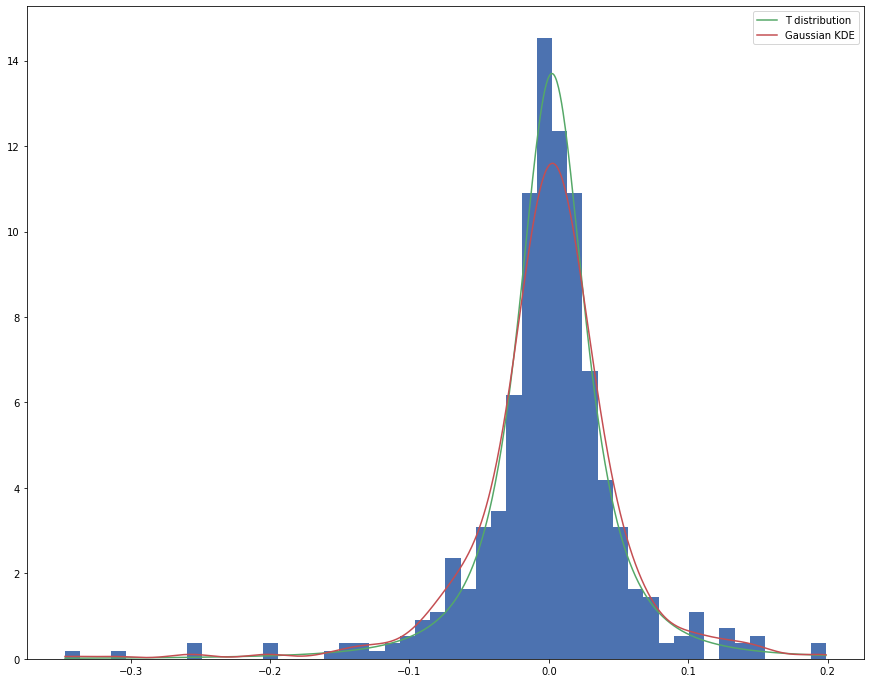

In [218]:
# Generate a fitted T distribution over losses
params = t.fit(losses)

# Generate a Gaussian kernal density estimate over losses
kde = gaussian_kde(losses)

# Add the PDFs of both estimates to a histogram, and display
loss_range = np.linspace(np.min(losses), np.max(losses), 1000)
plt.figure(figsize = (15,12))
plt.hist(losses, bins = 50, density = True)
plt.plot(loss_range, t.pdf(loss_range, *params), label = 'T distribution')
plt.plot(loss_range, kde.pdf(loss_range), label = 'Gaussian KDE')
plt.legend(); plt.show()

***Super! Les deux estimations correspondent mieux aux données du portefeuille qu'une distribution normale. Dans cet exemple, alors que le T correspond mieux au pic de l'histogramme de données, le KDE gaussien correspond mieux aux queues. Les estimations paramétriques et non paramétriques sont largement utilisées dans les statistiques et la gestion des risques.***

####**Quelle diffusion ?**
+ ***Il est souvent difficile de choisir initialement comment représenter une distribution de pertes. Une comparaison visuelle entre différentes distributions ajustées est généralement un bon point de départ.***

+ **Les distributions norm, skewnorm, t et gaussian_kde sont disponibles. Leurs estimations ajustées des pertes disponibles du portefeuille des banques d'investissement de 2007 à 2008 sont affichées dans l'objet plt.figure(1), que vous pouvez afficher.**

+ *Créez une nouvelle figure et tracez un histogramme des pertes de portefeuille en utilisant plt.hist(losses, bins = 50, density = True). En utilisant cet histogramme à des fins de comparaison, quelle(s) distribution(s) dans plt.figure(1) correspondent le mieux aux pertes ?*

####**Instructions**

+ Normal

+ Normale asymétrique

+ T

+ KDE gaussien

+ ***T et KDE gaussien***

***Droite! Les estimations T et Gaussian KDE sont toutes deux de bons ajustements, chacune d'une manière différente : le T capture bien le pic, tandis que le KDE capture mieux les queues.***

####**Sélection de la CVaR et de la couverture des pertes**

+ ***Dans les exercices précédents, vous avez vu que les distributions $T$ et gaussienne de KDE correspondent assez bien aux pertes de portefeuille pour la période de crise. Compte tenu de cela, lequel de ces éléments est le meilleur pour la gestion des risques ? Une façon de choisir est de sélectionner la distribution qui offre la plus grande couverture de perte, pour couvrir le "pire pire scénario" de pertes.***

+ **Les distributions $t$ et kde sont disponibles et ont été ajustées aux pertes de portefeuille 2007-2008 (les paramètres ajustés $t$ sont en $p$). Vous dériverez l'estimation de la CVaR à 99 % sur un jour pour chaque distribution ; l'estimation de CVaR la plus élevée est alors le montant de réserve « le plus sûr » à détenir, couvrant les pertes attendues qui dépassent la VaR de 99 %.**

+ *L'instance kde a reçu une méthode spéciale .expect(), juste pour cet exercice, pour calculer la valeur attendue nécessaire pour la CVaR.*

####**Instructions**

+ Trouvez la VaR à 99 % à l'aide de np.quantile() appliqué à des échantillons aléatoires des distributions $t$ et $kde$.
+ Calculez l'intégrale requise pour les estimations CVaR à l'aide de la méthode .expect() pour chaque distribution.

+ Recherchez et affichez les estimations de CVaR à 99 % pour les deux distributions.

In [ ]:
# Find the VaR as a quantile of random samples from the distributions
VaR_99_T   = np.quantile(t.rvs(size=1000, *p), 0.99)
VaR_99_KDE = np.quantile(kde.resample(size=1000), 0.99)

# Find the expected tail losses, with lower bounds given by the VaR measures
integral_T   = t.expect(lambda x: x, args = (p[0],), loc = p[1], scale = p[2], lb = VaR_99_T)
integral_KDE = kde.expect(lambda x: x, lb = VaR_99_KDE)

# Create the 99% CVaR estimates
CVaR_99_T   = (1 / (1 - 0.99)) * integral_T
CVaR_99_KDE = (1 / (1 - 0.99)) * integral_KDE

# Display the results
print("99% CVaR for T: ", CVaR_99_T, "; 99% CVaR for KDE: ", CVaR_99_KDE)

***Bien fait. Comme vous pouvez le voir, la distribution T renvoie une CVaR estimée plus grande, bien que l'estimation de KDE soit assez proche. Dans tous les cas, l'utilisation de l'estimation de CVaR à 99 % de la distribution T pour spécifier un montant de réserve garantit que les deux pertes maximales attendues possibles sont couvertes.****

###**Gestion des risques liés aux réseaux neuronaux**

####**1. Gestion des risques liés aux réseaux neuronaux**

+ ***L’ajustement du portefeuille en temps réel fait partie du problème de gestion des risques. Nous examinerons une technologie de pointe, les réseaux neuronaux, actuellement utilisée pour effectuer des mises à jour en temps réel.***

####**2. Mise à jour du portefeuille en temps réel**

+ Jusqu’à présent, notre flux de travail de gestion des risques a défini et estimé les mesures de risque et a optimisé le portefeuille. 

+ Les gestionnaires de portefeuille modernes veulent ajuster les avoirs du portefeuille le plus rapidement possible en réponse aux informations du marché. 

+ Malheureusement, l’optimisation du portefeuille peut être très coûteuse en calcul. 

+ Une solution consiste à créer une fonction prenant les prix actuels des actifs comme entrée et renvoyant un ensemble de pondérations de portefeuille pour chaque actif. 

+ Cela ne nécessite qu’une évaluation d’une fonction sur des données d’actifs en temps réel, et la fonction peut être mise à jour de temps en temps.

####**3. Réseaux de neurones**

+ **Un réseau neuronal est une fonction : il prend une entrée (comme les prix des actifs) et retourne une sortie (comme les pondérations de portefeuille). On l’appelle un réseau neuronal parce qu’il contient des nœuds de traitement interconnectés appelés « neurones », ressemblant vaguement aux connexions entre les neurones dans le cerveau. Les réseaux neuronaux existent depuis les années 1940, mais ils ont connu une résurgence du développement depuis le début des années 2000. Ils sont utilisés pour résoudre des problèmes avec de grands ensembles de données, tels que la reconnaissance d’images, l’analyse financière et les performances des moteurs de recherche. De très grands réseaux neuronaux constituent le « Deep Learning » et font partie de la discipline Machine Learning. En 2015, Google a publié Tensorflow, un environnement open-source, initialement en Python, pour effectuer du Deep Learning.***

####**4. Structure du réseau neuronal**
+ **Pour nos besoins, un réseau neuronal est une fonction avec trois propriétés, appelées « couches »: une « couche » d’entrée, qui prend l’entrée ou les « variables indépendantes »,**

####**5. Structure du réseau neuronal**
+ **une ou plusieurs couches « cachées », et**

####**6. Structure du réseau neuronal**
+ **une couche de sortie, représentant la sortie ou les variables dépendantes. Ces couches sont « entraînées » à apprendre la relation entre l’entrée et la sortie, un peu comme une régression.**

####**7. Structure du réseau neuronal**
+ **L’idée est de prendre une entrée, telle que les prix historiques des actifs, et de l’alimenter dans la couche d’entrée.**

####**8. Structure du réseau neuronal**
+ **La couche d’entrée transmet ces données à une ou plusieurs couches cachées, mettant à jour les paramètres internes (également appelés « poids ») pour démêler les modèles dans les données.**

####**9. Structure du réseau neuronal**
+ Le calque masqué transmet ensuite ces motifs au calque de sortie.

####**10. Structure du réseau neuronal**
+ **Après un traitement ultérieur, le résultat est une sortie, telle que les pondérations de notre portefeuille.**

####**11. Utilisation des réseaux neuronaux pour l’optimisation du portefeuille**

+ ***Nous pouvons évaluer dans quelle mesure le réseau neuronal a réussi à créer sa sortie en la comparant aux « meilleurs » poids préexistants. Ces pondérations sont obtenues à partir de l’optimisation du portefeuille sur des données historiques. L’objectif est de réduire au maximum la différence entre la production et les « meilleurs » poids historiques. C’est ce qu’on appelle « former » le réseau. Une fois le réseau formé, ses poids internes sont fixes et il peut être utilisé. Lorsque les prix des nouveaux actifs sont transmis au réseau en tant qu’intrants, la sortie correspond aux meilleures pondérations de portefeuille prévues. Ainsi, le réseau neuronal effectue automatiquement l’optimisation du portefeuille, ce qui en fait un outil très puissant pour la gestion des risques.***

####**12. Création de réseaux neuronaux en Python**

+ ***En Python, nous utiliserons une bibliothèque appelée « Keras » pour accéder aux réseaux neuronaux construits dans Tensorflow. Cela cache une grande partie de la programmation de niveau inférieur nécessaire, ce qui nous permet de nous concentrer sur l’optimisation du portefeuille. Il y a beaucoup de paramètres que nous ne décrirons pas dans cette section, mais vous pouvez visiter le cours « Introduction au Deep Learning avec Keras » dans DataCamp si vous êtes intéressé! Pour utiliser Keras, nous devons d’abord importer le type de réseau neuronal - il s’agit d’un réseau « séquentiel » allant des couches d’entrée aux couches cachées à sortie. Ensuite, nous devons importer les connexions entre les couches (les flèches que nous avons vues précédemment). Nous allons connecter tous les neurones ensemble en utilisant des couches « denses ». Ensuite, nous allons définir notre « modèle » de réseau neuronal et créer nos couches cachées et de sortie, en utilisant la méthode « add() ». Notez comment la couche d’entrée est spécifiée avec le mot-clé « input_dim », qui dans notre cas couvre les quatre actifs de notre portefeuille de banque d’investissement. Et puisque nous avons également besoin de quatre poids de sortie, il y a quatre « neurones » dans la dernière couche de sortie. Croyez-le ou non, c’est tout ce dont nous avons besoin pour spécifier un réseau de neurones! Maintenant, nous devons l’entraîner sur nos données.***

####**13. Formation du réseau en Python**
+ **Nous avons placé les prix des actifs dans la matrice « training_input » et les pondérations des portefeuilles dans le vecteur « training_output ». Ceux-ci sont utilisés pour former le réseau. Le modèle est d’abord compilé pour spécifier la fonction de minimisation des erreurs et la façon dont l’optimisation est effectuée. Ensuite, nous « adaptons » le réseau aux données, ce qui effectue la minimisation. Le nombre d’itérations pour ajuster les données est donné avec le mot-clé « époques » - généralement plus c’est mieux.**

####**14. Gestion des risques en Python**
+ **Pour utiliser le réseau, nous pouvons lui donner « new_asset_prices » qu’il n’a jamais vu auparavant! Le réseau évalue les prix des nouveaux actifs à l’aide de la méthode 'predict()' et renvoie un ensemble de pondérations de portefeuille. Au fil du temps, bien sûr, les prix des nouveaux actifs s’accumuleront et fourniront des informations précieuses. Réentraîner le réseau de temps en temps sur de nouvelles données, et le backtester sur les anciennes données, fait partie du flux de travail du réseau neuronal.**

####**15. Entraînons-nous!**
+ ***Vous êtes maintenant en possession de l’un des outils les plus importants de la science des données, l’apprentissage automatique. Appliquez ce que vous avez appris à la crise financière mondiale!***

###**EXERCICES**

####**Réseaux de neurones à couche unique**

+ ***Pour se familiariser avec les réseaux de neurones, il sera utile de commencer par une simple approximation d'une fonction.***

+ **Vous allez former un réseau de neurones pour approximer un mappage entre une entrée, $x$, et une sortie, $y$. Ils sont liés par la fonction racine carrée, c'est-à-dire $y = \sqrt{x}$.**

+ **Le vecteur d'entrée x vous est donné. Vous allez d'abord calculer la racine carrée de $x$ en utilisant la fonction sqrt() de Numpy, générant la série de sortie $y$. Ensuite, vous allez créer un réseau de neurones simple et entraîner le réseau sur la série $x$.**

+ ***Après la formation, vous allez ensuite tracer à la fois la série $y$ et la sortie du réseau de neurones, pour voir à quel point le réseau se rapproche de la fonction racine carrée.***

+ *Les objets Sequential et Dense de la bibliothèque Keras sont également disponibles dans votre espace de travail.*

####**Instructions**

+ Créez les valeurs d'entraînement de sortie à l'aide de la fonction sqrt() de Numpy.
+ Créez le réseau neuronal avec une couche cachée de 16 neurones, une valeur d'entrée et une valeur de sortie.
+ Compiler et ajuster le réseau de neurones sur les valeurs d'entraînement, pour 100 époques
+ Tracez les valeurs d'entraînement (en bleu) par rapport aux valeurs prédites du réseau de neurones.

In [228]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [229]:
x = np.array([ 0.        ,  0.01001001,  0.02002002,  0.03003003,  0.04004004,
        0.05005005,  0.06006006,  0.07007007,  0.08008008,  0.09009009,
        0.1001001 ,  0.11011011,  0.12012012,  0.13013013,  0.14014014,
        0.15015015,  0.16016016,  0.17017017,  0.18018018,  0.19019019,
        0.2002002 ,  0.21021021,  0.22022022,  0.23023023,  0.24024024,
        0.25025025,  0.26026026,  0.27027027,  0.28028028,  0.29029029,
        0.3003003 ,  0.31031031,  0.32032032,  0.33033033,  0.34034034,
        0.35035035,  0.36036036,  0.37037037,  0.38038038,  0.39039039,
        0.4004004 ,  0.41041041,  0.42042042,  0.43043043,  0.44044044,
        0.45045045,  0.46046046,  0.47047047,  0.48048048,  0.49049049,
        0.5005005 ,  0.51051051,  0.52052052,  0.53053053,  0.54054054,
        0.55055055,  0.56056056,  0.57057057,  0.58058058,  0.59059059,
        0.6006006 ,  0.61061061,  0.62062062,  0.63063063,  0.64064064,
        0.65065065,  0.66066066,  0.67067067,  0.68068068,  0.69069069,
        0.7007007 ,  0.71071071,  0.72072072,  0.73073073,  0.74074074,
        0.75075075,  0.76076076,  0.77077077,  0.78078078,  0.79079079,
        0.8008008 ,  0.81081081,  0.82082082,  0.83083083,  0.84084084,
        0.85085085,  0.86086086,  0.87087087,  0.88088088,  0.89089089,
        0.9009009 ,  0.91091091,  0.92092092,  0.93093093,  0.94094094,
        0.95095095,  0.96096096,  0.97097097,  0.98098098,  0.99099099,
        1.001001  ,  1.01101101,  1.02102102,  1.03103103,  1.04104104,
        1.05105105,  1.06106106,  1.07107107,  1.08108108,  1.09109109,
        1.1011011 ,  1.11111111,  1.12112112,  1.13113113,  1.14114114,
        1.15115115,  1.16116116,  1.17117117,  1.18118118,  1.19119119,
        1.2012012 ,  1.21121121,  1.22122122,  1.23123123,  1.24124124,
        1.25125125,  1.26126126,  1.27127127,  1.28128128,  1.29129129,
        1.3013013 ,  1.31131131,  1.32132132,  1.33133133,  1.34134134,
        1.35135135,  1.36136136,  1.37137137,  1.38138138,  1.39139139,
        1.4014014 ,  1.41141141,  1.42142142,  1.43143143,  1.44144144,
        1.45145145,  1.46146146,  1.47147147,  1.48148148,  1.49149149,
        1.5015015 ,  1.51151151,  1.52152152,  1.53153153,  1.54154154,
        1.55155155,  1.56156156,  1.57157157,  1.58158158,  1.59159159,
        1.6016016 ,  1.61161161,  1.62162162,  1.63163163,  1.64164164,
        1.65165165,  1.66166166,  1.67167167,  1.68168168,  1.69169169,
        1.7017017 ,  1.71171171,  1.72172172,  1.73173173,  1.74174174,
        1.75175175,  1.76176176,  1.77177177,  1.78178178,  1.79179179,
        1.8018018 ,  1.81181181,  1.82182182,  1.83183183,  1.84184184,
        1.85185185,  1.86186186,  1.87187187,  1.88188188,  1.89189189,
        1.9019019 ,  1.91191191,  1.92192192,  1.93193193,  1.94194194,
        1.95195195,  1.96196196,  1.97197197,  1.98198198,  1.99199199,
        2.002002  ,  2.01201201,  2.02202202,  2.03203203,  2.04204204,
        2.05205205,  2.06206206,  2.07207207,  2.08208208,  2.09209209,
        2.1021021 ,  2.11211211,  2.12212212,  2.13213213,  2.14214214,
        2.15215215,  2.16216216,  2.17217217,  2.18218218,  2.19219219,
        2.2022022 ,  2.21221221,  2.22222222,  2.23223223,  2.24224224,
        2.25225225,  2.26226226,  2.27227227,  2.28228228,  2.29229229,
        2.3023023 ,  2.31231231,  2.32232232,  2.33233233,  2.34234234,
        2.35235235,  2.36236236,  2.37237237,  2.38238238,  2.39239239,
        2.4024024 ,  2.41241241,  2.42242242,  2.43243243,  2.44244244,
        2.45245245,  2.46246246,  2.47247247,  2.48248248,  2.49249249,
        2.5025025 ,  2.51251251,  2.52252252,  2.53253253,  2.54254254,
        2.55255255,  2.56256256,  2.57257257,  2.58258258,  2.59259259,
        2.6026026 ,  2.61261261,  2.62262262,  2.63263263,  2.64264264,
        2.65265265,  2.66266266,  2.67267267,  2.68268268,  2.69269269,
        2.7027027 ,  2.71271271,  2.72272272,  2.73273273,  2.74274274,
        2.75275275,  2.76276276,  2.77277277,  2.78278278,  2.79279279,
        2.8028028 ,  2.81281281,  2.82282282,  2.83283283,  2.84284284,
        2.85285285,  2.86286286,  2.87287287,  2.88288288,  2.89289289,
        2.9029029 ,  2.91291291,  2.92292292,  2.93293293,  2.94294294,
        2.95295295,  2.96296296,  2.97297297,  2.98298298,  2.99299299,
        3.003003  ,  3.01301301,  3.02302302,  3.03303303,  3.04304304,
        3.05305305,  3.06306306,  3.07307307,  3.08308308,  3.09309309,
        3.1031031 ,  3.11311311,  3.12312312,  3.13313313,  3.14314314,
        3.15315315,  3.16316316,  3.17317317,  3.18318318,  3.19319319,
        3.2032032 ,  3.21321321,  3.22322322,  3.23323323,  3.24324324,
        3.25325325,  3.26326326,  3.27327327,  3.28328328,  3.29329329,
        3.3033033 ,  3.31331331,  3.32332332,  3.33333333,  3.34334334,
        3.35335335,  3.36336336,  3.37337337,  3.38338338,  3.39339339,
        3.4034034 ,  3.41341341,  3.42342342,  3.43343343,  3.44344344,
        3.45345345,  3.46346346,  3.47347347,  3.48348348,  3.49349349,
        3.5035035 ,  3.51351351,  3.52352352,  3.53353353,  3.54354354,
        3.55355355,  3.56356356,  3.57357357,  3.58358358,  3.59359359,
        3.6036036 ,  3.61361361,  3.62362362,  3.63363363,  3.64364364,
        3.65365365,  3.66366366,  3.67367367,  3.68368368,  3.69369369,
        3.7037037 ,  3.71371371,  3.72372372,  3.73373373,  3.74374374,
        3.75375375,  3.76376376,  3.77377377,  3.78378378,  3.79379379,
        3.8038038 ,  3.81381381,  3.82382382,  3.83383383,  3.84384384,
        3.85385385,  3.86386386,  3.87387387,  3.88388388,  3.89389389,
        3.9039039 ,  3.91391391,  3.92392392,  3.93393393,  3.94394394,
        3.95395395,  3.96396396,  3.97397397,  3.98398398,  3.99399399,
        4.004004  ,  4.01401401,  4.02402402,  4.03403403,  4.04404404,
        4.05405405,  4.06406406,  4.07407407,  4.08408408,  4.09409409,
        4.1041041 ,  4.11411411,  4.12412412,  4.13413413,  4.14414414,
        4.15415415,  4.16416416,  4.17417417,  4.18418418,  4.19419419,
        4.2042042 ,  4.21421421,  4.22422422,  4.23423423,  4.24424424,
        4.25425425,  4.26426426,  4.27427427,  4.28428428,  4.29429429,
        4.3043043 ,  4.31431431,  4.32432432,  4.33433433,  4.34434434,
        4.35435435,  4.36436436,  4.37437437,  4.38438438,  4.39439439,
        4.4044044 ,  4.41441441,  4.42442442,  4.43443443,  4.44444444,
        4.45445445,  4.46446446,  4.47447447,  4.48448448,  4.49449449,
        4.5045045 ,  4.51451451,  4.52452452,  4.53453453,  4.54454454,
        4.55455455,  4.56456456,  4.57457457,  4.58458458,  4.59459459,
        4.6046046 ,  4.61461461,  4.62462462,  4.63463463,  4.64464464,
        4.65465465,  4.66466466,  4.67467467,  4.68468468,  4.69469469,
        4.7047047 ,  4.71471471,  4.72472472,  4.73473473,  4.74474474,
        4.75475475,  4.76476476,  4.77477477,  4.78478478,  4.79479479,
        4.8048048 ,  4.81481481,  4.82482482,  4.83483483,  4.84484484,
        4.85485485,  4.86486486,  4.87487487,  4.88488488,  4.89489489,
        4.9049049 ,  4.91491491,  4.92492492,  4.93493493,  4.94494494,
        4.95495495,  4.96496496,  4.97497497,  4.98498498,  4.99499499,
        5.00500501,  5.01501502,  5.02502503,  5.03503504,  5.04504505,
        5.05505506,  5.06506507,  5.07507508,  5.08508509,  5.0950951 ,
        5.10510511,  5.11511512,  5.12512513,  5.13513514,  5.14514515,
        5.15515516,  5.16516517,  5.17517518,  5.18518519,  5.1951952 ,
        5.20520521,  5.21521522,  5.22522523,  5.23523524,  5.24524525,
        5.25525526,  5.26526527,  5.27527528,  5.28528529,  5.2952953 ,
        5.30530531,  5.31531532,  5.32532533,  5.33533534,  5.34534535,
        5.35535536,  5.36536537,  5.37537538,  5.38538539,  5.3953954 ,
        5.40540541,  5.41541542,  5.42542543,  5.43543544,  5.44544545,
        5.45545546,  5.46546547,  5.47547548,  5.48548549,  5.4954955 ,
        5.50550551,  5.51551552,  5.52552553,  5.53553554,  5.54554555,
        5.55555556,  5.56556557,  5.57557558,  5.58558559,  5.5955956 ,
        5.60560561,  5.61561562,  5.62562563,  5.63563564,  5.64564565,
        5.65565566,  5.66566567,  5.67567568,  5.68568569,  5.6956957 ,
        5.70570571,  5.71571572,  5.72572573,  5.73573574,  5.74574575,
        5.75575576,  5.76576577,  5.77577578,  5.78578579,  5.7957958 ,
        5.80580581,  5.81581582,  5.82582583,  5.83583584,  5.84584585,
        5.85585586,  5.86586587,  5.87587588,  5.88588589,  5.8958959 ,
        5.90590591,  5.91591592,  5.92592593,  5.93593594,  5.94594595,
        5.95595596,  5.96596597,  5.97597598,  5.98598599,  5.995996  ,
        6.00600601,  6.01601602,  6.02602603,  6.03603604,  6.04604605,
        6.05605606,  6.06606607,  6.07607608,  6.08608609,  6.0960961 ,
        6.10610611,  6.11611612,  6.12612613,  6.13613614,  6.14614615,
        6.15615616,  6.16616617,  6.17617618,  6.18618619,  6.1961962 ,
        6.20620621,  6.21621622,  6.22622623,  6.23623624,  6.24624625,
        6.25625626,  6.26626627,  6.27627628,  6.28628629,  6.2962963 ,
        6.30630631,  6.31631632,  6.32632633,  6.33633634,  6.34634635,
        6.35635636,  6.36636637,  6.37637638,  6.38638639,  6.3963964 ,
        6.40640641,  6.41641642,  6.42642643,  6.43643644,  6.44644645,
        6.45645646,  6.46646647,  6.47647648,  6.48648649,  6.4964965 ,
        6.50650651,  6.51651652,  6.52652653,  6.53653654,  6.54654655,
        6.55655656,  6.56656657,  6.57657658,  6.58658659,  6.5965966 ,
        6.60660661,  6.61661662,  6.62662663,  6.63663664,  6.64664665,
        6.65665666,  6.66666667,  6.67667668,  6.68668669,  6.6966967 ,
        6.70670671,  6.71671672,  6.72672673,  6.73673674,  6.74674675,
        6.75675676,  6.76676677,  6.77677678,  6.78678679,  6.7967968 ,
        6.80680681,  6.81681682,  6.82682683,  6.83683684,  6.84684685,
        6.85685686,  6.86686687,  6.87687688,  6.88688689,  6.8968969 ,
        6.90690691,  6.91691692,  6.92692693,  6.93693694,  6.94694695,
        6.95695696,  6.96696697,  6.97697698,  6.98698699,  6.996997  ,
        7.00700701,  7.01701702,  7.02702703,  7.03703704,  7.04704705,
        7.05705706,  7.06706707,  7.07707708,  7.08708709,  7.0970971 ,
        7.10710711,  7.11711712,  7.12712713,  7.13713714,  7.14714715,
        7.15715716,  7.16716717,  7.17717718,  7.18718719,  7.1971972 ,
        7.20720721,  7.21721722,  7.22722723,  7.23723724,  7.24724725,
        7.25725726,  7.26726727,  7.27727728,  7.28728729,  7.2972973 ,
        7.30730731,  7.31731732,  7.32732733,  7.33733734,  7.34734735,
        7.35735736,  7.36736737,  7.37737738,  7.38738739,  7.3973974 ,
        7.40740741,  7.41741742,  7.42742743,  7.43743744,  7.44744745,
        7.45745746,  7.46746747,  7.47747748,  7.48748749,  7.4974975 ,
        7.50750751,  7.51751752,  7.52752753,  7.53753754,  7.54754755,
        7.55755756,  7.56756757,  7.57757758,  7.58758759,  7.5975976 ,
        7.60760761,  7.61761762,  7.62762763,  7.63763764,  7.64764765,
        7.65765766,  7.66766767,  7.67767768,  7.68768769,  7.6976977 ,
        7.70770771,  7.71771772,  7.72772773,  7.73773774,  7.74774775,
        7.75775776,  7.76776777,  7.77777778,  7.78778779,  7.7977978 ,
        7.80780781,  7.81781782,  7.82782783,  7.83783784,  7.84784785,
        7.85785786,  7.86786787,  7.87787788,  7.88788789,  7.8978979 ,
        7.90790791,  7.91791792,  7.92792793,  7.93793794,  7.94794795,
        7.95795796,  7.96796797,  7.97797798,  7.98798799,  7.997998  ,
        8.00800801,  8.01801802,  8.02802803,  8.03803804,  8.04804805,
        8.05805806,  8.06806807,  8.07807808,  8.08808809,  8.0980981 ,
        8.10810811,  8.11811812,  8.12812813,  8.13813814,  8.14814815,
        8.15815816,  8.16816817,  8.17817818,  8.18818819,  8.1981982 ,
        8.20820821,  8.21821822,  8.22822823,  8.23823824,  8.24824825,
        8.25825826,  8.26826827,  8.27827828,  8.28828829,  8.2982983 ,
        8.30830831,  8.31831832,  8.32832833,  8.33833834,  8.34834835,
        8.35835836,  8.36836837,  8.37837838,  8.38838839,  8.3983984 ,
        8.40840841,  8.41841842,  8.42842843,  8.43843844,  8.44844845,
        8.45845846,  8.46846847,  8.47847848,  8.48848849,  8.4984985 ,
        8.50850851,  8.51851852,  8.52852853,  8.53853854,  8.54854855,
        8.55855856,  8.56856857,  8.57857858,  8.58858859,  8.5985986 ,
        8.60860861,  8.61861862,  8.62862863,  8.63863864,  8.64864865,
        8.65865866,  8.66866867,  8.67867868,  8.68868869,  8.6986987 ,
        8.70870871,  8.71871872,  8.72872873,  8.73873874,  8.74874875,
        8.75875876,  8.76876877,  8.77877878,  8.78878879,  8.7987988 ,
        8.80880881,  8.81881882,  8.82882883,  8.83883884,  8.84884885,
        8.85885886,  8.86886887,  8.87887888,  8.88888889,  8.8988989 ,
        8.90890891,  8.91891892,  8.92892893,  8.93893894,  8.94894895,
        8.95895896,  8.96896897,  8.97897898,  8.98898899,  8.998999  ,
        9.00900901,  9.01901902,  9.02902903,  9.03903904,  9.04904905,
        9.05905906,  9.06906907,  9.07907908,  9.08908909,  9.0990991 ,
        9.10910911,  9.11911912,  9.12912913,  9.13913914,  9.14914915,
        9.15915916,  9.16916917,  9.17917918,  9.18918919,  9.1991992 ,
        9.20920921,  9.21921922,  9.22922923,  9.23923924,  9.24924925,
        9.25925926,  9.26926927,  9.27927928,  9.28928929,  9.2992993 ,
        9.30930931,  9.31931932,  9.32932933,  9.33933934,  9.34934935,
        9.35935936,  9.36936937,  9.37937938,  9.38938939,  9.3993994 ,
        9.40940941,  9.41941942,  9.42942943,  9.43943944,  9.44944945,
        9.45945946,  9.46946947,  9.47947948,  9.48948949,  9.4994995 ,
        9.50950951,  9.51951952,  9.52952953,  9.53953954,  9.54954955,
        9.55955956,  9.56956957,  9.57957958,  9.58958959,  9.5995996 ,
        9.60960961,  9.61961962,  9.62962963,  9.63963964,  9.64964965,
        9.65965966,  9.66966967,  9.67967968,  9.68968969,  9.6996997 ,
        9.70970971,  9.71971972,  9.72972973,  9.73973974,  9.74974975,
        9.75975976,  9.76976977,  9.77977978,  9.78978979,  9.7997998 ,
        9.80980981,  9.81981982,  9.82982983,  9.83983984,  9.84984985,
        9.85985986,  9.86986987,  9.87987988,  9.88988989,  9.8998999 ,
        9.90990991,  9.91991992,  9.92992993,  9.93993994,  9.94994995,
        9.95995996,  9.96996997,  9.97997998,  9.98998999, 10.        ])

Epoch 1/100
32/32 [==============================] - 1s 6ms/step - loss: 23.5697
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 15.2138
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 9.5274
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 5.3960
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 2.6100
Epoch 6/100
32/32 [==============================] - 0s 7ms/step - loss: 0.9945
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.2437
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 0.0547
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 0.0397
Epoch 10/100
32/32 [==============================] - 0s 6ms/step - loss: 0.0292
Epoch 11/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0206
Epoch 12/100
32/32 [==============================] - 0s 7ms/step - loss: 0.0145
Epoch 13/100
32/32 [===============

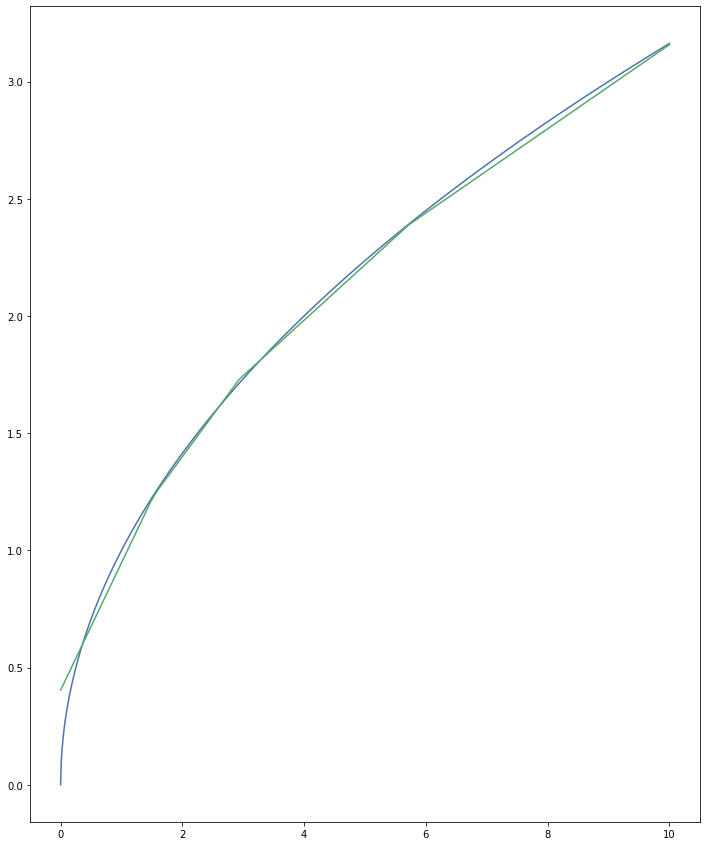

In [231]:
# Create the training values from the square root function
y = np.sqrt(x)

# Create the neural network
model = Sequential()
model.add(Dense(16, input_dim=1, activation='relu'))
model.add(Dense(1))

# Train the network
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.fit(x, y, epochs=100)

## Plot the resulting approximation and the training values
plt.figure(figsize = (12, 15))
plt.plot(x, y, x, model.predict(x))
plt.show()

***Bien joué! Vous pouvez voir à partir de la sortie de la méthode model.fit() que l'erreur quadratique moyenne chute rapidement, même pour un réseau relativement simple d'une seule couche cachée avec 4 neurones. L'ajout de plus de neurones et/ou d'époques peut améliorer considérablement l'erreur.***

####**Prévision du prix des actifs**

+ ***Vous pouvez désormais utiliser un réseau de neurones pour prédire un prix d'actif, qui est un élément important de l'analyse financière quantitative ainsi que de la gestion des risques.***

+ **Vous utiliserez les cours des actions 2005-2010 de Citibank, Goldman Sachs et J. P. Morgan pour former un réseau afin de prédire le cours des actions de Morgan Stanley.**

+ **Vous allez créer et former un réseau de neurones avec une couche d'entrée, une couche de sortie et deux couches cachées.**

+ ***Ensuite, un nuage de points sera affiché pour voir à quel point les prix prévus de Morgan Stanley sont éloignés de leurs valeurs réelles sur la période 2005-2010. (Rappelez-vous que si les prédictions sont parfaites, le nuage de points résultant se situera sur la ligne à 45 degrés du tracé.)***

+ *Les objets Sequential et Dense sont disponibles, ainsi que les prix DataFrame avec les prix des banques d'investissement de 2005-2010.*

####**Instructions**

+ Définissez les données d'entrée sur tous les prix bancaires, à l'exception de Morgan Stanley, et les données de sortie sur les prix de Morgan Stanley uniquement.
+ Créez un modèle de réseau neuronal séquentiel avec deux couches cachées denses : la première avec 16 neurones (et trois neurones d'entrée) et la seconde avec 8 neurones.
+ Ajoutez une seule couche de sortie Dense de 1 neurone pour représenter le prix de Morgan Stanley.
+ Compilez le réseau de neurones et entraînez-le en ajustant le modèle.

In [234]:
prices = portfolio

In [235]:
# Set the input and output data
training_input = prices.drop('Morgan Stanley', axis=1)
training_output = prices['Morgan Stanley']

# Create and train the neural network with two hidden layers
model = Sequential()
model.add(Dense(16, input_dim=3, activation='sigmoid'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_logarithmic_error', optimizer='rmsprop')
model.fit(training_input, training_output, epochs=100)

Epoch 1/100
48/48 [==============================] - 2s 5ms/step - loss: 7.3756
Epoch 2/100
48/48 [==============================] - 0s 5ms/step - loss: 4.8390
Epoch 3/100
48/48 [==============================] - 0s 5ms/step - loss: 3.4611
Epoch 4/100
48/48 [==============================] - 0s 3ms/step - loss: 2.5664
Epoch 5/100
48/48 [==============================] - 0s 3ms/step - loss: 1.8561
Epoch 6/100
48/48 [==============================] - 0s 3ms/step - loss: 1.3507
Epoch 7/100
48/48 [==============================] - 0s 3ms/step - loss: 0.9709
Epoch 8/100
48/48 [==============================] - 0s 3ms/step - loss: 0.6536
Epoch 9/100
48/48 [==============================] - 0s 3ms/step - loss: 0.4619
Epoch 10/100
48/48 [==============================] - 0s 3ms/step - loss: 0.3283
Epoch 11/100
48/48 [==============================] - 0s 3ms/step - loss: 0.2364
Epoch 12/100
48/48 [==============================] - 0s 3ms/step - loss: 0.1742
Epoch 13/100
48/48 [=================

48/48 [==============================] - 0s 4ms/step


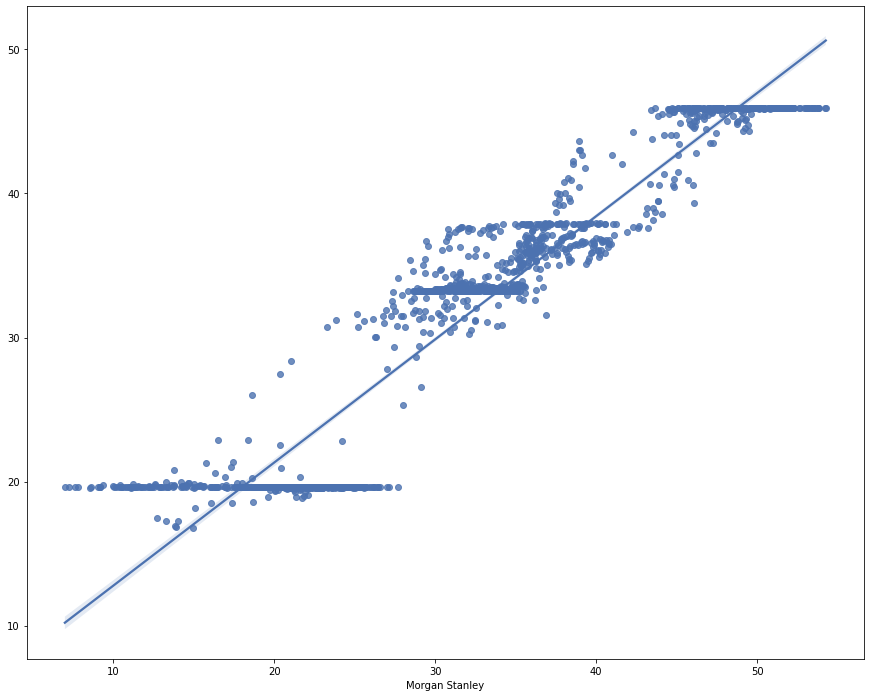

In [245]:
# Scatter plot of the resulting model prediction
plt.figure(figsize=(15,12))
sns.regplot(x = training_output, 
           y = model.predict(training_input),
           data = model); 
plt.show()

***Fantastique! Vous pouvez voir que les valeurs prédites se situent le long de la ligne à 45 degrés du nuage de points, ce qui montre que le réseau neuronal prédit raisonnablement bien le prix de Morgan Stanley. Des réseaux de neurones plus robustes utilisent des centaines de couches cachées et potentiellement des millions de paramètres !***

####**Gestion des risques en temps réel**

+ ***Il est temps d'utiliser ce que vous avez appris sur les réseaux de neurones pour effectuer une gestion des risques (presque !) en temps réel.***

+ **Une fenêtre glissante de 14 jours de rendements d'actifs fournit suffisamment de données pour créer une série chronologique de portefeuilles à volatilité minimale à l'aide de la théorie moderne du portefeuille, comme vous l'avez vu au chapitre 2. Ces pondérations de portefeuille minimum_vol sont les valeurs d'entraînement pour un réseau de neurones. Il s'agit d'une matrice (1497 x 4).**

+ **L'entrée est la matrice des rendements_moyens_des_actifs_hebdomadaires, correspondant à chaque portefeuille efficace. Il s'agit d'une matrice (1497 x 4).**

+ *Créez un réseau neuronal séquentiel avec la dimension d'entrée appropriée et deux couches cachées. La formation de ce réseau prendrait trop de temps, vous utiliserez donc un modèle pré_formé disponible de type identique pour prédire les pondérations de portefeuille pour un nouveau vecteur de prix d'actif.*

####**Instructions**

+ Créez un réseau neuronal séquentiel avec deux couches cachées, une couche d'entrée et une couche de sortie.
+ Utilisez le pre_trained_model pour prédire ce que serait le portefeuille de volatilité minimum, lorsque de nouvelles données d'actifs asset_returns sont présentées.

In [247]:
# Create neural network model
model = Sequential()
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))

# Use the pre-trained model to predict portfolio weights given new asset returns
asset_returns = np.array([0.001060, 0.003832, 0.000726, -0.002787])
asset_returns.shape = (1,4)

In [248]:
print("Predicted minimum volatility portfolio: ", model.predict(asset_returns))

1/1 [==============================] - 0s 361ms/step
Predicted minimum volatility portfolio:  [[0.00030225 0.00063691 0.         0.        ]]


***Toutes nos félicitations! Cet exercice ne montre qu'une petite partie des puissantes applications des réseaux de neurones à l'analyse de régression (approximation). Les réseaux de neurones peuvent également être utilisés pour classer les points de rupture structurels, créer des portefeuilles de couverture pour atténuer les risques, et bien plus encore.Vous avez maintenant créé une boîte à outils diversifiée pour aborder la gestion des risques en Python. Tweetez vos commentaires et dites-nous ce que vous avez pensé du cours !***